In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/home/vmottaqi/dream_challenge/methylation/filtered_data_transposed_synthetic.csv")

In [ ]:
# Notebook visuals

In [6]:
import sys
print(f"Python executable: {sys.executable}")
print(f"Python version: {sys.version}")

Python executable: /home/vmottaqi/.conda/envs/mcf7/bin/python3
Python version: 3.12.0 | packaged by Anaconda, Inc. | (main, Oct  2 2023, 17:29:18) [GCC 11.2.0]


In [10]:
!conda info --envs

# conda environments:
#
gwas                     /home/vmottaqi/.conda/envs/gwas
mcf7                  *  /home/vmottaqi/.conda/envs/mcf7
base                     /work/anaconda3



In [9]:
!jt -t monokai

# structural variants processing

## Common elements from the INFO col

In [4]:
tsv_file_path = "./struc_variants/unpacking/chr1.tsv"

# Read the TSV file into a Pandas DataFrame
df = pd.read_csv(tsv_file_path, sep='\t')

In [6]:
df

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,16312389,...,21919928,31368746,18323694,26016340,32386143,10258748,15344343,22635036,27648853,20004090
0,chr1,79099,DEL_1:79099-88123,A,<DEL>,0,PASS,AC=0;AF=0.0002825;AN=2368;CALLRATE=0.77;END=88...,GT:ADP:CN:DD:EC:ND:RP:SC:SP,"0/0:54.01:2:0.87,1.31,0.95,1.39:0:1.11:0:0:0",...,"0/0:21.08:2:0.36,1.83,1.24,0.51:0:1.5:0:0:0","0/0:16.73:2:0.37,1.18,0.88,0.53:0:0.99:0:0:0","0/0:31.77:2:0.6,1.42,0.93,0.96:0:1.12:0:0:0","0/0:45.75:2:0.79,1.41,1.09,1.06:0:1.24:0:0:0","0/0:42.21:2:0.91,1.3,0.98,1.49:0:1.1:0:0:0","0/0:1.71:2:0.01,3.37,3.46,0.01:0:4.81:0:0:0","0/0:19.95:2:0.42,1.02,1,0.46:0:1.03:0:0:0","0/0:70.06:2:0.8,1.65,1.05,1.45:0:1.27:0:0:0","0/0:35.66:2:0.7,1.48,0.98,1.11:0:1.2:0:0:0","0/0:27.68:2:0.59,1.29,0.77,1.09:0:0.96:0:0:0"
1,chr1,831216,DEL_1:831216-833900,C,<DEL>,0,PASS,AC=11;AF=0.003068;AN=2914;CALLRATE=0.95;DP=.;D...,GT:ADP:CN:DD:EC:ND:RP:SC:SP,"0/0:40.98:2:0.91,1.11,0.83,1.07:0:0.96:0:0:0",...,"0/0:31.32:2:0.92,1.07,1.13,0.84:0:1.11:0:0:0","0/0:44.01:2:0.82,1.38,1.19,0.96:0:1.32:0:0:0","0/0:39.2:2:1,1.15,1.11,0.93:0:1.12:0:0:0","0/0:41.13:2:0.9,1.21,1.04,1.01:0:1.08:0:0:0","0/0:34.18:2:1.1,0.96,0.95,1.17:0:0.94:0:0:0","0/0:44.71:2:0.9,1.22,0.82,1.04:0:1.01:0:0:0","0/0:47.97:2:0.94,1.23,1,1:1:1.12:0:0:0","0/0:52.15:2:0.93,1.12,1.14,0.99:0:1.1:0:0:0","0/0:33.49:2:0.79,1.3,1.2,0.86:0:1.24:0:0:0","0/0:33.23:2:0.87,1.1,0.95,1.02:0:1.03:0:0:0"
2,chr1,912717,DEL_1:912717-930843,C,<DEL>,0,PASS,AC=1;AF=0.000109;AN=3018;CALLRATE=0.99;END=930...,GT:ADP:CN:DD:EC:ND:RP:SC:SP,"0/0:46.05:2:1.03,1.04,0.97,1.11:0:1:0:0:0",...,"0/0:34.44:2:1.07,1.04,0.95,1.06:0:1:0:0:0","0/0:40.24:2:1.12,0.98,0.9,1.17:0:0.94:0:0:0","0/0:39.99:2:1.05,1.06,0.97,1.13:0:1.01:0:0:0","0/0:42.88:2:1.13,0.97,0.92,1.15:0:0.94:0:0:0","0/0:35.37:2:1.16,1.01,0.88,1.19:0:0.94:0:0:0","0/0:50.36:2:1.11,0.98,0.93,1.2:0:0.96:0:0:0","0/0:47.82:2:1.07,0.99,1.12,0.97:0:1.06:0:0:0","0/0:54.25:2:1.08,1.08,0.95,1.09:0:1.02:0:0:0","0/0:33.46:2:1.08,0.95,0.98,1.05:0:0.96:0:0:0","0/0:37.67:2:1.08,1.04,1.02,1.04:0:1.04:0:0:0"
3,chr1,913187,DEL_1:913187-913261,T,<DEL>,0,PASS,AC=0;AF=0.0002334;AN=2844;CALLRATE=0.93;END=91...,GT:ADP:CN:DD:EC:ND:RP:SC:SP,"0/0:43.06:2:0.97,0,0,1:0:1.01:0:0:0",...,"0/0:36.92:2:1.04,0,0,1.08:0:1.08:0:0:0","0/0:38.16:2:1.1,0,0,1:0:0.97:0:0:0","0/0:40.57:2:1.01,0,0,1.09:0:1.07:0:0:0","0/0:44.86:2:1.13,0,0,1.14:0:0.99:0:0:0","0/0:41.81:2:1.13,0,0,1.12:0:1.16:0:0:0","0/0:44.31:2:1.12,0,0,1.12:0:0.87:0:0:0","0/0:42.81:2:1.02,0,0,1.05:0:0.94:0:0:0","0/0:62.58:2:1.15,0,0,1.14:0:1.11:0:0:0","0/0:31.03:2:1.02,0,0,0.97:0:0.95:0:0:0","0/0:41.2:2:1.12,0,0,1.22:0:1.03:0:0:0"
4,chr1,940801,DUP_1:940801-944600,G,<DUP>,0,PASS,AC=0;AF=0.0001092;AN=3014;CALLRATE=0.99;END=94...,GT:ADP:CN:DD:EC:ND:RP:SC:SP,"0/0:41.2:2:1.11,0.85,0.88,1.1:0:0.86:0:0:0",...,"0/0:31.54:2:0.86,1,1.05,1.01:0:1.05:0:0:0","0/0:39.05:2:1.09,0.92,0.92,1.17:0:0.92:0:0:0","0/0:38.51:2:1.09,0.94,0.9,1.17:0:0.94:0:0:0","0/0:40.99:2:0.92,1.12,0.92,1.1:0:1.02:0:0:0","0/0:33.23:2:1.09,0.82,0.96,1.17:0:0.92:0:0:0","0/0:46.9:2:1.09,0.97,0.85,1.11:0:0.93:0:0:0","0/0:43.73:2:1.14,0.92,0.89,1.06:0:0.9:0:0:0","0/0:50.04:2:1.12,0.96,0.88,1.08:0:0.92:0:0:0","0/0:30.81:2:1.03,0.86,0.85,1.1:0:0.88:0:0:0","0/0:33.54:2:1.11,0.85,0.89,1.13:0:0.87:0:0:0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3670,chr1,248795401,DEL_1:248795401-248796555,C,<DEL>,0,PASS,AC=34;AF=0.01;AN=2844;CALLRATE=0.93;CLIP=(2487...,GT:ADP:CN:DD:EC:ND:RP:SC:SP,"0/0:44.02:2:0.92,1.08,1.1,0.95:0:1.09:0:0:0",...,".:30.59:.:0.88,1.02,1.09,0.91:0:1.06:0:0:0","0/0:45.01:2:1.01,1.06,1.16,1.15:0:1.11:0:0:0","0/0:35.83:2:1.17,0.85,0.99,1:0:0.91:0:0:0","0/0:39.91:2:1.15,0.85,0.93,1.1:0:0.89:0:0:0","0/0:37.88:2:1.06,1.17,1.06,1.07:0:1.11:0:0:0","0/0:48.63:2:1.12,0.9,1.18,0.96:0:1.03:0:0:0","0/0:46.11:2:1.02,1,1.13,0.94:0:1.06:0:0:0","0/0:53.58:2:1.08,0.95,1.09,1.05:0:1.02:0:0:0","0/0:32.7:2:1.07,0.96,0.89,1.09:0:0.92:0:0:0","0/0:38.08:2:1.06,1.06,1.06,1.03:0:1.06:0:0:

In [17]:
import pandas as pd
import os

directory_path = './struc_variants/unpacking/'  # Replace with the actual directory path

unique_qual_values = set()
unique_filter_values = set()

for filename in os.listdir(directory_path):
    if filename.endswith(".tsv"):
        file_path = os.path.join(directory_path, filename)
        df = pd.read_csv(file_path, sep='\t')

        # Get unique QUAL values and add to the set
        unique_qual_values.update(df['QUAL'].unique())

        # Get unique FILTER values and add to the set
        unique_filter_values.update(df['FILTER'].unique())

# Printing the output
print("Unique QUAL values:", len(unique_qual_values))
print(unique_qual_values)
print("Unique FILTER values:", len(unique_filter_values))
print(unique_filter_values)


Unique QUAL values: 1
{0}
Unique FILTER values: 1
{'PASS'}


In [13]:
import pandas as pd


# Function to extract INFO keys
def extract_info_keys(info_string):
    if pd.isna(info_string) or info_string == '.':
        return []
    return [elem.split('=')[0] for elem in info_string.split(';')]

# Extract unique INFO elements from each row
all_info_elements = set().union(*df["INFO"].apply(extract_info_keys))

# Create a presence/absence matrix for each element in each row
info_presence = df["INFO"].apply(
    lambda x: pd.Series({key: int(key in extract_info_keys(x)) for key in all_info_elements})
)

info_presence.columns = all_info_elements

# Calculate the frequency of each element
element_frequency = info_presence.sum()

# Filter for elements present in every row
common_elements = element_frequency[element_frequency == len(df)]

# Print the common elements
print("Common INFO elements found in all rows:")
if len(common_elements) == 0:
    print("None")
else:
    for element in common_elements.index:
        print(element)


Common INFO elements found in all rows:
AN
AF
POST
SVTYPE
CALLRATE
PRE
NS
SVLEN
END
AC


In [14]:
import pandas as pd
import os

def extract_info_keys(info_string):
    if pd.isna(info_string) or info_string == '.':
        return []
    return [elem.split('=')[0] for elem in info_string.split(';')]

directory_path = './struc_variants/unpacking/'  # Current directory (modify if your TSV files are elsewhere)

all_common_elements = set()  # Store common elements across all files

for filename in os.listdir(directory_path):
    if filename.endswith(".tsv"):  # Process only TSV files
        file_path = os.path.join(directory_path, filename)
        df = pd.read_csv(file_path, sep='\t')

        # Extract unique INFO elements from this file
        all_info_elements = set().union(*df["INFO"].apply(extract_info_keys))

        # Create presence/absence matrix and calculate frequency (same as before)
        info_presence = df["INFO"].apply(
            lambda x: pd.Series({key: int(key in extract_info_keys(x)) for key in all_info_elements})
        )
        info_presence.columns = all_info_elements
        element_frequency = info_presence.sum()
        common_elements = element_frequency[element_frequency == len(df)]

        # Update the set of common elements across all files
        if all_common_elements:  # If it's not the first file
            all_common_elements.intersection_update(common_elements.index)
        else:  # If it's the first file
            all_common_elements = set(common_elements.index)

# Print the final set of common elements
print("Common INFO elements across all TSV files:")
if all_common_elements:
    for element in all_common_elements:
        print(element)
else:
    print("None")


Common INFO elements across all TSV files:
POST
AF
SVTYPE
AN
CALLRATE
PRE
NS
SVLEN
END
AC


## Common elements from the FORMAT col

In [16]:
import pandas as pd
import os

def extract_info_keys(info_string):
    if pd.isna(info_string) or info_string == '.':
        return []
    return [elem for elem in info_string.split(':')]

directory_path = './struc_variants/unpacking/'  # Current directory (modify if your TSV files are elsewhere)

all_common_elements = set()  # Store common elements across all files

for filename in os.listdir(directory_path):
    if filename.endswith(".tsv"):  # Process only TSV files
        file_path = os.path.join(directory_path, filename)
        df = pd.read_csv(file_path, sep='\t')

        # Extract unique INFO elements from this file
        all_info_elements = set().union(*df["FORMAT"].apply(extract_info_keys))

        # Create presence/absence matrix and calculate frequency (same as before)
        info_presence = df["FORMAT"].apply(
            lambda x: pd.Series({key: int(key in extract_info_keys(x)) for key in all_info_elements})
        )
        info_presence.columns = all_info_elements
        element_frequency = info_presence.sum()
        common_elements = element_frequency[element_frequency == len(df)]

        # Update the set of common elements across all files
        if all_common_elements:  # If it's not the first file
            all_common_elements.intersection_update(common_elements.index)
        else:  # If it's the first file
            all_common_elements = set(common_elements.index)

# Print the final set of common elements
print("Common FORMAT elements across all TSV files:")
if all_common_elements:
    for element in all_common_elements:
        print(element)
else:
    print("None")


Common FORMAT elements across all TSV files:
SP
RP
ADP
ND
DD
SC
EC
GT
CN


# File Format Conversion (vcf files)

In [29]:
import pandas as pd
tsv_file_path = "./struc_variants/unpacking/chr1.tsv"

# Read the TSV file into a Pandas DataFrame
df = pd.read_csv(tsv_file_path, sep='\t')

In [32]:
df.iloc[:,10]

0       0/0:33.94:2:0.38,2.21,0.97,0.99:0:1.32:0:0:0
1         0/0:40.94:2:0.9,1.23,1.1,1.02:0:1.14:0:0:0
2       0/0:40.97:2:1.23,0.87,0.97,1.12:0:0.93:0:0:0
3             0/0:41.35:2:1.27,0,0,1.01:0:0.97:0:0:0
4          0/0:42.27:2:1.13,1,0.93,1.18:0:0.98:0:0:0
                            ...                     
3670    0/0:40.71:2:1.16,0.93,0.96,1.14:0:0.95:0:0:0
3671    0/0:44.69:2:1.17,1.02,1.12,1.14:0:1.03:0:0:0
3672                        0/0:0:2:0,0:0:1.06:0:0:0
3673    0/0:41.14:2:0.92,1.27,0.83,1.22:0:1.02:0:0:0
3674    0/0:39.93:2:1.09,1.04,0.97,1.03:0:1.01:0:0:0
Name: 29716766, Length: 3675, dtype: object

In [ ]:
##################################################

In [12]:
# code 1

import pandas as pd
import os

# Replace with the actual path of your TSV file
tsv_file_path = "./struc_variants/unpacking/chr1.tsv"

# List of INFO elements you want to extract (excluding 'Biallelic')
desired_info_elements = ["POST", "AF", "SVTYPE", "AN", "CALLRATE", "PRE", "NS", "SVLEN", "END", "AC"]

# Read the TSV file into a Pandas DataFrame
df = pd.read_csv(tsv_file_path, sep='\t')

# Extract sample IDs (column names) from the 10th column onwards
sample_ids = df.columns[9:]

# Function to extract values for specific INFO keys
def extract_info_values(info_string, keys):
    values = {}
    if pd.isna(info_string) or info_string == '.':
        return values
    
    for elem in info_string.split(';'):
        # Check for empty INFO values and include a placeholder if needed
        if '=' in elem:
            key, val = elem.split('=')
            if key in keys:
                values[key] = val
        else:
            # Handle flag fields or elements without '='
            values[elem] = True

    return values

# Restructure data
all_data = []
for _, row in df.iterrows():
    info_values = extract_info_values(row['INFO'], desired_info_elements)

    for sample_id in sample_ids:
        format_fields = row['FORMAT'].split(':')
        sample_values = row[sample_id].split(':')

        # If the lengths of format_fields and sample_values don't match, skip the row
        if len(format_fields) != len(sample_values):
            continue

        format_value_dict = dict(zip(format_fields, sample_values))
        new_row = {
            'EPR number': sample_id,
            '#CHROM': row['#CHROM'],
            'POS': row['POS'],
            'ID': row['ID'],
            'REF': row['REF'],
            'ALT': row['ALT'],
            'QUAL': row['QUAL'],
            'FILTER': row['FILTER'],
        }
        new_row.update(info_values)
        new_row.update(format_value_dict)
        all_data.append(new_row)

# Create the final DataFrame
new_df = pd.DataFrame(all_data)

# Print the result (or save to CSV)
# print(new_df)
new_df.to_csv("output_for_ml.csv", index=False)  # Uncomment to save as CSV


In [17]:
new_df.columns

Index(['EPR number', '#CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER',
       'AC', 'AF', 'AN', 'CALLRATE', 'END', 'NS', 'POST', 'PRE', 'SVLEN',
       'SVTYPE', 'Biallelic', 'GT', 'ADP', 'CN', 'DD', 'EC', 'ND', 'RP', 'SC',
       'SP'],
      dtype='object')

In [14]:
new_df.to_csv("./struc_variants/unpacking/chr1_processed.csv", index=False)

In [8]:
df = pd.read_csv("./struc_variants/unpacking/chr1_processed.csv")

/work/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
sorted_df = df.sort_values(by="EPR number")

In [ ]:
####################################################################################################

In [ ]:
# code 2

In [3]:
import pandas as pd
import os

# Replace with the actual path of your TSV file
tsv_file_path = "./struc_variants/unpacking/chr1.tsv"

# List of INFO elements you want to extract
desired_info_elements = ["POST", "AF", "SVTYPE", "AN", "CALLRATE", "PRE", "NS", "SVLEN", "END", "AC"]

# Read the TSV file into a Pandas DataFrame
df = pd.read_csv(tsv_file_path, sep='\t')

# Extract sample IDs from the 10th column onwards
sample_ids = df.columns[9:]

# Function to extract values for specific INFO keys
def extract_info_values(info_string, keys):
    values = {}
    if pd.isna(info_string) or info_string == '.':
        return values
    for elem in info_string.split(';'):
        # Check for empty INFO values and include a placeholder if needed
        if '=' in elem:
            key, val = elem.split('=')
            if key in keys:
                values[key] = val
        else:
            # Handle flag fields or elements without '='
            values[elem] = True
    return values

# Restructure data
all_data = []
for _, row in df.iterrows():
    info_values = extract_info_values(row['INFO'], desired_info_elements)

    for sample_id in sample_ids:
        format_fields = row['FORMAT'].split(':')
        sample_values = row[sample_id].split(':')

        # Check length mismatch and skip as before
        if len(format_fields) != len(sample_values):
            continue

        format_value_dict = dict(zip(format_fields, sample_values))

        # Replace GT value with actual alleles
        gt_value = format_value_dict['GT']
        alleles = []
        for gt in gt_value.split('/'):
            alleles.append(row['REF'] if gt == '0' else row['ALT'])
        format_value_dict['GT'] = ';'.join(alleles)  # Separate alleles with ';'

        # Convert ',' to '-' in DD column
        if 'DD' in format_value_dict:
            dd_values = format_value_dict['DD'].split(',')
            format_value_dict['DD'] = ';'.join(dd_values)

        new_row = {
            'EPR number': sample_id,
            '#CHROM': row['#CHROM'],
            'POS': row['POS'],
            'REF': row['REF'],
            'ALT': row['ALT'],
        }  # Removed: 'ID', 'QUAL', 'FILTER'

        new_row.update(info_values)
        new_row.update(format_value_dict)  # Use modified format_value_dict
        all_data.append(new_row)

# Create the final DataFrame
new_df = pd.DataFrame(all_data)


In [4]:
new_df.to_csv("./struc_variants/unpacking/chr1_processed_2.csv", index=False)

In [5]:
df = pd.read_csv("./struc_variants/unpacking/chr1_processed_2.csv")

/work/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
EPR number,#CHROM,POS,REF,ALT,AC,AF,AN,CALLRATE,END,NS,POST,PRE,SVLEN,SVTYPE,Biallelic,GT,ADP,CN,DD,EC,ND,RP,SC,SP
16312389,chr1,79099,A,<DEL>,0,0.0002825,2368,0.77,88123,3656,"(0.65,0.558590)","(0.42,0.355285)",9025,DEL,True,A;A,54.01,2,0.87-1.31-0.95-1.39,0,1.11,0,0,0





In [ ]:
####################################################################################################

In [ ]:
# code 3

In [33]:
import pandas as pd
import os

# Replace with the actual path of your TSV file
tsv_file_path = "./struc_variants/unpacking/chr1.tsv"

# List of INFO elements you want to extract
desired_info_elements = ["POST", "AF", "SVTYPE", "AN", "CALLRATE", "PRE", "NS", "SVLEN", "END", "AC"]

# Read the TSV file into a Pandas DataFrame
df = pd.read_csv(tsv_file_path, sep='\t')

# Extract sample IDs from the 10th column onwards
sample_ids = df.columns[9:]

# Function to extract values for specific INFO keys (excluding 'Biallelic')
def extract_info_values(info_string, keys):
    values = {}
    if pd.isna(info_string) or info_string == '.':
        return values
    for elem in info_string.split(';'):
        # Check for empty INFO values and include a placeholder if needed
        if '=' in elem:
            key, val = elem.split('=')
            if key in keys:
                values[key] = val
        else:
            # Handle flag fields or elements without '='
            values[elem] = True

    return values


# Restructure data
all_data = []
for _, row in df.iterrows():
    info_values = extract_info_values(row['INFO'], desired_info_elements)
    # Move DD processing to the inner loop 
    for sample_id in sample_ids:
        format_fields = row['FORMAT'].split(':')
        sample_values = row[sample_id].split(':')

        # Check length mismatch and skip as before
        if len(format_fields) != len(sample_values):
            continue

        format_value_dict = dict(zip(format_fields, sample_values))

        # Replace GT value with actual alleles
        gt_value = format_value_dict['GT']
        alleles = []
        for gt in gt_value.split('/'):
            alleles.append(row['REF'] if gt == '0' else row['ALT'])
        format_value_dict['GT'] = ';'.join(alleles)  # Separate alleles with ';'

        # Convert ',' to '-' in DD column ONLY if it exists
        if 'DD' in format_value_dict:
            dd_values = format_value_dict['DD'].split(',')
            format_value_dict['DD'] = ';'.join(dd_values)

        new_row = {
            'EPR number': sample_id,
            'POS': row['POS'],
            'REF': row['REF'],
            'ALT': row['ALT'],
        }  

        # Clean up PRE and POST values (same as before)
        for key in ['PRE', 'POST']:
            if key in info_values:
                info_values[key] = info_values[key][1:-1].replace(',', '-')

        # Only update new_row with info_values that are in desired_info_elements
        for key, val in info_values.items():
            if key in desired_info_elements:
                new_row[key] = val

        new_row.update(format_value_dict)
        all_data.append(new_row) 

# Create the final DataFrame
new_df = pd.DataFrame(all_data)

In [34]:
new_df.to_csv("./struc_variants/unpacking/chr1_processed_3.csv", index=False)

In [35]:
df = pd.read_csv("./struc_variants/unpacking/chr1_processed_3.csv")

In [37]:
df

,EPR number,POS,REF,ALT,AC,AF,AN,CALLRATE,END,NS,...,SVTYPE,GT,ADP,CN,DD,EC,ND,RP,SC,SP
0,16312389,79099,A,<DEL>,0,0.000282,2368,0.77,88123,3656,...,DEL,A;A,54.01,2,0.87;1.31;0.95;1.39,0,1.11,0,0,0
1,29716766,79099,A,<DEL>,0,0.000282,2368,0.77,88123,3656,...,DEL,A;A,33.94,2,0.38;2.21;0.97;0.99,0,1.32,0,0,0
2,19235292,79099,A,<DEL>,0,0.000282,2368,0.77,88123,3656,...,DEL,A;A,46.71,2,0.98;1.21;0.88;1.58,0,1.00,0,0,0
3,32360324,79099,A,<DEL>,0,0.000282,2368,0.77,88123,3656,...,DEL,A;A,15.05,2,0.45;0.89;0.91;0.48,0,0.92,0,0,0
4,26592878,79099,A,<DEL>,0,0.000282,2368,0.77,88123,3656,...,DEL,A;A,32.38,2,0.76;1.09;1.1;0.88,0,1.10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567620,10258748,248874368,T,<DEL>,0,0.000109,3024,1.00,248883114,4760,...,DEL,T;T,49.49,2,1.03;1.06;1;1.08,0,1.03,0,0,0
5567621,15344343,248874368,T,<DEL>,0,0.000109,3024,1.00,248883114,4760,...,DEL,T;T,44.69,2,0.99;1.04;1;0.97,0,1.03,0,0,0
5567622,22635036,248874368,T,<DEL>,0,0.000109,3024,1.00,248883114,4760,...,DEL,T;T,51.30,2,0.98;1.06;1.07;0.98,0,1.06,0,0,0
5567623,27648853,248874368,T,<DEL>,0,0.000109,3024,1.00,248883114,4760,...,DEL,T;T,32.42,2,1.02;0.99;0.95;1.03,0,0.97,0,0,0


In [27]:
# Count the occurrences of "." in the GT column
num_missing_gt = df['GT'].astype(str).str.count(r'\.').sum()

print(f"Number of missing GT values ('.') in the DataFrame: {num_missing_gt}")


Number of missing GT values ('.') in the DataFrame: 0


## Script to transform all

In [ ]:
import pandas as pd
import os

# Replace with the actual path to your directory containing the TSV files
directory_path = "./struc_variants/unpacking/"

# List of INFO elements you want to extract
desired_info_elements = ["POST", "AF", "SVTYPE", "AN", "CALLRATE", "PRE", "NS", "SVLEN", "END", "AC"]

# Function to extract values for specific INFO keys (excluding 'Biallelic')
def extract_info_values(info_string, keys):
    values = {}
    if pd.isna(info_string) or info_string == '.':
        return values
    for elem in info_string.split(';'):
        # Check for empty INFO values and include a placeholder if needed
        if '=' in elem:
            key, val = elem.split('=')
            if key in keys:
                values[key] = val
        else:
            # Handle flag fields or elements without '='
            values[elem] = True
    return values

# Get a list of all TSV files in the directory
tsv_files = [f for f in os.listdir(directory_path) if f.endswith(".tsv")]

for tsv_file in tsv_files:
    tsv_file_path = os.path.join(directory_path, tsv_file)

    # Read the TSV file into a Pandas DataFrame
    df = pd.read_csv(tsv_file_path, sep='\t')

    # Extract sample IDs from the 10th column onwards
    sample_ids = df.columns[9:]

    # Restructure data
    all_data = []
    for _, row in df.iterrows():
        info_values = extract_info_values(row['INFO'], desired_info_elements)

        for sample_id in sample_ids:
            format_fields = row['FORMAT'].split(':')
            sample_values = row[sample_id].split(':')

            # Skip rows with mismatched lengths
            if len(format_fields) != len(sample_values):
                continue

            format_value_dict = dict(zip(format_fields, sample_values))

            # Replace GT value with actual alleles
            gt_value = format_value_dict['GT']
            alleles = []
            for gt in gt_value.split('/'):
                alleles.append(row['REF'] if gt == '0' else row['ALT'])
            format_value_dict['GT'] = ';'.join(alleles)  # Separate alleles with ';'

            # Convert ',' to '-' in DD column ONLY if it exists
            if 'DD' in format_value_dict:
                dd_values = format_value_dict['DD'].split(',')
                format_value_dict['DD'] = ';'.join(dd_values)  # This was the original separator you wanted

            new_row = {
                'EPR number': sample_id,
                'POS': row['POS'],
                'REF': row['REF'],
                'ALT': row['ALT'],
            } 

            # Clean up PRE and POST values 
            for key in ['PRE', 'POST']:
                if key in info_values:
                    info_values[key] = info_values[key][1:-1].replace(',', '-')

            # Only update new_row with info_values that are in desired_info_elements
            for key, val in info_values.items():
                if key in desired_info_elements:
                    new_row[key] = val

            new_row.update(format_value_dict)
            all_data.append(new_row) 

    # Create the final DataFrame
    new_df = pd.DataFrame(all_data)

    # Save the output CSV with the same name as the input TSV file
    csv_file_path = tsv_file_path.replace(".tsv", ".csv")
    new_df.to_csv(csv_file_path, index=False)

    print(f"Processed {tsv_file} and saved as {csv_file_path}")

    print("All converted.")

### Checkcing manually

In [16]:
import pandas as pd
tsv_file_path = "./struc_variants/unpacking/chr20.tsv"

# Read the TSV file into a Pandas DataFrame
df_org = pd.read_csv(tsv_file_path, sep='\t')

In [18]:
df_org

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,16312389,...,21919928,31368746,18323694,26016340,32386143,10258748,15344343,22635036,27648853,20004090
0,chr20,124450,DEL_20:124450-124588,T,<DEL>,0,PASS,AC=0;AF=0.0001218;AN=2676;CALLRATE=0.89;END=12...,GT:ADP:CN:DD:EC:ND:RP:SC:SP,"0/0:35.12:2:0.96,0,0,0.89:0:0.88:0:0:0",...,"0/0:35.2:2:0.92,0,0,1.04:0:1.12:0:0:0","0/0:44.46:2:1.01,0,0,0.96:0:1.2:0:0:0","0/0:32.76:2:0.91,0,0,0.92:0:0.99:0:0:0","0/0:45.34:2:1.08,0,0,0.93:0:1.13:0:0:0","0/0:28.62:2:1.02,0,0,0.91:0:0.93:0:0:0","0/0:45.17:2:0.99,0,0,1:0:0.99:0:0:0","0/0:43.63:2:0.94,0,0,0.95:0:1.05:0:0:0","0/0:55.31:2:0.95,0,0,0.94:0:1.19:0:0:0","0/0:27.23:2:0.87,0,0,1:0:0.89:0:0:0","0/0:32.88:2:0.81,0,0,1.04:0:1.04:0:0:0"
1,chr20,190073,DEL_20:190073-193000,A,<DEL>,0,PASS,AC=0;AF=0.0001086;AN=3028;CALLRATE=1;END=19300...,GT:ADP:CN:DD:EC:ND:RP:SC:SP,"0/0:42.74:2:1.05,0.89,1.04,0.99:0:0.97:0:0:0",...,"0/0:32.53:2:0.8,1.26,1.02,1.01:0:1.11:0:0:0","0/0:35.61:2:1.03,0.95,0.93,1:0:0.93:0:0:0","0/0:37.5:2:0.98,1.17,0.95,0.99:0:1.05:0:0:0","0/0:39.61:2:0.68,1.51,1.02,0.94:0:1.22:0:0:0","0/0:30.01:2:0.97,0.92,0.87,1.1:0:0.91:0:0:0","0/0:48.03:2:1.01,1.03,0.99,1.06:0:1.02:0:0:0","0/0:44.34:2:0.96,1,1.09,0.98:0:1.04:0:0:0","0/0:53.88:2:1.12,0.94,1.14,1.01:0:1.03:0:0:0","0/0:31:2:1.01,0.83,0.93,1.04:0:0.92:0:0:0","0/0:36.39:2:1.05,1.09,1,1:0:1.03:0:0:0"
2,chr20,198920,DEL_20:198920-206100,C,<DEL>,0,PASS,AC=0;AF=0.0001098;AN=3002;CALLRATE=0.99;END=20...,GT:ADP:CN:DD:EC:ND:RP:SC:SP,"0/0:41.89:2:1.1,0.86,0.99,0.98:0:0.93:0:0:0",...,"0/0:30.45:2:1.02,1.03,0.85,1.04:0:0.92:0:0:0","0/0:39.13:2:1.03,1.02,0.96,1.05:0:1:0:0:0","0/0:37.49:2:1.04,1.02,1.07,0.95:0:1.04:0:0:0","0/0:40.44:2:0.99,1.07,0.99,0.95:0:1.05:0:0:0","0/0:34.25:2:0.96,1.12,1.02,1.05:0:1.07:0:0:0","0/0:45.64:2:1.06,0.95,0.98,1.02:0:0.96:0:0:0","0/0:42.64:2:1.05,0.9,0.9,1.09:0:0.9:0:0:0","0/0:55.48:2:1.08,1.03,1.16,0.99:0:1.09:0:0:0","0/0:33.51:2:1.03,1.01,0.92,1.06:0:0.98:0:0:0","0/0:32.12:2:0.99,0.99,0.9,0.99:0:0.95:0:0:0"
3,chr20,336278,DEL_20:336278-338500,T,<DEL>,0,PASS,AC=19;AF=0.004616;AN=2872;CALLRATE=0.94;CLIP=(...,GT:ADP:CN:DD:EC:ND:RP:SC:SP,"0/0:37.32:2:1.09,0.8,0.99,0.91:0:0.87:0:0:0",...,"0/1:17.03:1:0.95,0.58,0.52,0.97:0:0.55:0:0:0","0/0:36.82:2:0.93,1.17,0.85,1.07:0:0.98:0:0:0","0/0:31.6:2:0.94,0.85,0.94,0.95:0:0.92:0:0:0","0/0:41.47:2:1.09,0.93,1.07,1.01:0:0.99:0:0:0","0/0:31.77:2:0.96,1.03,1.04,1.01:0:1:0:0:0","0/0:44.61:2:1.06,0.99,0.85,1.05:0:0.92:0:0:0","0/0:39.92:2:1.11,0.87,0.9,0.97:0:0.87:0:0:0","0/0:43.22:2:1.11,0.83,0.75,1.11:0:0.79:0:0:0","0/0:31.05:2:0.98,1,0.93,1.05:0:0.93:0:0:0","0/0:32.32:2:1.15,0.89,0.79,1.14:0:0.82:0:0:0"
4,chr20,336514,DEL_20:336514-338520,C,<DEL>,0,PASS,AC=20;AF=0.004805;AN=2830;CALLRATE=0.93;CLIP=(...,GT:ADP:CN:DD:EC:ND:RP:SC:SP,"0/0:38.24:2:1.01,0.88,1,0.91:0:0.92:0:0:0",...,"0/1:16.44:1:0.89,0.62,0.52,0.97:0:0.55:0:1:0","0/0:36.89:2:0.92,1.26,0.82,1.07:0:0.99:0:0:0","0/0:31.5:2:0.88,0.91,0.94,0.95:0:0.95:0:0:0","0/0:42.82:2:1.07,0.99,1.1,1.01:0:1.03:0:0:0","0/0:32.47:2:0.94,1.1,1.03,1.01:0:1.04:0:0:0","0/0:44.79:2:1.04,1.06,0.81,1.05:0:0.94:0:0:0","0/0:40.68:2:1.03,0.99,0.88,0.97:0:0.92:0:0:0","0/0:43.66:2:1.03,0.88,0.74,1.11:0:0.83:0:0:0","0/0:31.24:2:0.95,1.14,0.9,1.05:0:0.95:0:0:0","0/0:32.98:2:1.05,1.01,0.76,1.14:0:0.88:0:0:0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,chr20,63894730,DEL_20:63894730-63894792,A,<DEL>,0,PASS,AC=0;AF=0.0001138;AN=2900;CALLRATE=0.95;END=63...,GT:ADP:CN:DD:EC:ND:RP:SC:SP,"0/0:43.32:2:0.96,0,0,0.99:0:1.03:0:0:0",...,"0/0:32.62:2:0.93,0,0,0.98:0:1.06:0:0:0","0/0:37.58:2:1.02,0,0,1.06:0:0.96:0:0:0","0/0:31.47:2:1.04,0,0,0.91:0:0.89:0:0:0","0/0:41.96:2:1.04,0,0,1.14:0:0.96:0:0:0","0/0:31.24:2:1.15,0,0,1.12:0:0.86:0:0:0",".:36.48:.:1.09,0,0,1.04:0:0.75:0:0:0","0/0:50.35:2:1.05,0,0,0.87:0:1.18:0:0:0","0/0:48.82:2:1.01,0,0,1.02:0:0.98:0:0:0","0/0:44.2:2:0.99,0,0,1.04:0:1.33:0:0:0","0/0:39.88:2:1.22,0,0,0.92:0:1.09:0:0:0"
1150,chr20,63906919,INV_20:63906919-63

In [30]:
df_org.iloc[0,10]

'0/0:34.23:2:0.93,0,0,0.83:0:1.04:0:0:0'

In [6]:
df_processed = pd.read_csv("./struc_variants/unpacking/test/chr10.csv")

In [7]:
df_processed

,EPR number,POS,REF,ALT,AC,AF,AN,CALLRATE,END,NS,...,SVTYPE,GT,ADP,CN,DD,EC,ND,RP,SC,SP
0,16312389,64306,C,<DEL>,89,0.048000,1812,0.60,64362,2857,...,DEL,C;C,34.60,2,0.83;0;0;1.05,0,0.85,0,0,0
1,29716766,64306,C,<DEL>,89,0.048000,1812,0.60,64362,2857,...,DEL,C;C,37.40,2,0.97;0;0;1.12,0,0.96,0,0,0
2,19235292,64306,C,<DEL>,89,0.048000,1812,0.60,64362,2857,...,DEL,<DEL>,31.14,.,1.24;0;0;1.54,0,0.61,0,0,0
3,32360324,64306,C,<DEL>,89,0.048000,1812,0.60,64362,2857,...,DEL,C;C,50.18,2,1.11;0;0;1.03,0,1.32,0,0,0
4,26592878,64306,C,<DEL>,89,0.048000,1812,0.60,64362,2857,...,DEL,<DEL>,27.18,.,1.01;0;0;0.97,0,0.77,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313300,10258748,133551806,T,<DEL>,0,0.000356,2782,0.91,133551928,4356,...,DEL,T;T,58.81,2,1.07;0;0;1.12,0,1.18,0,0,0
3313301,15344343,133551806,T,<DEL>,0,0.000356,2782,0.91,133551928,4356,...,DEL,T;T,46.97,2,1.12;0;0;1.05,0,0.98,0,0,0
3313302,22635036,133551806,T,<DEL>,0,0.000356,2782,0.91,133551928,4356,...,DEL,T;T,85.76,2,1.73;0;0;1.59,0,1.05,0,0,0
3313303,27648853,133551806,T,<DEL>,0,0.000356,2782,0.91,133551928,4356,...,DEL,<DEL>,21.53,.,1.05;0;0;1.1,0,0.61,0,0,0


In [6]:
%pip install tabulate

Defaulting to user installation because normal site-packages is not writeable
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


# SNVs and Indels

## First try

In [2]:
import pandas as pd
from pyplink import PyPlink
import numpy as np

plink_file_prefix = "/home/vmottaqi/dream_challenge/snvs/PEGS_GWAS_genotypes_v1.1_train_synthetic"

# Step 1: Read BIM and FAM Files
with PyPlink(plink_file_prefix) as plink:
    bim = plink.get_bim()
    fam = plink.get_fam()

    # Create DataFrames but only keep relevant columns
    bim_df = pd.DataFrame(bim, columns=["chrom", "snp", "pos", "a1", "a2"])  # Excluded 'cm'
    fam_df = pd.DataFrame(fam, columns=["fid"]) 
    fam_df = fam_df.rename(columns={"fid": "EPR_identifier"})


/work/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
print("BIM File Head:")
bim_df.head()

BIM File Head:


,chrom,snp,pos,a1,a2
snp,,,,,
1:10248,1,NaN,10248,*,AAACCCTAAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCAA...
1:10329,1,NaN,10329,ACCCT,ACCCCT
1:10347,1,NaN,10347,A,AACCCT
1:10444,1,NaN,10444,*,TAACCC
1:10446,1,NaN,10446,*,AC


In [4]:
print("\nFAM File Head:")
fam_df.head()


FAM File Head:


,EPR_identifier
0,27701024
1,26024024
2,73495841
3,33997766
4,20271268


In [5]:
# Step 2: Handle Missing rsIDs
# Assuming the custom format is [Chromosome Number]:[Coordinate], as stated in README
bim_df['snp'] = bim_df.apply(lambda row: f"chr{row['chrom']}:{row['pos']}" if pd.isna(row['snp']) else row['snp'], axis=1)
print("\nMissing rsIDs have been replaced with chromosome and position!")



Missing rsIDs have been replaced with chromosome and position!


### Checking the dataframes

In [6]:
bim_df.head()

,chrom,snp,pos,a1,a2
snp,,,,,
1:10248,1,chr1:10248,10248,*,AAACCCTAAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCAA...
1:10329,1,chr1:10329,10329,ACCCT,ACCCCT
1:10347,1,chr1:10347,10347,A,AACCCT
1:10444,1,chr1:10444,10444,*,TAACCC
1:10446,1,chr1:10446,10446,*,AC


In [7]:
print("BIM File Head:")
print(bim_df.head())

print("\nBIM File Info:")
print(bim_df.info())

print("\nUnique Chromosomes in BIM File:", bim_df['chrom'].unique())


BIM File Head:
        chrom         snp    pos     a1  \
snp                                       
1:10248     1  chr1:10248  10248      *   
1:10329     1  chr1:10329  10329  ACCCT   
1:10347     1  chr1:10347  10347      A   
1:10444     1  chr1:10444  10444      *   
1:10446     1  chr1:10446  10446      *   

                                                        a2  
snp                                                         
1:10248  AAACCCTAAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCAA...  
1:10329                                             ACCCCT  
1:10347                                             AACCCT  
1:10444                                             TAACCC  
1:10446                                                 AC  

BIM File Info:
<class 'pandas.core.frame.DataFrame'>
Index: 15000000 entries, 1:10248 to 23:156030118
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   chrom   object
 1   snp     object
 2   pos     int64 
 3   a1      object
 

In [8]:
print("\nFAM File Head:")
print(fam_df.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nFAM File Info:")
print(fam_df.info())

print("\nNumber of Unique Individuals:", fam_df['EPR_identifier'].nunique())



FAM File Head:
| EPR_identifier   |
|:-----------------|
| 27701024         |
| 26024024         |
| 73495841         |
| 33997766         |
| 20271268         |

FAM File Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1515 entries, 0 to 1514
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   EPR_identifier  1515 non-null   object
dtypes: object(1)
memory usage: 12.0+ KB
None

Number of Unique Individuals: 1515


In [ ]:
with PyPlink(plink_file_prefix) as plink:
    for i, gt in enumerate(plink):
        print(f"\nGenotype Tuple {i+1}:")
        print(gt)

        # Limit the number of genotypes to print (optional)
#         if i >= 4:  # Print first 5 genotype tuples
#             break


In [9]:
# Step 3: Extract Genotypes Efficiently (Corrected)
genotypes = []
with PyPlink(plink_file_prefix) as plink:
    for gt in plink:
        genotypes.append(gt)  # Append the tuple directly
genotypes_arr = np.array(genotypes, dtype='int8').T
print("\nGenotypes array has been created!")

/work/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (15000000, 2) + inhomogeneous part.

In [ ]:
# Let's inspect the shape of the genotypes array
print("\nGenotypes Array Shape (Variants x Individuals):", genotypes_arr.shape)

In [ ]:
genotypes_arr

In [ ]:
# Step 4: Create Genotype DataFrame
genotypes_df = pd.DataFrame(genotypes_arr, index=bim_df['snp'], columns=fam_df['EPR_identifier'])
print("\nGenotypes dataFrame has been created!")


In [ ]:
genotypes_df.head()

In [ ]:
# Step 5: Convert to Long Format
genotypes_long_df = genotypes_df.stack().reset_index()
genotypes_long_df.columns = ['snp', 'EPR_identifier', 'genotype']
print("\nThe dataFrame is now in a long format!")

In [ ]:
print("\nLong Format Genotypes DataFrame Head:")
genotypes_long_df.head()


In [ ]:
# Step 6: Map Genotypes to Allele Pairs
def map_genotype_to_alleles(row):
    if row['genotype'] == '0/0':
        return f"{row['a1']}/{row['a1']}"
    elif row['genotype'] == '0/1':
        return f"{row['a1']}/{row['a2']}"
    elif row['genotype'] == '1/1':
        return f"{row['a2']}/{row['a2']}"
    else:
        return "NA"  # Handle missing genotypes

# Merge with BIM to get alleles
combined_df = genotypes_long_df.merge(bim_df[['snp', 'a1', 'a2']], on='snp', how='left')

# Apply the mapping function
combined_df['alleles'] = combined_df.apply(map_genotype_to_alleles, axis=1)


In [ ]:
print("\nLong Format Genotypes DataFrame Head:")
print(combined_df.head().to_markdown(index=False,numalign="left", stralign="left"))

# Step 7: Export to CSV
combined_df.to_csv("genotypes_with_alleles.csv", index=False)

## Second try for generating dataframe

In [14]:
import pandas as pd
from pyplink import PyPlink
import numpy as np

plink_file_prefix = "/home/vmottaqi/dream_challenge/snvs/PEGS_GWAS_genotypes_v1.1_train_synthetic"


In [ ]:
# Step 2: Read BIM and FAM Files

In [18]:
with PyPlink(plink_file_prefix) as plink:
    bim = plink.get_bim()
    fam = plink.get_fam()

    # Create DataFrames but only keep relevant columns
    bim_df = pd.DataFrame(bim, columns=["chrom", "snp", "pos", "a1", "a2"])  # Excluded 'cm'
    fam_df = pd.DataFrame(fam, columns=["fid"]) 
    fam_df = fam_df.rename(columns={"fid": "EPR_identifier"})


/home/vmottaqi/.conda/envs/mcf7/lib/python3.12/site-packages/pyplink/pyplink.py:227: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  bim = pd.read_csv(self.bim_filename, sep=r"\s+",


In [16]:
bim_df.head()

,chrom,snp,pos,a1,a2
snp,,,,,
1:10248,1,NaN,10248,*,AAACCCTAAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCAA...
1:10329,1,NaN,10329,ACCCT,ACCCCT
1:10347,1,NaN,10347,A,AACCCT
1:10444,1,NaN,10444,*,TAACCC
1:10446,1,NaN,10446,*,AC


In [17]:
fam_df.head()

,EPR_identifier
0,27701024
1,26024024
2,73495841
3,33997766
4,20271268


In [ ]:
# Step 3: Handle Missing rsIDs and '*' Alleles

In [19]:
# Replace '*' alleles in a1 and a2 columns with 'unknown'
bim_df['a1'] = bim_df['a1'].replace('*', 'unknown')
bim_df['a2'] = bim_df['a2'].replace('*', 'unknown')

# Assuming the custom format is [Chromosome Number]:[Coordinate], as stated in README
bim_df['snp'] = bim_df.apply(lambda row: f"chr{row['chrom']}:{row['pos']}" if pd.isna(row['snp']) else row['snp'], axis=1)


In [22]:
bim_df.head()

,chrom,snp,pos,a1,a2
snp,,,,,
1:10248,1,chr1:10248,10248,unknown,AAACCCTAAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCAA...
1:10329,1,chr1:10329,10329,ACCCT,ACCCCT
1:10347,1,chr1:10347,10347,A,AACCCT
1:10444,1,chr1:10444,10444,unknown,TAACCC
1:10446,1,chr1:10446,10446,unknown,AC


In [23]:
bim_df.to_csv("/home/vmottaqi/dream_challenge/snvs/bim_df.csv", index=True)

In [ ]:
# Step 4: Extract Genotypes Efficiently

In [24]:
# Step 4: Extract Genotypes Efficiently (Corrected)
genotypes = []
snp_ids = []  # Store SNP IDs separately
with PyPlink(plink_file_prefix) as plink:
    for gt in plink:
        snp_ids.append(gt[0])         # Store SNP ID
        genotypes.append(gt[1])       # Store genotype array

genotypes_arr = np.array(genotypes, dtype='int8').T 

/home/vmottaqi/.conda/envs/mcf7/lib/python3.12/site-packages/pyplink/pyplink.py:227: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  bim = pd.read_csv(self.bim_filename, sep=r"\s+",


In [8]:
print("\nGenotypes Array Shape (Variants x Individuals):", genotypes_arr.shape)


Genotypes Array Shape (Variants x Individuals): (1515, 15000000)


In [28]:
# Save the genotypes array to a file
np.save('/home/vmottaqi/dream_challenge/snvs/genotypes_array.npy', genotypes_arr)

In [2]:
# --------------------------------------------------------------------------------
#  If kernel crashes, restart from here and load the saved array:
# --------------------------------------------------------------------------------

# Load the saved genotypes array
genotypes_arr = np.load('/home/vmottaqi/dream_challenge/snvs/filtered_genotypes_array.npy')

In [9]:
print("\nGenotypes Array Shape (Variants x Individuals):", genotypes_arr.shape)


Genotypes Array Shape (Variants x Individuals): (1515, 10388687)


In [55]:
genotypes_arr[:10, :5]

array([[-1,  0,  0,  0,  0],
       [-1,  0,  0,  0,  0],
       [-1,  0,  0,  0,  0],
       [-1, -1,  0,  0,  0],
       [-1, -1,  0,  0,  0],
       [-1, -1,  0,  0,  0],
       [-1, -1,  0,  0,  0],
       [-1, -1,  0,  0,  0],
       [-1, -1,  0,  0,  0],
       [-1, -1,  0,  0,  0]], dtype=int8)

In [3]:
bim_df = pd.read_csv('/home/vmottaqi/dream_challenge/snvs/bim_df.csv',index_col=0)

/tmp/ipykernel_3185632/352893843.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  bim_df = pd.read_csv('/home/vmottaqi/dream_challenge/snvs/bim_df.csv',index_col=0)


In [4]:
# Get SNP IDs from BIM file
snp_ids = bim_df.index.tolist() 

In [5]:
# Replace with the actual path to your FAM file
fam_file_path = '/home/vmottaqi/dream_challenge/snvs/PEGS_GWAS_genotypes_v1.1_train_synthetic.fam' 

# Read FAM file, extracting only the first column as EPR identifiers
fam_df = pd.read_csv(fam_file_path, sep='\t', header=None, usecols=[0], names=['EPR_identifier'])

# Set EPR identifiers as the DataFrame index
fam_df.set_index('EPR_identifier', inplace=True)

In [10]:
fam_df.head()

""
EPR_identifier
27701024
26024024
73495841
33997766
20271268


In [11]:
# Load SNPs with no missing values from the text file
with open('/home/vmottaqi/dream_challenge/snvs/snp_cols.log', 'r') as f:
    lines = f.readlines()
    # Extract SNP IDs from the second line of the file
    no_missing_snp_ids = [snp_id.strip("\"'") for snp_id in lines[1].strip().split(', ')]

In [12]:
# Convert to set for efficient lookup
no_missing_snp_ids_set = set(no_missing_snp_ids)

In [14]:
# Get SNP IDs from BIM file
snp_ids_bim = set(bim_df.index)

In [15]:
# 1. Check for missing SNPs in the BIM file and remove them
valid_snp_ids = no_missing_snp_ids_set.intersection(snp_ids_bim)

In [18]:
# 2. Final sanity check
assert genotypes_arr.shape[1] == len(valid_snp_ids), \
    "ERROR: Number of columns in filtered genotypes array does not match number of SNPs without missing values"


In [ ]:
# Step 5: Create Genotype DataFrames

In [26]:
# Create DataFrames directly from loaded data
# genotypes_df = pd.DataFrame(genotypes_arr, columns=snp_ids, index=fam_df.index)

In [20]:
# Create DataFrame directly from loaded data
genotypes_df = pd.DataFrame(genotypes_arr, columns=list(valid_snp_ids), index=fam_df.index) 

In [21]:
genotypes_df.shape

(1515, 10388687)

In [22]:
genotypes_df.head()

,10:53882037,rs149452453,4:161218411,rs116181836,rs141702787,rs136684,rs151212496,rs115735211,rs112970349,10:121331743,...,rs117572792,rs190703445,rs12895749,18:75035181,4:79221983,rs146520014,rs113785607,rs141491838,rs201515040,rs112223562
EPR_identifier,,,,,,,,,,,,,,,,,,,,,
27701024,-1,0,0,0,0,0,-1,0,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
26024024,-1,0,0,0,0,0,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
73495841,-1,0,0,0,0,0,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
33997766,-1,-1,0,0,0,0,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
20271268,-1,-1,0,0,0,0,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [ ]:
# Modify based on bim df indices

In [26]:
with open('/home/vmottaqi/dream_challenge/snvs/snp_cols_bimdf.log', 'r') as f:
    lines = f.readlines()
    biallelic_snp_ids = [snp_id.strip("\"'") for snp_id in lines[2].strip().split(', ')]


In [27]:
len(biallelic_snp_ids)

14223357

In [29]:
# Convert to set for efficient lookup
biallelic_snp_ids_set = set(biallelic_snp_ids)

In [31]:
# Identify columns (SNPs) to drop
columns_to_drop = [col for col in genotypes_df.columns if col not in biallelic_snp_ids_set]


In [32]:
# Drop the unwanted columns
genotypes_df.drop(columns=columns_to_drop, inplace=True)

In [34]:
genotypes_df.shape

(1515, 10355129)

In [33]:
genotypes_df.to_csv("/home/vmottaqi/dream_challenge/snvs/genotypes_df.csv", index=True)
# C

KeyboardInterrupt: 

In [ ]:
genotypes_num_df = genotypes_df.copy()  # Create a copy for numeric genotypes

In [ ]:
# Step 6: Map Genotypes to Allele Pairs 

In [33]:
def map_genotype_to_alleles(row):
    snp = row.name
    a1 = bim_df.loc[snp, 'a1']
    a2 = bim_df.loc[snp, 'a2']
    genotype_code = row.values[0]  # Extract genotype code directly from row

    if genotype_code == '-1':  # Handle missing values
        return 'NA'
    elif genotype_code == '0':
        return f"{a1}/{a1}"
    elif genotype_code == '1':
        return f"{a1}/{a2}"
    elif genotype_code == '2':
        return f"{a2}/{a2}"
    else:
        raise ValueError(f"Unexpected genotype value: {genotype_code}")


In [34]:
# Define chunk size (adjust based on your system's memory)
chunk_size = 80000  # Process 100,000 variants at a time

# Iterate over chunks
for i in range(0, len(genotypes_df.columns), chunk_size):
    chunk = genotypes_df.iloc[:, i:i + chunk_size].astype(str)  
    chunk = chunk.apply(map_genotype_to_alleles, axis=0) 
    genotypes_df.iloc[:, i:i + chunk_size] = chunk  # Update the original DataFrame


KeyboardInterrupt: 

In [35]:
print("\nGenotypes DataFrame with Alleles (Head):")
genotypes_df.head()


Genotypes DataFrame with Alleles (Head):


,10:53882037,rs149452453,4:161218411,rs116181836,rs141702787,rs136684,rs151212496,rs115735211,rs112970349,10:121331743,...,rs117572792,rs190703445,rs12895749,18:75035181,4:79221983,rs146520014,rs113785607,rs141491838,rs201515040,rs112223562
EPR_identifier,,,,,,,,,,,,,,,,,,,,,
27701024,-1,0,0,0,0,0,-1,0,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
26024024,-1,0,0,0,0,0,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
73495841,-1,0,0,0,0,0,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
33997766,-1,-1,0,0,0,0,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
20271268,-1,-1,0,0,0,0,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [ ]:
import pickle
import pandas as pd

# Export each chunk to a pickle file
for i in range(0, len(genotypes_df.columns), chunk_size):
    chunk_start = i
    chunk_end = i + chunk_size

    # Extract chunk using .iloc for efficient slicing
    chunk = genotypes_df.iloc[:, chunk_start:chunk_end]  
    
    # Export chunk to pickle file
    chunk.to_pickle(f"genotypes_alleles_chunk_{i // chunk_size}.pkl") 
    
    # Optional: Print progress
    print(f"Exported chunk {i // chunk_size + 1} of {len(genotypes_df.columns) // chunk_size}")

### One single code for missing values (did not work)

In [ ]:
# Parallize it -- finding missing values -- did not work

In [ ]:
import pandas as pd
import numpy as np
from joblib import Parallel, delayed

# Load the saved genotypes array
genotypes_arr = np.load('/home/vmottaqi/dream_challenge/snvs/genotypes_array.npy')

# Read BIM and FAM files
bim_df = pd.read_csv('/home/vmottaqi/dream_challenge/snvs/bim_df.csv',index_col='snp')

# Replace with the actual path to your FAM file
fam_file_path = '/home/vmottaqi/dream_challenge/snvs/PEGS_GWAS_genotypes_v1.1_train_synthetic.fam' 
fam_df = pd.read_csv(fam_file_path, sep='\t', header=None, usecols=[0], names=['EPR_identifier'])
fam_df.set_index('EPR_identifier', inplace=True)

# Get SNP IDs from BIM file
snp_ids = bim_df.index.tolist()

# Sanity check
if genotypes_arr.shape[1] != len(snp_ids):
    raise ValueError("Number of columns in genotypes array does not match number of SNPs in BIM file")

# Create the main DataFrame
genotypes_df = pd.DataFrame(genotypes_arr, columns=snp_ids, index=fam_df.index)

# Parallel processing
chunk_size = 80000  
n_jobs = 7  # Adjust based on your system's available cores

def process_chunk(chunk):
    return chunk.columns[(chunk == -1).sum(axis=0) == 0].tolist()

results = Parallel(n_jobs=n_jobs)(
    delayed(process_chunk)(genotypes_df.iloc[:, i:i + chunk_size])
    for i in range(0, len(genotypes_df.columns), chunk_size)
)

# Flatten and get unique SNPs with no missing values
no_missing_snp_ids = list(set([snp for sublist in results for snp in sublist]))

print(f"Number of SNPs with no missing values: {len(no_missing_snp_ids)}")
print(no_missing_snp_ids)  # Uncomment to print the SNP IDs


## Coherent codes (ChatGPT)

In [22]:
from pyplink import PyPlink
plink_file_prefix = "/home/vmottaqi/dream_challenge/snvs/PEGS_GWAS_genotypes_v1.1_train_synthetic"

# Load BIM and FAM files
with PyPlink(plink_file_prefix) as plink:
    fam = plink.get_fam()
    fam_df = pd.DataFrame(fam, columns=["fid"]) 
    fam_df = fam_df.rename(columns={"fid": "EPR_identifier"})


/home/vmottaqi/.conda/envs/mcf7/lib/python3.12/site-packages/pyplink/pyplink.py:227: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  bim = pd.read_csv(self.bim_filename, sep=r"\s+",


In [4]:
import pandas as pd
bim_df = pd.read_csv("~/dream_challenge/snvs/bim_df.csv")
bim_df

/tmp/ipykernel_3195452/250803220.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  bim_df = pd.read_csv("~/dream_challenge/snvs/bim_df.csv")


,snp,chrom,snp.1,pos,a1,a2
0,1:10248,1,chr1:10248,10248,unknown,AAACCCTAAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCAA...
1,1:10329,1,chr1:10329,10329,ACCCT,ACCCCT
2,1:10347,1,chr1:10347,10347,A,AACCCT
3,1:10444,1,chr1:10444,10444,unknown,TAACCC
4,1:10446,1,chr1:10446,10446,unknown,AC
...,...,...,...,...,...,...
14999995,23:156030062,XY,chrXY:156030062,156030062,unknown,TTAAGGGTTAGGGTTAGGGGTTAGGGGTTAGGGTTGGGGTTGGGGT...
14999996,23:156030063,XY,chrXY:156030063,156030063,unknown,TAAGGGTTAGGGTTAGGGGTTA
14999997,23:156030064,XY,chrXY:156030064,156030064,unknown,AAGGGTTAGGGTTAGGGGTTAGGGGTTAGGGTTGGGGTTGGGGTTA...
14999998,23:156030077,XY,chrXY:156030077,156030077,A,AG


In [8]:
# Count the number of values in the 'snp' column that do not contain ':'
no_colon_count = bim_df['snp'].apply(lambda x: ':' in x).sum()

print(f"Number of values in the 'snp' column that do not contain ':': {no_colon_count}")


Number of values in the 'snp' column that do not contain ':': 5018011


In [23]:
bim_df.head()

,snp,chrom,snp.1,pos,a1,a2
0,1:10248,1,chr1:10248,10248,unknown,AAACCCTAAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCAA...
1,1:10329,1,chr1:10329,10329,ACCCT,ACCCCT
2,1:10347,1,chr1:10347,10347,A,AACCCT
3,1:10444,1,chr1:10444,10444,unknown,TAACCC
4,1:10446,1,chr1:10446,10446,unknown,AC


In [10]:
import numpy as np

In [11]:
genotypes_arr = np.load('/home/vmottaqi/dream_challenge/snvs/genotypes_array.npy')

In [12]:
genotypes_arr.shape

(1515, 15000000)

In [13]:
# Identify SNPs to keep (i.e., without any -1 values across all samples)
snps_without_missing_values_mask = np.all(genotypes_arr != -1, axis=0)

In [14]:
snps_without_missing_values_mask

array([False, False, False, ..., False, False, False])

In [15]:
# Check the number of SNPs to keep (number of True values)
num_snps_to_keep = np.sum(snps_without_missing_values_mask)
print(f"Number of SNPs to keep: {num_snps_to_keep}")

Number of SNPs to keep: 10388689


In [16]:
# Identify SNPs with known alleles (i.e., not 'unknown')
known_alleles_mask = (bim_df['a1'] != 'unknown') & (bim_df['a2'] != 'unknown')


In [21]:
num_snps_to_keep = np.sum(known_alleles_mask)
print(f"Number of SNPs to keep: {num_snps_to_keep}")

Number of SNPs to keep: 14223357


In [17]:
# Combine the masks to identify SNPs to keep
snps_to_keep_mask = snps_without_missing_values_mask & known_alleles_mask

In [27]:
# Check the number of SNPs to keep (number of True values)
num_snps_to_keep = np.sum(snps_to_keep_mask)
print(f"Number of SNPs to keep: {num_snps_to_keep}")

Number of SNPs to keep: 10355131


In [18]:
# Get the list of SNP IDs to keep
snps_to_keep = bim_df['snp'][snps_to_keep_mask].tolist()

In [25]:
# Filter the genotype array to keep only SNPs without any -1 values and with known alleles
genotypes_filtered = genotypes_arr[:, snps_to_keep_mask]

In [20]:
genotypes_filtered.shape

(1515, 10355131)

In [27]:
# Create a DataFrame with EPR identifiers as rows and SNPs as columns
final_df = pd.DataFrame(genotypes_filtered, index=fam_df['EPR_identifier'], columns=snps_to_keep)


In [37]:
final_df.head()

,rs201055865,1:14842,1:14863,1:15429,1:15515,1:15643,1:17289,1:19236,1:99252,1:103214,...,23:156016154,23:156023112,23:156024074,23:156025359,23:156025394,23:156025531,23:156025754,23:156025862,23:156025879,23:156027235
EPR_identifier,,,,,,,,,,,,,,,,,,,,,
27701024,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26024024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73495841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33997766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20271268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Count the number of column names that do not contain ':'
no_colon_columns_count = sum(':' not in col for col in final_df.columns)

print(f"Number of column names in the DataFrame that do not contain ':': {no_colon_columns_count}")

Number of column names in the DataFrame that do not contain ':': 7935109


In [ ]:
# how many unique value cols?

In [38]:
# Calculate the number of unique values in each column
unique_counts = final_df.nunique()

# Identify columns with only one unique value
columns_with_one_unique_value = unique_counts[unique_counts == 1]

In [39]:
# Get the count of such columns
num_columns_with_one_unique_value = len(columns_with_one_unique_value)
print(f"Number of columns with one unique value: {num_columns_with_one_unique_value}")


Number of columns with one unique value: 243855


In [43]:
final_df.drop(columns=columns_with_one_unique_value.index, inplace=True)

In [45]:
final_df.shape

(1515, 10111276)

In [ ]:
import pandas as pd

# Define the size of each chunk (number of rows per chunk)
chunk_size = 10000  # Adjust this number based on your memory constraints

# Create an iterator for the DataFrame chunks
chunks = [final_df.iloc[i:i + chunk_size] for i in range(0, final_df.shape[0], chunk_size)]

# Save each chunk to a separate CSV file
for i, chunk in enumerate(chunks):
    chunk.to_csv(f'/path_to_save/final_genotype_data_chunk_{i+1}.csv', index=True)

print("DataFrame has been saved in chunks.")


In [ ]:
# Variance threshold for reducing the number of features

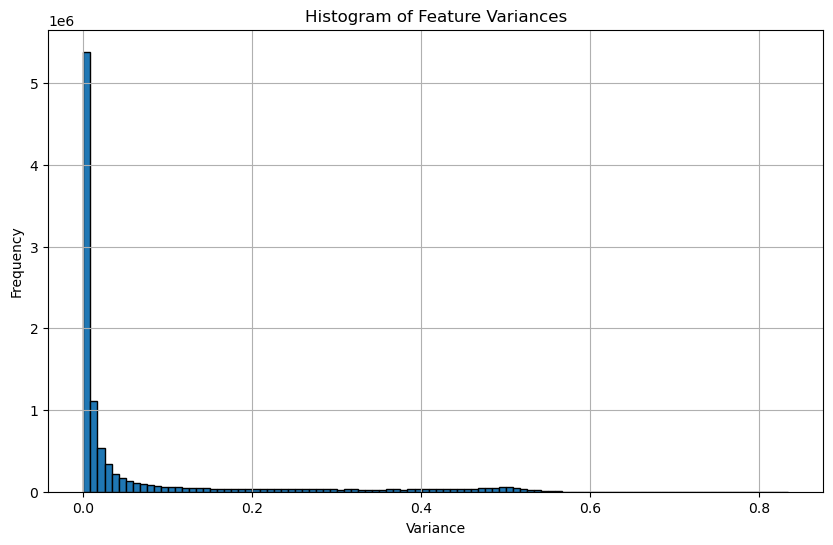

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import VarianceThreshold

# Calculate the variance of each feature
variances = final_df.var()

# Plot histogram of variances
plt.figure(figsize=(10, 6))
plt.hist(variances, bins=100, edgecolor='black')
plt.title('Histogram of Feature Variances')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.grid(True)

# Save the figure with high quality
plt.savefig('/home/vmottaqi/dream_challenge/snvs/feature_variance_histogram.png', dpi=600)

# Display the plot
plt.show()


In [50]:
# Count the number of features with variance less than 0.05
num_low_variance_features = np.sum(variances < 0.05)
print(f"Number of features with variance less than 0.05: {num_low_variance_features}")

Number of features with variance less than 0.05: 7728950


In [52]:
df = pd.read_pickle("/home/vmottaqi/dream_challenge/snvs/pkl_files/final_genotype_data_chunk_1.pickle")

In [53]:
df

,chr1:14671,chr1:14842,chr1:14863,chr1:15429,chr1:15515,chr1:15643,chr1:17289,chr1:99252,chr1:103214,chr1:108787,...,chrXY:156010054,chrXY:156016154,chrXY:156023112,chrXY:156024074,chrXY:156025359,chrXY:156025394,chrXY:156025531,chrXY:156025862,chrXY:156025879,chrXY:156027235
EPR_identifier,,,,,,,,,,,,,,,,,,,,,
27701024,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26024024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73495841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33997766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20271268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30135261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11991756,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46117530,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### last code

In [ ]:
import pandas as pd
import numpy as np
from pyplink import PyPlink
from joblib import Parallel, delayed

plink_file_prefix = "/home/vmottaqi/dream_challenge/snvs/PEGS_GWAS_genotypes_v1.1_train_synthetic"

def save_chunk(chunk, chunk_id):
    chunk.to_pickle(f'/home/vmottaqi/dream_challenge/snvs/pkl_files/final_genotype_data_chunk_{chunk_id}.pickle')
    print(f"Chunk {chunk_id} saved successfully.")

try:
    # Load BIM and FAM files
    with PyPlink(plink_file_prefix) as plink:
        bim = plink.get_bim()
        fam = plink.get_fam()

    # Create DataFrames but only keep relevant columns
    bim_df = pd.DataFrame(bim, columns=["chrom", "snp", "pos", "a1", "a2"])  # Excluded 'cm'
    fam_df = pd.DataFrame(fam, columns=["fid"]) 
    fam_df = fam_df.rename(columns={"fid": "EPR_identifier"})

    print("BIM and FAM files loaded successfully.")

    # Handle Missing rsIDs and '*' Alleles
    bim_df['a1'] = bim_df['a1'].replace('*', 'unknown')
    bim_df['a2'] = bim_df['a2'].replace('*', 'unknown')

    # Assuming the custom format is [Chromosome Number]:[Coordinate], as stated in README
    bim_df['snp'] = bim_df.apply(lambda row: f"chr{row['chrom']}:{row['pos']}" if pd.isna(row['snp']) else row['snp'], axis=1)

    print("BIM DataFrame processed successfully.")

    # Extract Genotypes
    genotypes = []
    with PyPlink(plink_file_prefix) as plink:
        for gt in plink:
            genotypes.append(gt[1])  # Store genotype array

    genotypes_arr = np.array(genotypes, dtype='int8').T  # Transpose to have individuals as rows and SNPs as columns
    print("Genotype array created successfully.")

    # Identify SNPs to keep (i.e., without any -1 values across all samples)
    snps_without_missing_values_mask = np.all(genotypes_arr != -1, axis=0)

    # Identify SNPs with known alleles (i.e., not 'unknown')
    known_alleles_mask = (bim_df['a1'] != 'unknown') & (bim_df['a2'] != 'unknown')

    # Combine the masks to identify SNPs to keep
    snps_to_keep_mask = snps_without_missing_values_mask & known_alleles_mask

    # Check the number of SNPs to keep (number of True values)
    num_snps_to_keep = np.sum(snps_to_keep_mask)
    print(f"Number of SNPs to keep: {num_snps_to_keep}")

    # Check the total number of SNPs
    total_snps = len(snps_to_keep_mask)
    print(f"Total number of SNPs: {total_snps}")

    # Optionally, print the proportion of SNPs to keep
    proportion_snps_to_keep = num_snps_to_keep / total_snps
    print(f"Proportion of SNPs to keep: {proportion_snps_to_keep:.2f}")

    # Get the list of SNP IDs to keep
    snps_to_keep = bim_df['snp'][snps_to_keep_mask].tolist()

    # Filter the genotype array to keep only SNPs without any -1 values and with known alleles
    genotypes_filtered = genotypes_arr[:, snps_to_keep_mask]

    # Create a DataFrame with EPR identifiers as rows and SNPs as columns
    final_df = pd.DataFrame(genotypes_filtered, index=fam_df['EPR_identifier'], columns=snps_to_keep)

    # Calculate the number of unique values in each column
    unique_counts = final_df.nunique()

    # Identify columns with only one unique value
    columns_with_one_unique_value = unique_counts[unique_counts == 1].index

    # Remove these columns from the dataframe inplace
    final_df.drop(columns=columns_with_one_unique_value, inplace=True)

    print("Columns with only one unique value removed successfully.")
    print(f"Final DataFrame shape: {final_df.shape}")

    # Define the size of each chunk (number of rows per chunk)
    chunk_size = 200  # Adjust this number based on your memory constraints

    # Create an iterator for the DataFrame chunks
    chunks = [final_df.iloc[i:i + chunk_size] for i in range(0, final_df.shape[0], chunk_size)]

    # Save each chunk to a separate pickle file in parallel
    Parallel(n_jobs=4)(delayed(save_chunk)(chunk, i+1) for i, chunk in enumerate(chunks))

    print("DataFrame has been saved in chunks as pickle files.")

except Exception as e:
    print(f"An error occurred: {e}")


In [ ]:
# after variance modification

In [25]:
import pandas as pd
import numpy as np
from pyplink import PyPlink
from joblib import Parallel, delayed

plink_file_prefix = "/home/vmottaqi/dream_challenge/snvs/PEGS_GWAS_genotypes_v1.1_train_synthetic"
output_dir = "/home/vmottaqi/dream_challenge/snvs/pkl_files/"

def save_chunk(chunk, chunk_id, base_name):
    chunk.to_pickle(f'{output_dir}{base_name}_chunk_{chunk_id}.pickle')
    print(f"Chunk {chunk_id} saved successfully.")

try:
    # Load BIM and FAM files
    with PyPlink(plink_file_prefix) as plink:
        bim = plink.get_bim()
        fam = plink.get_fam()

    # Create DataFrames but only keep relevant columns
    bim_df = pd.DataFrame(bim, columns=["chrom", "snp", "pos", "a1", "a2"])  # Excluded 'cm'
    fam_df = pd.DataFrame(fam, columns=["fid"]) 
    fam_df = fam_df.rename(columns={"fid": "EPR_identifier"})

    print("BIM and FAM files loaded successfully.")

    # Handle Missing rsIDs and '*' Alleles
    bim_df['a1'] = bim_df['a1'].replace('*', 'unknown')
    bim_df['a2'] = bim_df['a2'].replace('*', 'unknown')

    # Assuming the custom format is [Chromosome Number]:[Coordinate], as stated in README
    bim_df['snp'] = bim_df.apply(lambda row: f"chr{row['chrom']}:{row['pos']}" if pd.isna(row['snp']) else row['snp'], axis=1)

    print("BIM DataFrame processed successfully.")

    # Extract Genotypes
    genotypes = []
    with PyPlink(plink_file_prefix) as plink:
        for gt in plink:
            genotypes.append(gt[1])  # Store genotype array

    genotypes_arr = np.array(genotypes, dtype='int8').T  # Transpose to have individuals as rows and SNPs as columns
    print("Genotype array created successfully.")

    # Identify SNPs to keep (i.e., without any -1 values across all samples)
    snps_without_missing_values_mask = np.all(genotypes_arr != -1, axis=0)

    # Identify SNPs with known alleles (i.e., not 'unknown')
    known_alleles_mask = (bim_df['a1'] != 'unknown') & (bim_df['a2'] != 'unknown')

    # Combine the masks to identify SNPs to keep
    snps_to_keep_mask = snps_without_missing_values_mask & known_alleles_mask

    # Check the number of SNPs to keep (number of True values)
    num_snps_to_keep = np.sum(snps_to_keep_mask)
    print(f"Number of SNPs to keep: {num_snps_to_keep}")

    # Check the total number of SNPs
    total_snps = len(snps_to_keep_mask)
    print(f"Total number of SNPs: {total_snps}")

    # Optionally, print the proportion of SNPs to keep
    proportion_snps_to_keep = num_snps_to_keep / total_snps
    print(f"Proportion of SNPs to keep: {proportion_snps_to_keep:.2f}")

    # Get the list of SNP IDs to keep
    snps_to_keep = bim_df['snp'][snps_to_keep_mask].tolist()

    # Filter the genotype array to keep only SNPs without any -1 values and with known alleles
    genotypes_filtered = genotypes_arr[:, snps_to_keep_mask]

    # Create a DataFrame with EPR identifiers as rows and SNPs as columns
    final_df = pd.DataFrame(genotypes_filtered, index=fam_df['EPR_identifier'], columns=snps_to_keep)

    # Remove columns with variance less than 0.05
    variance_threshold = 0.05
    variances = final_df.var()
    cols_to_keep = variances[variances >= variance_threshold].index
    final_df = final_df[cols_to_keep]

    print(f"Columns with variance less than {variance_threshold} removed successfully.")
    print(f"Final DataFrame shape: {final_df.shape}")

    # Define the size of each chunk (number of rows per chunk)
    chunk_size = 600  # Adjust this number based on your memory constraints

    # Create an iterator for the DataFrame chunks
    chunks = [final_df.iloc[i:i + chunk_size] for i in range(0, final_df.shape[0], chunk_size)]

    # Extract base name for the output files
    base_name = plink_file_prefix.split('/')[-1]

    # Save each chunk to a separate pickle file in parallel
    Parallel(n_jobs=4)(delayed(save_chunk)(chunk, i+1, base_name) for i, chunk in enumerate(chunks))

    print("DataFrame has been saved in chunks as pickle files.")

except Exception as e:
    print(f"An error occurred: {e}")


KeyboardInterrupt: 

# Mapping rsIDs (SNPs) to genes

In [ ]:
# Query took too long. I downloaded from the database and the file snp_rs_ids_phenotype_associated.txt contains all the snp ids valid

## Biomart Query

In [26]:
# Test, which worked with a couple of rsIDs

import requests
import pandas as pd
import time

def fetch_vep_data(rsid_list, batch_size=200):
    server = "https://rest.ensembl.org"
    ext = "/vep/human/id"
    headers = {"Content-Type": "application/json", "Accept": "application/json"}

    gene_mapping = []

    for i in range(0, len(rsid_list), batch_size):
        batch = rsid_list[i:i + batch_size]
        
        # Prepare the payload
        payload = {"ids": batch}

        print(f"Processing batch {i//batch_size + 1} with {len(batch)} rsIDs...")

        try:
            response = requests.post(f"{server}{ext}", headers=headers, json=payload)
            print(f"Raw response status: {response.status_code}")
            if not response.ok:
                print(f"Failed to fetch data for batch starting with {batch[0]}: {response.status_code}")
                response.raise_for_status()

            # Parse the response
            data = response.json()
            print(f"Batch {i//batch_size + 1} response length: {len(data)}")

            for record in data:
                rsid = record.get('id', '')
                for transcript_consequence in record.get('transcript_consequences', []):
                    gene_id = transcript_consequence.get('gene_id', '')
                    gene_name = transcript_consequence.get('gene_symbol', '')
                    gene_mapping.append((rsid, gene_id, gene_name))
        except Exception as e:
            print(f"Error processing batch starting with {batch[0]}: {e}")

        # To avoid overwhelming the server, add a small delay
        time.sleep(1)

    return gene_mapping

# Test set of rsIDs
test_rsid_list = ['rs1229984', 'rs1799853', 'rs7412', 'rs429358', 'rs1800562', 'rs123', 'rsf44fg', 'rs4231512454151245124']

print("Starting the fetch process...")
# Fetch SNP-to-gene mappings for the test set
gene_mapping = fetch_vep_data(test_rsid_list)

# Convert to DataFrame and print the result
gene_mapping_df = pd.DataFrame(gene_mapping, columns=['rsID', 'Ensembl Gene ID', 'Gene Name'])
print(gene_mapping_df)

# Save the result to a CSV file
output_file_path = "test_snp_to_gene_mapping.csv"
gene_mapping_df.to_csv(output_file_path, index=False)
print(f"Results saved to {output_file_path}")


Starting the fetch process...
Processing batch 1 with 8 rsIDs...
Raw response status: 200
Batch 1 response length: 6
         rsID  Ensembl Gene ID Gene Name
0   rs1229984  ENSG00000196616     ADH1B
1   rs1229984  ENSG00000196616     ADH1B
2   rs1229984  ENSG00000196616     ADH1B
3   rs1229984  ENSG00000196616     ADH1B
4   rs1229984  ENSG00000196616     ADH1B
..        ...              ...       ...
69      rs123  ENSG00000070882    OSBPL3
70      rs123  ENSG00000070882    OSBPL3
71      rs123  ENSG00000070882    OSBPL3
72      rs123  ENSG00000070882    OSBPL3
73      rs123  ENSG00000070882    OSBPL3

[74 rows x 3 columns]
Results saved to test_snp_to_gene_mapping.csv


In [ ]:
import requests
import pandas as pd
import time

def fetch_vep_data(rsid_list, batch_size=200):
    server = "https://rest.ensembl.org"
    ext = "/vep/human/id"
    headers = {"Content-Type": "application/json", "Accept": "application/json"}

    gene_mapping = []

    for i in range(0, len(rsid_list), batch_size):
        batch = rsid_list[i:i + batch_size]
        
        # Prepare the payload
        payload = {"ids": batch}

        print(f"Processing batch {i//batch_size + 1} with {len(batch)} rsIDs...")

        try:
            response = requests.post(f"{server}{ext}", headers=headers, json=payload)
            print(f"Raw response status: {response.status_code}")
            if not response.ok:
                print(f"Failed to fetch data for batch starting with {batch[0]}: {response.status_code}")
                response.raise_for_status()

            # Parse the response
            data = response.json()
            print(f"Batch {i//batch_size + 1} response length: {len(data)}")

            for record in data:
                rsid = record.get('id', '')
                for transcript_consequence in record.get('transcript_consequences', []):
                    gene_id = transcript_consequence.get('gene_id', '')
                    gene_name = transcript_consequence.get('gene_symbol', '')
                    gene_mapping.append((rsid, gene_id, gene_name))
        except Exception as e:
            print(f"Error processing batch starting with {batch[0]}: {e}")

        # To avoid overwhelming the server, add a small delay
        time.sleep(1)

    return gene_mapping

try:
    # Load the first 10,000 rsIDs from the text file
    with open("rsids_to_query.txt", "r") as f:
        rsid_list = [line.strip() for line in f.readlines()[:1000]]

    print("Starting the fetch process...")
    # Fetch SNP-to-gene mappings for the rsIDs
    gene_mapping = fetch_vep_data(rsid_list)

    # Convert to DataFrame and print the result
    gene_mapping_df = pd.DataFrame(gene_mapping, columns=['rsID', 'Ensembl Gene ID', 'Gene Name'])
    print(gene_mapping_df)

    # Save the result to a CSV file
    output_file_path = "rsid_to_gene_mapping_10000.csv"
    gene_mapping_df.to_csv(output_file_path, index=False)
    print(f"Results saved to {output_file_path}")

except Exception as e:
    print(f"An error occurred: {e}")


In [96]:
# Only coding genes

import requests
import pandas as pd
import time

def fetch_vep_data(rsid_list, batch_size=200):
    server = "https://rest.ensembl.org"
    ext = "/vep/human/id"
    headers = {"Content-Type": "application/json", "Accept": "application/json"}

    # Define coding consequences
    coding_consequences = {
        'transcript_ablation', 'splice_acceptor_variant', 'splice_donor_variant',
        'stop_gained', 'frameshift_variant', 'stop_lost', 'start_lost',
        'transcript_amplification', 'inframe_insertion', 'inframe_deletion',
        'missense_variant', 'protein_altering_variant', 'splice_region_variant',
        'incomplete_terminal_codon_variant', 'start_retained_variant',
        'stop_retained_variant', 'synonymous_variant'
    }

    gene_mapping = []

    for i in range(0, len(rsid_list), batch_size):
        batch = rsid_list[i:i + batch_size]
        
        # Prepare the payload
        payload = {"ids": batch}

        print(f"Processing batch {i//batch_size + 1} with {len(batch)} rsIDs...")

        try:
            response = requests.post(f"{server}{ext}", headers=headers, json=payload)
            print(f"Raw response status: {response.status_code}")
            if not response.ok:
                print(f"Failed to fetch data for batch starting with {batch[0]}: {response.status_code}")
                response.raise_for_status()

            # Parse the response
            data = response.json()
            print(f"Batch {i//batch_size + 1} response length: {len(data)}")

            for record in data:
                rsid = record.get('id', '')
                for transcript_consequence in record.get('transcript_consequences', []):
                    gene_id = transcript_consequence.get('gene_id', '')
                    gene_name = transcript_consequence.get('gene_symbol', '')
                    consequence_terms = set(transcript_consequence.get('consequence_terms', []))
                    # Check if the consequence is a coding consequence
                    if coding_consequences & consequence_terms:
                        gene_mapping.append((rsid, gene_id, gene_name))
        except Exception as e:
            print(f"Error processing batch starting with {batch[0]}: {e}")

        # To avoid overwhelming the server, add a small delay
        time.sleep(0.6)

    return gene_mapping

try:
    # Load the first 10,000 rsIDs from the text file
    with open("rsids_to_query.txt", "r") as f:
        rsid_list = [line.strip() for line in f.readlines()[:3000]]

    print("Starting the fetch process...")
    # Fetch SNP-to-gene mappings for the rsIDs
    gene_mapping = fetch_vep_data(rsid_list)

    # Convert to DataFrame and print the result
    gene_mapping_df = pd.DataFrame(gene_mapping, columns=['rsID', 'Ensembl Gene ID', 'Gene Name'])
    print(gene_mapping_df)

    # Save the result to a CSV file
    output_file_path = "rsid_to_gene_mapping_10000.csv"
    gene_mapping_df.to_csv(output_file_path, index=False)
    print(f"Results saved to {output_file_path}")

except Exception as e:
    print(f"An error occurred: {e}")


Starting the fetch process...
Processing batch 1 with 200 rsIDs...
Raw response status: 200
Batch 1 response length: 196
Processing batch 2 with 200 rsIDs...
Raw response status: 200
Batch 2 response length: 199
Processing batch 3 with 200 rsIDs...
Raw response status: 200
Batch 3 response length: 200
Processing batch 4 with 200 rsIDs...
Raw response status: 200
Batch 4 response length: 197
Processing batch 5 with 200 rsIDs...
Raw response status: 200
Batch 5 response length: 198
Processing batch 6 with 200 rsIDs...
Raw response status: 200
Batch 6 response length: 198
Processing batch 7 with 200 rsIDs...
Raw response status: 200
Batch 7 response length: 196
Processing batch 8 with 200 rsIDs...
Raw response status: 200
Batch 8 response length: 198
Processing batch 9 with 200 rsIDs...
Raw response status: 200
Batch 9 response length: 199
Processing batch 10 with 200 rsIDs...
Raw response status: 200
Batch 10 response length: 200
Processing batch 11 with 200 rsIDs...
Raw response status:

In [97]:
df = pd.read_csv('rsid_to_gene_mapping_10000.csv')
df

,rsID,Ensembl Gene ID,Gene Name
0,rs200205172,ENSG00000227232,WASH7P
1,rs370884870,ENSG00000227232,WASH7P
2,rs370884870,ENSG00000227232,WASH7P
3,rs201219564,ENSG00000186092,OR4F5
4,rs201219564,ENSG00000186092,OR4F5
...,...,...,...
1278,rs199910868,ENSG00000127054,INTS11
1279,rs199910868,ENSG00000127054,INTS11
1280,rs199910868,ENSG00000127054,INTS11
1281,rs199910868,ENSG00000127054,INTS11


In [98]:
df = df[df.iloc[:, 2].notna()]
df

,rsID,Ensembl Gene ID,Gene Name
0,rs200205172,ENSG00000227232,WASH7P
1,rs370884870,ENSG00000227232,WASH7P
2,rs370884870,ENSG00000227232,WASH7P
3,rs201219564,ENSG00000186092,OR4F5
4,rs201219564,ENSG00000186092,OR4F5
...,...,...,...
1278,rs199910868,ENSG00000127054,INTS11
1279,rs199910868,ENSG00000127054,INTS11
1280,rs199910868,ENSG00000127054,INTS11
1281,rs199910868,ENSG00000127054,INTS11


In [99]:
import pandas as pd

def get_unique_values(df, col1_name, col2_name):
    """
    This function takes a pandas DataFrame and the names of two columns.
    It returns the unique values in each of those columns.
    """
    try:
        unique_col1 = df[col1_name].unique()
        unique_col2 = df[col2_name].unique()

        #print(f"Unique values in '{col1_name}': {unique_col1}")
        #print(f"Unique values in '{col2_name}': {unique_col2}")
        print(len(unique_col1))
        print(len(unique_col2))
    
    except KeyError:
        print("Error: One or both column names do not exist in the DataFrame.")


# Get the unique values in the first two columns
get_unique_values(df, df.columns[0], df.columns[1])  


214
24


### coherent code to obtain all the rdIDs from the txt file with query

In [ ]:
import requests
import pandas as pd
import time

def fetch_vep_data(rsid_list, batch_size=200):
    server = "https://rest.ensembl.org"
    ext = "/vep/human/id"
    headers = {"Content-Type": "application/json", "Accept": "application/json"}

    # Define coding consequences
    coding_consequences = {
        'transcript_ablation', 'splice_acceptor_variant', 'splice_donor_variant',
        'stop_gained', 'frameshift_variant', 'stop_lost', 'start_lost',
        'transcript_amplification', 'inframe_insertion', 'inframe_deletion',
        'missense_variant', 'protein_altering_variant', 'splice_region_variant',
        'incomplete_terminal_codon_variant', 'start_retained_variant',
        'stop_retained_variant', 'synonymous_variant'
    }

    gene_mapping = []

    for i in range(0, len(rsid_list), batch_size):
        batch = rsid_list[i:i + batch_size]
        
        # Prepare the payload
        payload = {"ids": batch}

        print(f"Processing batch {i//batch_size + 1} with {len(batch)} rsIDs...")

        try:
            response = requests.post(f"{server}{ext}", headers=headers, json=payload)
            print(f"Raw response status: {response.status_code}")
            if not response.ok:
                print(f"Failed to fetch data for batch starting with {batch[0]}: {response.status_code}")
                response.raise_for_status()

            # Parse the response
            data = response.json()
            print(f"Batch {i//batch_size + 1} response length: {len(data)}")

            for record in data:
                rsid = record.get('id', '')
                for transcript_consequence in record.get('transcript_consequences', []):
                    gene_id = transcript_consequence.get('gene_id', '')
                    gene_name = transcript_consequence.get('gene_symbol', '')
                    consequence_terms = set(transcript_consequence.get('consequence_terms', []))
                    # Check if the consequence is a coding consequence
                    if coding_consequences & consequence_terms:
                        gene_mapping.append((rsid, gene_id, gene_name))
        except Exception as e:
            print(f"Error processing batch starting with {batch[0]}: {e}")

        # To avoid overwhelming the server, add a small delay
        time.sleep(0.6)

    return gene_mapping

try:
    # Load the first 10,000 rsIDs from the text file
    with open("rsids_to_query.txt", "r") as f:
        rsid_list = [line.strip() for line in f.readlines()]

    print("Starting the fetch process...")
    # Fetch SNP-to-gene mappings for the rsIDs
    gene_mapping = fetch_vep_data(rsid_list)

    # Convert to DataFrame and print the result
    gene_mapping_df = pd.DataFrame(gene_mapping, columns=['rsID', 'Ensembl Gene ID', 'Gene Name'])
    print(gene_mapping_df)

    # Save the result to a CSV file
    output_file_path = "rsid_to_gene_mapping_all.csv"
    gene_mapping_df.to_csv(output_file_path, index=False)
    print(f"Results saved to {output_file_path}")

except Exception as e:
    print(f"An error occurred: {e}")


### Obtaining all SNPs from biomart API

In [12]:
import requests
import pandas as pd

def fetch_snp_to_gene_mapping():
    url = "https://www.ensembl.org/biomart/martservice"

    # Construct the query from the provided XML
    query = """
    <?xml version="1.0" encoding="UTF-8"?>
    <!DOCTYPE Query>
    <Query  virtualSchemaName = "default" formatter = "TSV" header = "0" uniqueRows = "0" count = "" datasetConfigVersion = "0.6" >
        <Dataset name = "hsapiens_snp" interface = "default" >
            <Filter name = "variation_source" value = "dbSNP"/>
            <Filter name = "chr_name" value = "1"/>
            <Filter name = "so_mini_parent_name" value = "coding_sequence_variant"/>
            <Attribute name = "refsnp_id" />
            <Attribute name = "ensembl_gene_name" />
            <Attribute name = "ensembl_gene_stable_id" />
        </Dataset>
    </Query>
    """

    print("Sending query to BioMart...")
    response = requests.post(url, data={'query': query.strip()})

    print(f"Response status code: {response.status_code}")
    if response.ok:
        data = response.text.strip().split('\n')
        # Parse the response
        gene_mapping = []
        for line in data:
            parts = line.split('\t')
            if len(parts) == 3:
                gene_mapping.append(parts)
            else:
                print(f"Unexpected format in line: {line}")
        return gene_mapping
    else:
        print(f"Error fetching data: {response.status_code}")
        print(response.text)
        response.raise_for_status()

# Main execution
try:
    gene_mapping = fetch_snp_to_gene_mapping()
    # Convert to DataFrame and print
    gene_mapping_df = pd.DataFrame(gene_mapping, columns=['rsID', 'Gene Name', 'Ensembl Gene ID'])
    print(f"Data shape: {gene_mapping_df.shape}")
    print(gene_mapping_df.head())
except Exception as e:
    print(f"An error occurred: {e}")


Sending query to BioMart...


KeyboardInterrupt: 

In [14]:
import requests
import pandas as pd
import time

def fetch_snp_to_gene_mapping(chromosome, start, end):
    url = "https://www.ensembl.org/biomart/martservice"

    # Construct the query from the provided XML with chunking
    query = f"""
    <?xml version="1.0" encoding="UTF-8"?>
    <!DOCTYPE Query>
    <Query  virtualSchemaName = "default" formatter = "TSV" header = "0" uniqueRows = "0" count = "" datasetConfigVersion = "0.6" >
        <Dataset name = "hsapiens_snp" interface = "default" >
            <Filter name = "variation_source" value = "dbSNP"/>
            <Filter name = "chr_name" value = "{chromosome}"/>
            <Filter name = "start" value = "{start}"/>
            <Filter name = "end" value = "{end}"/>
            <Filter name = "so_mini_parent_name" value = "coding_sequence_variant"/>
            <Attribute name = "refsnp_id" />
            <Attribute name = "ensembl_gene_name" />
            <Attribute name = "ensembl_gene_stable_id" />
        </Dataset>
    </Query>
    """

    print(f"Sending query to BioMart for region {chromosome}:{start}-{end}...")
    response = requests.post(url, data={'query': query.strip()})

    print(f"Response status code: {response.status_code}")
    if response.ok:
        data = response.text.strip().split('\n')
        # Parse the response
        gene_mapping = []
        for line in data:
            parts = line.split('\t')
            if len(parts) == 3:
                gene_mapping.append(parts)
            else:
                print(f"Unexpected format in line: {line}")
        return gene_mapping
    else:
        print(f"Error fetching data: {response.status_code}")
        print(response.text)
        response.raise_for_status()

def process_chromosome_in_chunks(chromosome, chunk_size=100000):
    start = 1
    end = chunk_size
    complete_mapping = []

    while True:
        try:
            gene_mapping = fetch_snp_to_gene_mapping(chromosome, start, end)
            if not gene_mapping:
                print("No more data available. Ending the fetch process.")
                break
            complete_mapping.extend(gene_mapping)
            start += chunk_size
            end += chunk_size
        except Exception as e:
            print(f"An error occurred while processing region {chromosome}:{start}-{end}: {e}")
            break

        # To avoid overwhelming the server, add a small delay
        time.sleep(1)

    return complete_mapping

# Main execution
try:
    chromosome = "1"
    complete_mapping = process_chromosome_in_chunks(chromosome)

    # Convert to DataFrame and print
    gene_mapping_df = pd.DataFrame(complete_mapping, columns=['rsID', 'Gene Name', 'Ensembl Gene ID'])
    print(f"Data shape: {gene_mapping_df.shape}")
    print(gene_mapping_df.head())
except Exception as e:
    print(f"An error occurred: {e}")


Sending query to BioMart for region 1:1-100000...
An error occurred while processing region 1:1-100000: ("Connection broken: InvalidChunkLength(got length b'', 0 bytes read)", InvalidChunkLength(got length b'', 0 bytes read))
Data shape: (0, 3)
Empty DataFrame
Columns: [rsID, Gene Name, Ensembl Gene ID]
Index: []


## Obtaining snp IDs from the bed file

In [21]:
import pandas as pd
import numpy as np
from pyplink import PyPlink

plink_file_prefix = "/home/vmottaqi/dream_challenge/snvs/PEGS_GWAS_genotypes_v1.1_train_synthetic"

try:
    # Load BIM and FAM files
    with PyPlink(plink_file_prefix) as plink:
        bim = plink.get_bim()
        fam = plink.get_fam()

    # Create DataFrames but only keep relevant columns
    bim_df = pd.DataFrame(bim, columns=["chrom", "snp", "pos", "a1", "a2"])  # Excluded 'cm'
    fam_df = pd.DataFrame(fam, columns=["fid"]) 
    fam_df = fam_df.rename(columns={"fid": "EPR_identifier"})

    print("BIM and FAM files loaded successfully.")

    # Handle Missing rsIDs and '*' Alleles
    bim_df['a1'] = bim_df['a1'].replace('*', 'unknown')
    bim_df['a2'] = bim_df['a2'].replace('*', 'unknown')

    # Assuming the custom format is [Chromosome Number]:[Coordinate], as stated in README
    bim_df['snp'] = bim_df.apply(lambda row: f"chr{row['chrom']}:{row['pos']}" if pd.isna(row['snp']) else row['snp'], axis=1)

    print("BIM DataFrame processed successfully.")

    # Extract Genotypes
    genotypes = []
    with PyPlink(plink_file_prefix) as plink:
        for gt in plink:
            genotypes.append(gt[1])  # Store genotype array

    genotypes_arr = np.array(genotypes, dtype='int8').T  # Transpose to have individuals as rows and SNPs as columns
    print("Genotype array created successfully.")

    # Identify SNPs to keep (i.e., without any -1 values across all samples)
    snps_without_missing_values_mask = np.all(genotypes_arr != -1, axis=0)

    # Identify SNPs with known alleles (i.e., not 'unknown')
    known_alleles_mask = (bim_df['a1'] != 'unknown') & (bim_df['a2'] != 'unknown')

    # Combine the masks to identify SNPs to keep
    snps_to_keep_mask = snps_without_missing_values_mask & known_alleles_mask

    # Filter the genotype array to keep only SNPs without any -1 values and with known alleles
    genotypes_filtered = genotypes_arr[:, snps_to_keep_mask]

    # Create a DataFrame with EPR identifiers as rows and SNPs as columns
    final_df = pd.DataFrame(genotypes_filtered, index=fam_df['EPR_identifier'], columns=bim_df['snp'][snps_to_keep_mask])

    print("Final DataFrame created successfully.")
    print(f"Final DataFrame shape: {final_df.shape}")

except Exception as e:
    print(f"An error occurred: {e}")


/home/vmottaqi/.conda/envs/mcf7/lib/python3.12/site-packages/pyplink/pyplink.py:227: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  bim = pd.read_csv(self.bim_filename, sep=r"\s+",


BIM and FAM files loaded successfully.
BIM DataFrame processed successfully.


/home/vmottaqi/.conda/envs/mcf7/lib/python3.12/site-packages/pyplink/pyplink.py:227: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  bim = pd.read_csv(self.bim_filename, sep=r"\s+",


Genotype array created successfully.
Final DataFrame created successfully.
Final DataFrame shape: (1515, 10355131)


In [33]:
final_df.shape

(1515, 10355131)

In [34]:
final_df.columns[:10]

Index(['chr1:14671', 'chr1:14842', 'chr1:14863', 'chr1:15429', 'chr1:15515',
       'chr1:15643', 'chr1:17289', 'chr1:19236', 'chr1:99252', 'chr1:103214'],
      dtype='object', name='snp')

In [36]:
bim_df.head()

,chrom,snp,pos,a1,a2
snp,,,,,
1:10248,1,chr1:10248,10248,unknown,AAACCCTAAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCAA...
1:10329,1,chr1:10329,10329,ACCCT,ACCCCT
1:10347,1,chr1:10347,10347,A,AACCCT
1:10444,1,chr1:10444,10444,unknown,TAACCC
1:10446,1,chr1:10446,10446,unknown,AC


In [40]:
bim_df.index

Index(['1:10248', '1:10329', '1:10347', '1:10444', '1:10446', '1:10449',
       '1:10469', '1:10533', 'rs189107123', '1:10815',
       ...
       '23:156029985', '23:156029989', '23:156029991', '23:156030025',
       '23:156030059', '23:156030062', '23:156030063', '23:156030064',
       '23:156030077', '23:156030118'],
      dtype='object', name='snp', length=15000000)

In [41]:

# Extract valid rsIDs from the DataFrame index
rsid_list = bim_df.index[bim_df.index.str.startswith('rs', na=False)].tolist()

# Print the first 20 rsIDs for verification
print("First 20 rsIDs:")
for rsid in rsid_list[:20]:
    print(rsid)

# Save the rsIDs to a text file
with open("rsids_to_query.txt", "w") as f:
    for rsid in rsid_list:
        f.write(f"{rsid}\n")

print("Valid rsIDs saved to rsids_to_query.txt")

First 20 rsIDs:
rs189107123
rs10218527
rs28853987
rs201747181
rs370886505
rs375086259
rs201055865
rs369473859
rs201327123
rs79585140
rs199856693
rs201855936
rs78601809
rs374029747
rs148220436
rs141130360
rs200205172
rs199740902
rs201057270
rs370884870
Valid rsIDs saved to rsids_to_query.txt


In [28]:
# Ensure that the final_df from Part 1a is in memory before running this part

try:
    # Get the column names from the DataFrame
    column_names = final_df.columns.tolist()

    # Filter only valid rsIDs (those starting with 'rs')
    rsid_list = [col for col in column_names if col.startswith('rs')]

    # Save the rsIDs to a text file
    with open("rsids_to_query.txt", "w") as f:
        for rsid in rsid_list:
            f.write(f"{rsid}\n")

    print("Valid rsIDs saved to rsids_to_query.txt")

except Exception as e:
    print(f"An error occurred: {e}")


Valid rsIDs saved to rsids_to_query.txt


# SNV and indels last code (+ reduction of snps)

## 1 test

In [2]:
import pandas as pd
import numpy as np
from pyplink import PyPlink
from joblib import Parallel, delayed

plink_file_prefix = "/home/vmottaqi/dream_challenge/snvs/PEGS_GWAS_genotypes_v1.1_train_synthetic"
output_dir = "/home/vmottaqi/dream_challenge/snvs/pkl_files/"

def save_chunk(chunk, chunk_id, base_name):
    chunk.to_pickle(f'{output_dir}{base_name}_chunk_{chunk_id}.pickle')
    print(f"Chunk {chunk_id} saved successfully.")

try:
    # Load BIM and FAM files
    with PyPlink(plink_file_prefix) as plink:
        bim = plink.get_bim()
        fam = plink.get_fam()

    # Create DataFrames but only keep relevant columns
    bim_df = pd.DataFrame(bim, columns=["chrom", "snp", "pos", "a1", "a2"])  # Excluded 'cm'
    fam_df = pd.DataFrame(fam, columns=["fid"]) 
    fam_df = fam_df.rename(columns={"fid": "EPR_identifier"})

    print("BIM and FAM files loaded successfully.")

    # Handle Missing rsIDs and '*' Alleles
    bim_df['a1'] = bim_df['a1'].replace('*', 'unknown')
    bim_df['a2'] = bim_df['a2'].replace('*', 'unknown')

    # Assuming the custom format is [Chromosome Number]:[Coordinate], as stated in README
    bim_df['snp'] = bim_df.apply(lambda row: f"chr{row['chrom']}:{row['pos']}" if pd.isna(row['snp']) else row['snp'], axis=1)

    print("BIM DataFrame processed successfully.")

    # Extract Genotypes
    genotypes = []
    with PyPlink(plink_file_prefix) as plink:
        for gt in plink:
            genotypes.append(gt[1])  # Store genotype array

    genotypes_arr = np.array(genotypes, dtype='int8').T  # Transpose to have individuals as rows and SNPs as columns
    print("Genotype array created successfully.")

except Exception as e:
    print(f"An error occurred: {e}")


/home/vmottaqi/.conda/envs/mcf7/lib/python3.12/site-packages/pyplink/pyplink.py:227: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  bim = pd.read_csv(self.bim_filename, sep=r"\s+",


BIM and FAM files loaded successfully.
BIM DataFrame processed successfully.


/home/vmottaqi/.conda/envs/mcf7/lib/python3.12/site-packages/pyplink/pyplink.py:227: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  bim = pd.read_csv(self.bim_filename, sep=r"\s+",


Genotype array created successfully.


In [5]:
with open('/home/vmottaqi/dream_challenge/rsID_mapping/snp_rs_ids_phenotype_associated.txt', 'r') as f:  # Replace with the actual path to your file
        valid_snp_ids_phenotype = set(line.strip() for line in f)

In [8]:
import pandas as pd
import numpy as np
from pyplink import PyPlink
from joblib import Parallel, delayed

plink_file_prefix = "/home/vmottaqi/dream_challenge/snvs/PEGS_GWAS_genotypes_v1.1_train_synthetic"
output_dir = "/home/vmottaqi/dream_challenge/snvs/pkl_files/"

try:
    # Identify SNPs to keep (i.e., without any -1 values across all samples)
    snps_without_missing_values_mask = np.all(genotypes_arr != -1, axis=0)

    # Identify SNPs with known alleles (i.e., not 'unknown')
    known_alleles_mask = (bim_df['a1'] != 'unknown') & (bim_df['a2'] != 'unknown')

    # Combine the masks to identify SNPs to keep
    snps_to_keep_mask = snps_without_missing_values_mask & known_alleles_mask & bim_df.index.isin(valid_snp_ids_phenotype) # It's a boolean!

    # Check the number of SNPs to keep (number of True values)
    num_snps_to_keep = np.sum(snps_to_keep_mask)
    print(f"Number of SNPs to keep: {num_snps_to_keep}")

    # Check the total number of SNPs
    total_snps = len(snps_to_keep_mask)
    print(f"Total number of SNPs: {total_snps}")

    # Optionally, print the proportion of SNPs to keep
    proportion_snps_to_keep = num_snps_to_keep / total_snps
    print(f"Proportion of SNPs to keep: {proportion_snps_to_keep:.2f}")

    # Get the list of SNP IDs to keep
    snps_to_keep = bim_df.index[snps_to_keep_mask].tolist()

    # Filter the genotype array to keep only SNPs without any -1 values and with known alleles
    genotypes_filtered = genotypes_arr[:, snps_to_keep_mask]

except Exception as e:
    print(f"An error occurred: {e}")


Number of SNPs to keep: 145760
Total number of SNPs: 15000000
Proportion of SNPs to keep: 0.01


In [11]:
num_matches = bim_df.index.isin(valid_snp_ids_phenotype).sum()
print(num_matches)

177213


In [12]:
    # Create a DataFrame with EPR identifiers as rows and SNPs as columns
final_df = pd.DataFrame(genotypes_filtered, index=fam_df['EPR_identifier'], columns=snps_to_keep)


print(f"Final DataFrame shape: {final_df.shape}")

Final DataFrame shape: (1515, 145760)


In [13]:
final_df.head()

,rs146327803,rs146331776,rs143282473,rs149944086,rs369972134,rs200195897,rs200038862,rs201580592,rs114478480,rs148327885,...,rs1936645,rs190280980,rs143478537,rs148981599,rs145867198,rs181070478,rs17052027,rs147213132,rs41304992,rs7050330
EPR_identifier,,,,,,,,,,,,,,,,,,,,,
27701024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26024024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73495841,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
33997766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20271268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Final code (clinically associated SNPs + PRS)

In [2]:
import pandas as pd

# Load the TSV file
tsv_file = '/home/vmottaqi/dream_challenge/snvs/PRS_snps.tsv'  # Replace with your actual file path
df = pd.read_csv(tsv_file, sep='\t')

# Extract the third column (SNP IDs)
snp_ids = df.iloc[:, 2]
snp_ids
# Save the SNP IDs to a CSV file
snp_ids.to_csv('/path/to/your/output_file.csv', index=False, header=False)


0        rs9442373
1       rs12410859
2        rs4648807
3         rs262688
4         rs263526
           ...    
5982    rs73187640
5983     rs7062927
5984      rs951323
5985     rs5982552
5986     rs6641634
Name: ID, Length: 5987, dtype: object

In [3]:
snp_ids.to_csv('/home/dream/PEGS_genomic_data/SNVs_small_indels/processing_codes/PRS_snps.csv', index=False, header=False)

In [5]:
import pandas as pd
from pyplink import PyPlink

# Paths to your files
plink_file_prefix = "/home/dream/PEGS_genomic_data/SNVs_small_indels/train/PEGS_GWAS_genotypes_v1.1_train_synthetic"
snp_csv_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/processing_codes/PRS_snps.csv'  # Replace with your actual path to the CSV file

# Load the SNP IDs from the CSV file
snp_ids_csv = pd.read_csv(snp_csv_file, header=None)
snp_ids_csv = set(snp_ids_csv[0])

try:
    # Load BIM file
    with PyPlink(plink_file_prefix) as plink:
        bim = plink.get_bim()

    # Create a DataFrame for BIM file and extract SNP IDs
    bim_df = pd.DataFrame(bim, columns=["chrom", "snp", "pos", "a1", "a2"])  # Excluded 'cm'
    bim_snps = set(bim_df['snp'])

    # Find the intersection of SNP IDs
    common_snps = bim_snps.intersection(snp_ids_csv)
    num_common_snps = len(common_snps)

    print(f"Number of common SNPs: {num_common_snps}")
    # print("Common SNPs:")
    print(common_snps)

except Exception as e:
    print(f"An error occurred: {e}")


/home/vmottaqi/.conda/envs/mcf7/lib/python3.12/site-packages/pyplink/pyplink.py:227: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  bim = pd.read_csv(self.bim_filename, sep=r"\s+",


Number of common SNPs: 0
set()


In [ ]:
# last code

In [13]:
import pandas as pd
import numpy as np
from pyplink import PyPlink

plink_file_prefix = "/home/dream/PEGS_genomic_data/SNVs_small_indels/train/PEGS_GWAS_genotypes_v1.1_train_synthetic"
output_dir = "/home/dream/PEGS_genomic_data/SNVs_small_indels/train/"

# Load the list of clinically associated SNPs
with open('/home/dream/PEGS_genomic_data/SNVs_small_indels/processing_codes/all_snps_list_clinically_associated.txt', 'r') as f:
    valid_snp_ids_phenotype = set(line.strip() for line in f)

# Load the list of SNPs from the additional CSV file
prs_snp_list_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/processing_codes/PRS_snps.csv'  # Replace with the actual path to your file
prs_snp_list_df = pd.read_csv(prs_snp_list_file, header=None, names=['snp'])
valid_snp_ids_prs = set(prs_snp_list_df['snp'].str.strip())

# Combine the sets of valid SNP IDs
valid_snp_ids_combined = valid_snp_ids_phenotype.union(valid_snp_ids_prs)
len(valid_snp_ids_combined)

444785

In [17]:
import pandas as pd
import numpy as np
from pyplink import PyPlink

plink_file_prefix = "/home/dream/PEGS_genomic_data/SNVs_small_indels/train/PEGS_GWAS_genotypes_v1.1_train_synthetic"
output_dir = "/home/dream/PEGS_genomic_data/SNVs_small_indels/train/"

# Load the list of clinically associated SNPs
with open('/home/dream/PEGS_genomic_data/SNVs_small_indels/processing_codes/all_snps_list_clinically_associated.txt', 'r') as f:
    valid_snp_ids_phenotype = set(line.strip() for line in f)

# Load the list of SNPs from the additional CSV file
prs_snp_list_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/processing_codes/PRS_snps.csv'  # Replace with the actual path to your file
prs_snp_list_df = pd.read_csv(prs_snp_list_file, header=None, names=['snp'])
valid_snp_ids_prs = set(prs_snp_list_df['snp'].str.strip())

# Combine the sets of valid SNP IDs
valid_snp_ids_combined = valid_snp_ids_phenotype.union(valid_snp_ids_prs)

try:
    # Load BIM and FAM files
    with PyPlink(plink_file_prefix) as plink:
        bim = plink.get_bim()
        fam = plink.get_fam()

    # Create DataFrames but only keep relevant columns
    bim_df = pd.DataFrame(bim, columns=["chrom", "snp", "pos", "a1", "a2"])  # Excluded 'cm'
    fam_df = pd.DataFrame(fam, columns=["fid"]) 
    fam_df = fam_df.rename(columns={"fid": "EPR_identifier"})

    print("BIM and FAM files loaded successfully.")

    # Handle Missing rsIDs and '*' Alleles
    bim_df['a1'] = bim_df['a1'].replace('*', 'unknown')
    bim_df['a2'] = bim_df['a2'].replace('*', 'unknown')

    # Assuming the custom format is [Chromosome Number]:[Coordinate], as stated in README
    bim_df['snp'] = bim_df.apply(lambda row: f"chr{row['chrom']}:{row['pos']}" if pd.isna(row['snp']) else row['snp'], axis=1)

    print("BIM DataFrame processed successfully.")

    # Extract Genotypes
    genotypes = []
    with PyPlink(plink_file_prefix) as plink:
        for gt in plink:
            genotypes.append(gt[1])  # Store genotype array

    genotypes_arr = np.array(genotypes, dtype='int8').T  # Transpose to have individuals as rows and SNPs as columns
    print("Genotype array created successfully.")

    # Identify SNPs to keep (i.e., without any -1 values across all samples)
    snps_without_missing_values_mask = np.all(genotypes_arr != -1, axis=0)

    # Identify SNPs with known alleles (i.e., not 'unknown')
    known_alleles_mask = (bim_df['a1'] != 'unknown') & (bim_df['a2'] != 'unknown')

    # Combine the masks to identify SNPs to keep, including those in the combined list of valid SNPs
    snps_to_keep_mask = snps_without_missing_values_mask & known_alleles_mask & bim_df['snp'].isin(valid_snp_ids_combined)
    
except Exception as e:
    print(f"An error occurred: {e}")

/home/vmottaqi/.conda/envs/mcf7/lib/python3.12/site-packages/pyplink/pyplink.py:227: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  bim = pd.read_csv(self.bim_filename, sep=r"\s+",


BIM and FAM files loaded successfully.
BIM DataFrame processed successfully.


/home/vmottaqi/.conda/envs/mcf7/lib/python3.12/site-packages/pyplink/pyplink.py:227: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  bim = pd.read_csv(self.bim_filename, sep=r"\s+",


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
from pyplink import PyPlink

plink_file_prefix = "/home/dream/PEGS_genomic_data/SNVs_small_indels/train/PEGS_GWAS_genotypes_v1.1_train_synthetic"
output_dir = "/home/dream/PEGS_genomic_data/SNVs_small_indels/train/"

# Load the list of clinically associated SNPs
with open('./all_snps_list_clinically_associated.txt', 'r') as f:
    valid_snp_ids_phenotype = set(line.strip() for line in f)

# Load the list of SNPs from the additional CSV file
prs_snp_list_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/processing_codes/PRS_snps.csv'  # Replace with the actual path to your file
prs_snp_list_df = pd.read_csv(prs_snp_list_file, header=None, names=['snp'])
valid_snp_ids_prs = set(prs_snp_list_df['snp'].str.strip())

# Combine the sets of valid SNP IDs
valid_snp_ids_combined = valid_snp_ids_phenotype.union(valid_snp_ids_prs)

try:
    # Load BIM and FAM files
    with PyPlink(plink_file_prefix) as plink:
        bim = plink.get_bim()
        fam = plink.get_fam()

    # Create DataFrames but only keep relevant columns
    bim_df = pd.DataFrame(bim, columns=["chrom", "snp", "pos", "a1", "a2"])  # Excluded 'cm'
    fam_df = pd.DataFrame(fam, columns=["fid"]) 
    fam_df = fam_df.rename(columns={"fid": "EPR_identifier"})

    print("BIM and FAM files loaded successfully.")

    # Handle Missing rsIDs and '*' Alleles
    bim_df['a1'] = bim_df['a1'].replace('*', 'unknown')
    bim_df['a2'] = bim_df['a2'].replace('*', 'unknown')

    # Assuming the custom format is [Chromosome Number]:[Coordinate], as stated in README
    bim_df['snp'] = bim_df.apply(lambda row: f"chr{row['chrom']}:{row['pos']}" if pd.isna(row['snp']) else row['snp'], axis=1)

    print("BIM DataFrame processed successfully.")

    # Extract Genotypes
    genotypes = []
    with PyPlink(plink_file_prefix) as plink:
        for gt in plink:
            genotypes.append(gt[1])  # Store genotype array

    genotypes_arr = np.array(genotypes, dtype='int8').T  # Transpose to have individuals as rows and SNPs as columns
    print("Genotype array created successfully.")

    # Identify SNPs to keep (i.e., without any -1 values across all samples)
    snps_without_missing_values_mask = np.all(genotypes_arr != -1, axis=0)

    # Identify SNPs with known alleles (i.e., not 'unknown')
    known_alleles_mask = (bim_df['a1'] != 'unknown') & (bim_df['a2'] != 'unknown')

    # Combine the masks to identify SNPs to keep, including those in the combined list of valid SNPs
    snps_to_keep_mask = snps_without_missing_values_mask & known_alleles_mask & bim_df['snp'].isin(valid_snp_ids_combined)

    # Check the number of SNPs to keep (number of True values)
    num_snps_to_keep = np.sum(snps_to_keep_mask)
    print(f"Number of SNPs to keep: {num_snps_to_keep}")

    # Check the total number of SNPs
    total_snps = len(snps_to_keep_mask)
    print(f"Total number of SNPs: {total_snps}")

    # Optionally, print the proportion of SNPs to keep
    proportion_snps_to_keep = num_snps_to_keep / total_snps
    print(f"Proportion of SNPs to keep: {proportion_snps_to_keep:.2f}")

    # Get the list of SNP IDs to keep
    snps_to_keep = bim_df[snps_to_keep_mask].index.tolist()

    # Filter the genotype array to keep only SNPs without any -1 values and with known alleles
    genotypes_filtered = genotypes_arr[:, snps_to_keep_mask]

    # Create a DataFrame with EPR identifiers as rows and SNPs as columns
    final_df = pd.DataFrame(genotypes_filtered, index=fam_df['EPR_identifier'], columns=snps_to_keep)

    print(f"Final DataFrame shape: {final_df.shape}")

    # Extract base name for the output files
    base_name = plink_file_prefix.split('/')[-1]

    final_df.to_pickle(f'{output_dir}{base_name}.pickle')
    
    print("DataFrame has been saved in chunks as pickle files.")

except Exception as e:
    print(f"An error occurred: {e}")


In [ ]:
# Manula editing because the previous chatgpt ones were bs

In [19]:
with open('/home/dream/PEGS_genomic_data/SNVs_small_indels/processing_codes/all_snps_list_clinically_associated.txt', 'r') as f:  # Replace with the actual path to your file
        valid_snp_ids_phenotype = set(line.strip() for line in f)
valid_snp_ids_phenotype

{'rs2153196376',
 'rs1601938489',
 'rs764924345',
 '7:6005893',
 'rs2116989385',
 'rs148816140',
 '16:23630209',
 '12:51913174',
 'rs1555591622',
 'X:83509324',
 'rs864309569',
 'rs2280788',
 '16:66550054',
 '19:1106231',
 'rs886042128',
 'rs1965456387',
 '12:6944162',
 '16:2084358',
 '17:16217286',
 'rs1643653768',
 '3:193647166',
 '6:152330474',
 'X:22219073',
 'rs201387914',
 '12:115996522',
 '11:2165698',
 'rs1562965036',
 '1:201047628',
 'rs398124419',
 'rs1562352435',
 'rs886040882',
 '19:1221332',
 'rs1554431441',
 '9:83971691',
 '17:31156022',
 '7:50543970',
 'rs202093691',
 'rs121434533',
 '12:123744728',
 '6:26156814',
 'rs1555744805',
 'rs750023118',
 'rs761285440',
 'rs2043405278',
 '2:85371467',
 'rs1553261982',
 'rs2128053495',
 '17:35577246',
 'rs989599402',
 '19:35845711',
 'rs35552856',
 'rs2141160443',
 'rs587783548',
 'rs199476197',
 'rs121913341',
 'rs143765389',
 '5:177607309',
 'rs80356591',
 'rs1804782152',
 '2:26692898',
 '13:72835358',
 '14:39159508',
 '17:3132

In [20]:
with open('/home/dream/PEGS_genomic_data/SNVs_small_indels/processing_codes/all_snps_list_clinically_associated.txt', 'r') as f:  # Replace with the actual path to your file
        valid_snp_ids_phenotype_clinc = set(line.strip() for line in f)
 
# Load the list of SNPs from the additional CSV file
prs_snp_list_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/processing_codes/PRS_snps.csv'  # Replace with the actual path to your file
prs_snp_list_df = pd.read_csv(prs_snp_list_file, header=None, names=['snp'])
valid_snp_ids_prs = set(prs_snp_list_df['snp'].str.strip())

# Combine the sets of valid SNP IDs
valid_snp_ids_phenotype = valid_snp_ids_phenotype_clinc.union(valid_snp_ids_prs)
valid_snp_ids_phenotype

{'rs2153196376',
 'rs1601938489',
 'rs764924345',
 '7:6005893',
 'rs2116989385',
 'rs148816140',
 '16:23630209',
 '12:51913174',
 'rs1555591622',
 'X:83509324',
 'rs864309569',
 'rs2280788',
 '16:66550054',
 '19:1106231',
 'rs886042128',
 'rs1965456387',
 '12:6944162',
 '16:2084358',
 '17:16217286',
 'rs1643653768',
 '3:193647166',
 '6:152330474',
 'X:22219073',
 'rs201387914',
 '12:115996522',
 '11:2165698',
 'rs1562965036',
 '1:201047628',
 'rs398124419',
 'rs1562352435',
 'rs886040882',
 '19:1221332',
 'rs1554431441',
 '9:83971691',
 '17:31156022',
 '7:50543970',
 'rs202093691',
 'rs121434533',
 '12:123744728',
 '6:26156814',
 'rs1555744805',
 'rs750023118',
 'rs761285440',
 'rs2043405278',
 '2:85371467',
 'rs1553261982',
 'rs2128053495',
 '17:35577246',
 'rs989599402',
 '19:35845711',
 'rs35552856',
 'rs2141160443',
 'rs587783548',
 'rs199476197',
 'rs121913341',
 'rs143765389',
 '5:177607309',
 'rs80356591',
 'rs1804782152',
 '2:26692898',
 '13:72835358',
 '14:39159508',
 '17:3132

In [ ]:
import pandas as pd
import numpy as np
from pyplink import PyPlink

plink_file_prefix = "/home/dream/PEGS_genomic_data/SNVs_small_indels/test/PEGS_GWAS_genotypes_v1.1_train_synthetic"
output_dir = "/home/dream/PEGS_genomic_data/SNVs_small_indels/train/"

with open('/home/dream/PEGS_genomic_data/SNVs_small_indels/processing_codes/all_snps_list_clinically_associated.txt', 'r') as f:  # Replace with the actual path to your file
        valid_snp_ids_phenotype_clinc = set(line.strip() for line in f)
 
# Load the list of SNPs from the additional CSV file
prs_snp_list_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/processing_codes/PRS_snps.csv'  # Replace with the actual path to your file
prs_snp_list_df = pd.read_csv(prs_snp_list_file, header=None, names=['snp'])
valid_snp_ids_prs = set(prs_snp_list_df['snp'].str.strip())

# Combine the sets of valid SNP IDs
valid_snp_ids_phenotype = valid_snp_ids_phenotype_clinc.union(valid_snp_ids_prs)

 
        
try:
    # Load BIM and FAM files
    with PyPlink(plink_file_prefix) as plink:
        bim = plink.get_bim()
        fam = plink.get_fam()

    # Create DataFrames but only keep relevant columns
    bim_df = pd.DataFrame(bim, columns=["chrom", "snp", "pos", "a1", "a2"])  # Excluded 'cm'
    fam_df = pd.DataFrame(fam, columns=["fid"]) 
    fam_df = fam_df.rename(columns={"fid": "EPR_identifier"})

    print("BIM and FAM files loaded successfully.")

    # Handle Missing rsIDs and '*' Alleles
    bim_df['a1'] = bim_df['a1'].replace('*', 'unknown')
    bim_df['a2'] = bim_df['a2'].replace('*', 'unknown')

    # Assuming the custom format is [Chromosome Number]:[Coordinate], as stated in README
    bim_df['snp'] = bim_df.apply(lambda row: f"chr{row['chrom']}:{row['pos']}" if pd.isna(row['snp']) else row['snp'], axis=1)

    print("BIM DataFrame processed successfully.")

    # Extract Genotypes
    genotypes = []
    with PyPlink(plink_file_prefix) as plink:
        for gt in plink:
            genotypes.append(gt[1])  # Store genotype array

    genotypes_arr = np.array(genotypes, dtype='int8').T  # Transpose to have individuals as rows and SNPs as columns
    print("Genotype array created successfully.")

    # Identify SNPs to keep (i.e., without any -1 values across all samples)
    snps_without_missing_values_mask = np.all(genotypes_arr != -1, axis=0)

    # Identify SNPs with known alleles (i.e., not 'unknown')
    known_alleles_mask = (bim_df['a1'] != 'unknown') & (bim_df['a2'] != 'unknown')

    # Combine the masks to identify SNPs to keep
    snps_to_keep_mask = snps_without_missing_values_mask & known_alleles_mask & bim_df.index.isin(valid_snp_ids_phenotype) # It's a boolean!

    # Check the number of SNPs to keep (number of True values)
    num_snps_to_keep = np.sum(snps_to_keep_mask)
    print(f"Number of SNPs to keep: {num_snps_to_keep}")

    # Check the total number of SNPs
    total_snps = len(snps_to_keep_mask)
    print(f"Total number of SNPs: {total_snps}")

    # Optionally, print the proportion of SNPs to keep
    proportion_snps_to_keep = num_snps_to_keep / total_snps
    print(f"Proportion of SNPs to keep: {proportion_snps_to_keep:.2f}")

    # Get the list of SNP IDs to keep
    snps_to_keep = bim_df.index[snps_to_keep_mask].tolist()

    # Filter the genotype array to keep only SNPs without any -1 values and with known alleles
    genotypes_filtered = genotypes_arr[:, snps_to_keep_mask]

    # Create a DataFrame with EPR identifiers as rows and SNPs as columns
    final_df = pd.DataFrame(genotypes_filtered, index=fam_df['EPR_identifier'], columns=snps_to_keep)


    print(f"Final DataFrame shape: {final_df.shape}")

    # Extract base name for the output files
    base_name = plink_file_prefix.split('/')[-1]

    final_df.to_pickle(f'{output_dir}{base_name}.pickle')
    
    print("DataFrame has been saved in chunks as pickle files.")

except Exception as e:
    print(f"An error occurred: {e}")


In [2]:
import pandas as pd
# Load the SNVs dataset (labeled data)
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/train/11k/PEGS_GWAS_genotypes_v1.1_train_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)
snvs_df

,rs7417106,rs201073369,rs149636063,rs116586548,rs143324306,rs141603403,rs116836855,rs2799068,rs145444272,rs9442373,...,rs140855833,rs76723693,rs137852318,rs145247580,rs5030868,rs2515904,rs1050829,rs1050828,rs148695964,rs199422241
EPR_identifier,,,,,,,,,,,,,,,,,,,,,
27701024,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
26024024,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
73495841,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33997766,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
20271268,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96153687,2,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
13108807,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10314481,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
with open('/home/dream/PEGS_genomic_data/SNVs_small_indels/processing_codes/all_snps_list_clinically_associated.txt', 'r') as f:  # Replace with the actual path to your file
        valid_snp_ids_phenotype_clinc = set(line.strip() for line in f)
valid_snp_ids_phenotype_clinc

{'rs1555151737',
 '4:146510012',
 '4:1801841',
 'rs2135742927',
 '1:42929923',
 'rs765065009',
 'rs1191629465',
 'rs199535970',
 '8:60742121',
 '1:152312107',
 '10:110821524',
 '11:71442354',
 'rs1569549753',
 '13:48362955',
 '17:31325817',
 'rs587783531',
 'rs2137123738',
 'rs2136176644',
 '11:134256539',
 '6:42721784',
 'rs1590701881',
 'X:40074819',
 'rs2146062270',
 '12:88050410',
 'rs80359635',
 'rs1567764299',
 'rs3218708',
 'rs1586457060',
 '3:58430827',
 'rs150070697',
 '4:6301302',
 'rs104894309',
 'rs1582842733',
 '5:126559269',
 '22:24322177',
 '6:32847536',
 '8:22130702',
 'rs796052241',
 '5:150121008',
 '11:44124801',
 'rs1554938087',
 '22:41170489',
 '16:1362824',
 'rs1581220210',
 'rs2104368213',
 '13:100515567',
 '4:88058044',
 '5:112839448',
 'rs1554334905',
 '7:55191755',
 '10:101015730',
 'rs1763081105',
 'rs1554200778',
 '11:108141637',
 '2:21012192',
 'rs397517112',
 'rs1659893012',
 'rs80356936',
 'rs1952020122',
 'rs1060503181',
 'rs1168352165',
 'rs1057517072',


# Merging labels files and also snv files

## Checking

In [3]:
df = pd.read_csv("/home/dream/PEGS_genomic_data/bcbb_map_22jun22_v3.1_nonpii_train_synthetic.csv")
df

,epr_number,enrollment_age_derived,pediatric,language,gender_legacy,gender,gender_describe,sex_derived,race,ethnicity,...,address_is_po_box_derived,us_address_derived,last_known_state,last_known_territory,last_known_country,state_fips_code,has_phone_derived,text_eligible_derived,has_email_derived,parent_existing_epr_ppt_PARQ
0,17005569,62.115447,0,1,0,.M,.S,1,5,0,...,0,1,.M,.S,840,37,1,1,1,0
1,25701465,62.924951,0,1,0,.M,.S,1,3,0,...,0,1,33,.S,840,37,1,1,1,0
2,18916248,47.551563,0,.M,1,.M,.S,1,3,0,...,0,1,33,.M,840,.M,1,0,1,0
3,32443503,44.142947,0,1,1,.M,.S,0,5,0,...,0,1,33,.S,840,37,1,1,1,0
4,13832422,43.702692,0,1,1,.M,.S,0,5,0,...,0,.M,33,.S,840,37,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3057,12739600,19.867561,0,1,0,.M,.S,0,5,0,...,0,.M,.M,.S,.M,37,1,1,1,0
3058,21714708,20.769703,0,1,1,.M,.S,0,5,.M,...,0,.M,.M,.S,.M,.M,1,1,1,0
3059,19624312,62.673115,0,1,0,.M,.S,1,.M,0,...,0,1,33,.S,840,45,1,1,1,0
3060,94311192,51.925258,0,1,1,.M,.S,0,5,0,...,0,1,33,.S,.M,11,1,0,1,0


In [4]:
df.columns
# COLS: 'epr_number', 'enrollment_age_derived', 'gender', 'race', 'sex_derived' 
# Features to use: 'sex_derived', 'enrollment_age_derived'

Index(['epr_number', 'enrollment_age_derived', 'pediatric', 'language',
       'gender_legacy', 'gender', 'gender_describe', 'sex_derived', 'race',
       'ethnicity', 'recruitment_site', 'has_duplicate_PARQ', 'dup_id1_CHILDQ',
       'dup_id2_CHILDQ', 'participant_status_PARQ', 'inactive_reason_CHILDQ',
       'withdrawal_reason_CHILDQ', 'withdrawal_type_CHILDQ',
       'death_year_derived', 'consent_expires_PARQ', 'rc2018_complete_PARQ',
       'he_complete', 'expa_complete', 'expb_complete',
       'wgs_sp2019_eligible_PARQ',
       'wgs_spring_2019_survey_complete_PARQ_CHILDQ',
       'redonate_sp2019_eligible', 'redonate_spring_2019_PARQ',
       'redonate_sp2019_lab_PARQ_CHILDQ', 'diabetes_screener_eligible',
       'diabetes_screener_complete_PARQ', 'eczema_screener_eligible',
       'eczema_screener_complete_PARQ', 'genome_change_study_complete_PARQ',
       'right_not_to_know_ci_eligible', 'right_not_to_know_ci_complete_PARQ',
       'right_not_to_know_eligible', 'right_not_to

In [5]:
column_name = 'enrollment_age_derived'

# Check for null values
null_count = df[column_name].isnull().sum()
print(f'Number of null values in {column_name}:', null_count)

# Check for unique values
unique_count = df[column_name].nunique()
print(f'Number of unique values in {column_name}:', unique_count)

# Get the count of each unique value
unique_value_counts = df[column_name].value_counts()
print(f'Counts of unique values in {column_name}:\n', unique_value_counts)


Number of null values in enrollment_age_derived: 0
Number of unique values in enrollment_age_derived: 1939
Counts of unique values in enrollment_age_derived:
 enrollment_age_derived
19.642890    7
44.237908    6
82.414514    5
52.316710    5
21.557588    5
            ..
50.398943    1
26.953003    1
19.096031    1
38.661643    1
51.925258    1
Name: count, Length: 1939, dtype: int64


In [2]:
import pandas as pd
df = pd.read_csv("/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv")
df
# LABELS: 'he_b008_high_cholesterol' 33 missing
# Features to use: 
# 'he_age_derived'
# 'he_bmi_derived' (Body mass index or BMI (derived) ) 41 out of 3000
# 'he_b007_hypertension_PARQ' (Ever diagnosed with high blood pressure or hypertension) 14 in 300 missing
# 'he_b010_cardiac_arrhythmia' (Ever diagnosed with cardiac arrhythmia ) 33 missing in 3000
# 'he_b009_atherosclerosis'
# 'he_c022_diabetes_PARQ'

/tmp/ipykernel_3487092/3588449345.py:2: DtypeWarning: Columns (484) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv")


,epr_number,he_flag8843,he_source,he_phase,he_version,_he_gender_,he_age_derived,he_a001c_height_in_derived,he_a002_weight,he_bmi_derived,...,he_u210h_unusual_energy_PARQ,he_u210i_unusual_active_PARQ,he_u210j_unusual_sex_PARQ,he_u210k_unusual_risky_PARQ,he_u210l_unusual_spending_PARQ,he_u210m_unusual_social_PARQ,he_u211_unusual_several_CHILDQ,he_u212_unusual_problems,he_u213_bipolar_relatives,he_u214_bipolar
0,17005569,1,Paper,2,2,1,41.3,68.0,175.0,26.5,...,0,0,0,0,0,0,.S,4,0,0
1,25701465,1,Paper,1,1,1,58.0,64.0,180.0,29.2,...,1,1,0,0,0,0,.M,1,.M,0
2,18916248,1,Web,2,2,0,59.3,69.0,200.0,27.9,...,1,0,0,1,0,1,1,1,0,0
3,32443503,1,Web,2,2,1,22.7,64.0,140.0,24.8,...,1,0,0,0,0,0,.S,1,0,0
4,13832422,1,Web,2,2,1,57.5,64.0,149.0,26.6,...,0,0,0,1,0,0,.M,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3057,12739600,1,Paper,2,2,1,47.5,63.0,204.0,29.5,...,0,0,0,0,0,0,0,1,0,0
3058,21714708,1,Web,2,2,1,21.7,62.0,170.0,23.1,...,0,.M,0,0,.M,0,.S,1,0,0
3059,19624312,1,Paper,2,2,1,56.4,68.0,201.0,31.6,...,0,0,1,0,0,0,1,1,0,0
3060,94311192,1,Paper,1,1,1,55.6,62.0,180.0,26.6,...,0,0,0,0,0,0,0,1,0,0


In [3]:
# Function to check if a column meets the criteria
def check_column(col):
    return col.notna().all() and not col.isin(['.M', '.S']).any()

# Get columns that meet the criteria
valid_columns = [col for col in df.columns if check_column(df[col])]

# Print the columns
print("Columns with no missing values and no values as '.M' or '.S':")
print(valid_columns)

Columns with no missing values and no values as '.M' or '.S':
['epr_number', 'he_flag8843', 'he_source', 'he_phase', 'he_version', 'he_age_derived', 'he_p136a_employ_work_PARQ', 'he_p136b_employ_looking', 'he_p136c_employ_retired', 'he_p136d_employ_house', 'he_p136e_employ_student', 'he_p136f_employ_temp', 'he_p136g_employ_unpaid', 'he_p136h_employ_perm', 'he_p136i_employ_other_PARQ', 'he_q140_asbestos_PARQ', 'he_q141_biohazards_PARQ', 'he_q142_chemicals_PARQ', 'he_q143_coal_dust_PARQ', 'he_q144_coal_tar_PARQ', 'he_q145_diesel_PARQ', 'he_q146_dyes_PARQ', 'he_q147_formaldehyde_PARQ', 'he_q148_gasoline_PARQ', 'he_q149_heavy_metals_PARQ', 'he_q150_pesticide_PARQ', 'he_q151_sand_PARQ', 'he_q152_other_dust_PARQ', 'he_q153_textiles_PARQ', 'he_q154_wood_dust_PARQ', 'he_q155_xrays_PARQ', 'he_r156a_breast_cancer_mom', 'he_r156b_breast_cancer_dad', 'he_r156c_breast_cancer_bro_PARQ', 'he_r156d_breast_cancer_sis_PARQ', 'he_r156e_breast_cancer_child_PARQ', 'he_r157a_colon_cancer_mom', 'he_r157b_col

In [ ]:
# Cols to use
[
    "he_age_derived",
    "sex_derived",
    "he_p136a_employ_work_PARQ",
    "he_p136b_employ_looking",
    "he_p136c_employ_retired",
    "he_p136d_employ_house",
    "he_p136e_employ_student",
    "he_p136f_employ_temp",
    "he_p136g_employ_unpaid",
    "he_p136h_employ_perm",
    "he_p136i_employ_other_PARQ",
    "he_r166a_diabetes_mom",
    "he_r166b_diabetes_dad",
    "he_r166c_diabetes_bro_PARQ",
    "he_r166d_diabetes_sis_PARQ",
    "he_r166e_diabetes_child_PARQ",
    "he_r167a_hbp_mom",
    "he_r167b_hbp_dad",
    "he_r167c_hbp_bro_PARQ",
    "he_r167d_hbp_sis_PARQ",
    "he_r167e_hbp_child_PARQ",
    "he_r169a_heart_attack_mom",
    "he_r169b_heart_attack_dad",
    "he_r169c_heart_attack_bro_PARQ",
    "he_r169d_heart_attack_sis_PARQ",
    "he_r169e_heart_attack_child_PARQ",
    "he_r170a_coronary_artery_mom",
    "he_r170b_coronary_artery_dad",
    "he_r170c_coronary_artery_bro_PARQ",
    "he_r170d_coronary_artery_sis_PARQ",
    "he_r170e_coronary_artery_child_PARQ",
    "he_r171a_sickle_cell_mom",
    "he_r171b_sickle_cell_dad",
    "he_r171c_sickle_cell_bro_PARQ",
    "he_r171d_sickle_cell_sis_PARQ",
    "he_r171e_sickle_cell_child_PARQ",
    "he_r173a_alzheimers_mom",
    "he_r173b_alzheimers_dad",
    "he_r173c_alzheimers_bro_PARQ",
    "he_r173d_alzheimers_sis_PARQ",
    "he_r173e_alzheimers_child_PARQ",
    "he_r174a_asthma_mom",
    "he_r174b_asthma_dad",
    "he_r174c_asthma_bro_PARQ",
    "he_r174d_asthma_sis_PARQ",
    "he_r174e_asthma_child_PARQ",
    "he_r178a_parkinsons_mom",
    "he_r178b_parkinsons_dad",
    "he_r178c_parkinsons_bro_PARQ",
    "he_r178d_parkinsons_sis_PARQ",
    "he_r178e_parkinsons_child_PARQ"
]


In [93]:
for i in dff.columns.tolist():
    print(i)

epr_number
he_flag8843
he_source
he_phase
he_version
_he_gender_
he_age_derived
he_a001c_height_in_derived
he_a002_weight
he_bmi_derived
he_bmi_cat_derived
he_a003_birth_weight
he_a004a_birth_low_bw
he_a004b_birth_preterm
he_a004c_birth_multi
he_a005_physical_health
he_a006_health_comparison
he_b007_hypertension_PARQ
he_b007a_hypertension_preg_CHILDQ
he_b008_high_cholesterol
he_b009_atherosclerosis
he_b010_cardiac_arrhythmia
he_b011_angina
he_b012_heart_attack
he_b013_coronary_artery
he_b014_congestive_heart_failure
he_b015_poor_blood_flow
he_b016_raynauds
he_b017_blood_clots
he_b018_angioplasty
he_b019_stroke_mini
he_b020_stroke_PARQ
he_b020a_stroke_type_CHILDQ
he_c021_pre_diabetes_PARQ
he_c021a_pre_diabetes_age_CHILDQ
he_c022_diabetes_PARQ
he_c022a_diabetes_preg_CHILDQ
he_c022b_diabetes_insulin_CHILDQ
he_c022c_diabetes_insulin_first_CHILDQ
he_c022d_diabetes_pills_CHILDQ
he_c022e_diabetes_age_CHILDQ
he_c023_thyroid_disease_PARQ
he_c023a_hyperthyroidism_CHILDQ
he_c023b_hypothyroidism_C

In [ ]:
column_name = 'he_b008_high_cholesterol'

# Check for null values
null_count = dff[column_name].isnull().sum()
print(f'Number of null values in {column_name}:', null_count)

# Check for unique values
unique_count = dff[column_name].nunique()
print(f'Number of unique values in {column_name}:', unique_count)

# Get the count of each unique value
unique_value_counts = dff[column_name].value_counts()
print(f'Counts of unique values in {column_name}:\n', unique_value_counts)


In [10]:
# Column name to check
column_name = 'he_b009_atherosclerosis'

# Get the unique values
unique_values = dff[column_name].unique()

# Print the unique values
print(unique_values)

['0' '1' '.M']


# Intersection of SNP IDs list with PRS model weights

In [ ]:
# Load the dataset with SNPs as columns
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/PEGS_GWAS_genotypes_v1.1_all_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)
dataset_snps = set(snvs_df.columns)
dataset_snps

In [29]:
# Load the TSV file and extract the SNP IDs from the third column
tsv_file = '/home/vmottaqi/dream_challenge/PRS_weights_SNPs.tsv'  # Modify this path to your TSV file
tsv_df = pd.read_csv(tsv_file, sep='\t')
tsv_snps = set(tsv_df.iloc[:, 2])  # Assuming the third column contains SNP IDs


In [ ]:
tsv_snps

In [31]:

# Find the intersection of SNP IDs
common_snps = dataset_snps.intersection(tsv_snps)

# Print the results
print(f"Number of common SNPs: {len(common_snps)}")
#print("Common SNPs:")
#print(common_snps)


Number of common SNPs: 9


## Merging

### MAP files (contains sex)

In [ ]:
df = pd.read_csv("/home/dream/PEGS_genomic_data/bcbb_map_22jun22_v3.1_nonpii_val_synthetic.csv")


In [60]:
import pandas as pd

# Load your DataFrames
df1 = pd.read_csv('/home/dream/PEGS_genomic_data/bcbb_map_22jun22_v3.1_nonpii_train_synthetic.csv')
df2 = pd.read_csv('/home/dream/PEGS_genomic_data/bcbb_map_22jun22_v3.1_nonpii_val_synthetic.csv')

# Identify the common columns
common_columns = df1.columns.intersection(df2.columns)

# Select only the common columns
df1_common = df1[common_columns]
df2_common = df2[common_columns]

# Concatenate the DataFrames row-wise
merged_df = pd.concat([df1_common, df2_common], ignore_index=True)

# Save the merged DataFrame to a new CSV file
#merged_df.to_csv('merged_file.csv', index=False)


In [61]:
merged_df

,epr_number,enrollment_age_derived,pediatric,language,gender_legacy,gender,gender_describe,sex_derived,race,ethnicity,...,address_is_po_box_derived,us_address_derived,last_known_state,last_known_territory,last_known_country,state_fips_code,has_phone_derived,text_eligible_derived,has_email_derived,parent_existing_epr_ppt_PARQ
0,17005569,62.115447,0,1,0,.M,.S,1,5,0,...,0,1,.M,.S,840,37,1,1,1,0
1,25701465,62.924951,0,1,0,.M,.S,1,3,0,...,0,1,33,.S,840,37,1,1,1,0
2,18916248,47.551563,0,.M,1,.M,.S,1,3,0,...,0,1,33,.M,840,.M,1,0,1,0
3,32443503,44.142947,0,1,1,.M,.S,0,5,0,...,0,1,33,.S,840,37,1,1,1,0
4,13832422,43.702692,0,1,1,.M,.S,0,5,0,...,0,.M,33,.S,840,37,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6119,29677564,30.771246,0,1,1,.M,.S,0,5,0,...,0,1,.M,.M,.M,37,1,0,1,0
6120,30954876,57.243973,0,.M,1,.M,.S,1,5,0,...,0,1,33,.S,840,37,1,1,1,0
6121,23748430,73.253676,0,.M,1,.M,.S,1,5,0,...,0,1,33,.M,.M,12,1,0,1,0
6122,10384278,25.509268,0,1,1,.M,.S,1,5,0,...,0,1,33,.S,840,24,1,1,1,0


In [62]:
column_name = 'sex_derived'

# Check for null values
null_count = merged_df[column_name].isnull().sum()
print(f'Number of null values in {column_name}:', null_count)

# Check for unique values
unique_count = merged_df[column_name].nunique()
print(f'Number of unique values in {column_name}:', unique_count)

# Get the count of each unique value
unique_value_counts = merged_df[column_name].value_counts()
print(f'Counts of unique values in {column_name}:\n', unique_value_counts)


Number of null values in sex_derived: 0
Number of unique values in sex_derived: 2
Counts of unique values in sex_derived:
 sex_derived
1    4091
0    2033
Name: count, dtype: int64


In [63]:
# Save the merged DataFrame to a new CSV file
merged_df.to_csv('/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv', index=False)

### Label files (has to be redone)

In [ ]:
# LABELS: 'he_b008_high_cholesterol' 33 missing
# Features to use: 
# 'he_bmi_derived' (Body mass index or BMI (derived) ) 41 out of 3000
# 'he_b007_hypertension_PARQ' (Ever diagnosed with high blood pressure or hypertension) 14 in 300 missing
# 'he_b010_cardiac_arrhythmia' (Ever diagnosed with cardiac arrhythmia ) 33 missing in 3000
# 'he_b009_atherosclerosis'
# 'he_c022_diabetes_PARQ'

In [64]:
import pandas as pd

# Load your DataFrames
df1 = pd.read_csv('/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv')
df2 = pd.read_csv('/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_val_synthetic.csv')

# Identify the common columns
common_columns = df1.columns.intersection(df2.columns)

# Select only the common columns
df1_common = df1[common_columns]
df2_common = df2[common_columns]

# Concatenate the DataFrames row-wise
merged_df = pd.concat([df1_common, df2_common], ignore_index=True)

# Save the merged DataFrame to a new CSV file
#merged_df.to_csv('/home/dream/PEGS_genomic_data/SNVs_small_indels/healthexposure_16jun22_v3.1_nonpii_all_synthetic.csv', index=False)



/tmp/ipykernel_3341900/249730935.py:4: DtypeWarning: Columns (484) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv')


In [65]:
merged_df

,epr_number,he_flag8843,he_source,he_phase,he_version,_he_gender_,he_age_derived,he_a001c_height_in_derived,he_a002_weight,he_bmi_derived,...,he_u210h_unusual_energy_PARQ,he_u210i_unusual_active_PARQ,he_u210j_unusual_sex_PARQ,he_u210k_unusual_risky_PARQ,he_u210l_unusual_spending_PARQ,he_u210m_unusual_social_PARQ,he_u211_unusual_several_CHILDQ,he_u212_unusual_problems,he_u213_bipolar_relatives,he_u214_bipolar
0,17005569,1,Paper,2,2,1,41.3,68.0,175.0,26.5,...,0,0,0,0,0,0,.S,4,0,0
1,25701465,1,Paper,1,1,1,58.0,64.0,180.0,29.2,...,1,1,0,0,0,0,.M,1,.M,0
2,18916248,1,Web,2,2,0,59.3,69.0,200.0,27.9,...,1,0,0,1,0,1,1,1,0,0
3,32443503,1,Web,2,2,1,22.7,64.0,140.0,24.8,...,1,0,0,0,0,0,.S,1,0,0
4,13832422,1,Web,2,2,1,57.5,64.0,149.0,26.6,...,0,0,0,1,0,0,.M,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6119,29677564,1,Paper,2,2,1,70.8,65.0,154.0,28.3,...,0,0,0,0,0,0,1,4,0,0
6120,30954876,1,Web,2,2,1,29.3,65.0,150.0,26.6,...,1,1,0,0,0,1,0,2,0,0
6121,23748430,1,Paper,2,2,1,50.2,63.0,262.0,44.6,...,1,1,0,0,0,0,0,.M,0,0
6122,10384278,1,Paper,1,1,1,33.8,60.0,156.0,26.6,...,0,0,0,0,0,0,.S,2,0,0


In [66]:
merged_df.to_csv('/home/dream/PEGS_genomic_data/SNVs_small_indels/healthexposure_16jun22_v3.1_nonpii_all_synthetic.csv', index=False)

In [67]:
column_name = 'epr_number'

# Check for null values
null_count = merged_df[column_name].isnull().sum()
print(f'Number of null values in {column_name}:', null_count)

# Check for unique values
unique_count = merged_df[column_name].nunique()
print(f'Number of unique values in {column_name}:', unique_count)

# Get the count of each unique value
unique_value_counts = merged_df[column_name].value_counts()
print(f'Counts of unique values in {column_name}:\n', unique_value_counts)


Number of null values in epr_number: 0
Number of unique values in epr_number: 6124
Counts of unique values in epr_number:
 epr_number
17005569    1
74800559    1
56584453    1
31754773    1
22202228    1
           ..
24967248    1
10314481    1
27514601    1
15066464    1
15478546    1
Name: count, Length: 6124, dtype: int64


### SNV files

In [73]:
df1 = pd.read_pickle('/home/dream/PEGS_genomic_data/SNVs_small_indels/val/PEGS_GWAS_genotypes_v1.1_val_synthetic.pickle')
df1

,rs7417106,rs201073369,rs149636063,rs116586548,rs143324306,rs141603403,rs116836855,rs2799068,rs145444272,rs376811907,...,rs34193178,rs76723693,rs137852318,rs145247580,rs5030868,rs2515904,rs1050829,rs1050828,rs148695964,rs199422241
EPR_identifier,,,,,,,,,,,,,,,,,,,,,
25685796,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27729025,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25347931,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13753954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23155651,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20878898,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21286035,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30165474,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
import pandas as pd

# Load your DataFrames
df1 = pd.read_pickle('/home/dream/PEGS_genomic_data/SNVs_small_indels/train/PEGS_GWAS_genotypes_v1.1_train_synthetic.pickle')
df2 = pd.read_pickle('/home/dream/PEGS_genomic_data/SNVs_small_indels/val/PEGS_GWAS_genotypes_v1.1_val_synthetic.pickle')

# Reset the index to ensure the first column is treated as a regular column
df1.reset_index(inplace=True)
df2.reset_index(inplace=True)

# Identify the common columns
common_columns = df1.columns.intersection(df2.columns)

# Select only the common columns
df1_common = df1[common_columns]
df2_common = df2[common_columns]

# Concatenate the DataFrames row-wise
merged_df = pd.concat([df1_common, df2_common], ignore_index=True)

# Save the merged DataFrame to a new CSV file
#merged_df.to_csv('/home/dream/PEGS_genomic_data/SNVs_small_indels/healthexposure_16jun22_v3.1_nonpii_all_synthetic.csv', index=False)



In [76]:
merged_df

,EPR_identifier,rs7417106,rs201073369,rs149636063,rs116586548,rs143324306,rs141603403,rs116836855,rs2799068,rs145444272,...,rs34193178,rs76723693,rs137852318,rs145247580,rs5030868,rs2515904,rs1050829,rs1050828,rs148695964,rs199422241
0,27701024,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,26024024,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,73495841,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,33997766,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20271268,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025,20878898,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3026,21286035,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3027,30165474,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3028,10150483,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
merged_df.to_pickle('/home/dream/PEGS_genomic_data/SNVs_small_indels/PEGS_GWAS_genotypes_v1.1_all_synthetic.pickle')


In [80]:
df1 = pd.read_pickle('/home/dream/PEGS_genomic_data/SNVs_small_indels/PEGS_GWAS_genotypes_v1.1_all_synthetic.pickle')
df1

,EPR_identifier,rs7417106,rs201073369,rs149636063,rs116586548,rs143324306,rs141603403,rs116836855,rs2799068,rs145444272,...,rs34193178,rs76723693,rs137852318,rs145247580,rs5030868,rs2515904,rs1050829,rs1050828,rs148695964,rs199422241
0,27701024,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,26024024,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,73495841,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,33997766,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20271268,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025,20878898,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3026,21286035,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3027,30165474,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3028,10150483,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# RF alone and oversampling July 24

In [ ]:
# regular

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, average_precision_score
from sklearn.model_selection import StratifiedKFold
from scipy.stats import randint

# Load the SNVs dataset (labeled data)
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/train/11k/PEGS_GWAS_genotypes_v1.1_train_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)

# Load the additional feature files
map_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv'
additional_feature_df = pd.read_csv(map_file)

healthexposure_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
healthexposure_df = pd.read_csv(healthexposure_file)

# Load the label files
fold1 = pd.read_csv('/home/dream/indices_labels_3fold/fold1_epr_hc.csv')
fold2 = pd.read_csv('/home/dream/indices_labels_3fold/fold2_epr_hc.csv')
fold3 = pd.read_csv('/home/dream/indices_labels_3fold/fold3_epr_hc.csv')

# Combine the label files into a single DataFrame
label_dfs = [fold1, fold2, fold3]

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the additional feature dataframes
for df in [additional_feature_df, healthexposure_df]:
    df['epr_number'] = df['epr_number'].astype(str).str.replace('.0', '')
    df.dropna(subset=['epr_number'], inplace=True)
    df['epr_number'] = df['epr_number'].astype(str)

# Define the additional features to be used from healthexposure_df
additional_features_list = [
    'he_age_derived', 'he_p136a_employ_work_PARQ', 'he_p136b_employ_looking', 'he_p136c_employ_retired',
    'he_p136d_employ_house', 'he_p136e_employ_student', 'he_p136f_employ_temp', 'he_p136g_employ_unpaid', 'he_p136h_employ_perm',
    'he_p136i_employ_other_PARQ', 'he_r166a_diabetes_mom', 'he_r166b_diabetes_dad', 'he_r166c_diabetes_bro_PARQ', 'he_r166d_diabetes_sis_PARQ',
    'he_r166e_diabetes_child_PARQ', 'he_r167a_hbp_mom', 'he_r167b_hbp_dad', 'he_r167c_hbp_bro_PARQ', 'he_r167d_hbp_sis_PARQ', 'he_r167e_hbp_child_PARQ',
    'he_r169a_heart_attack_mom', 'he_r169b_heart_attack_dad', 'he_r169c_heart_attack_bro_PARQ', 'he_r169d_heart_attack_sis_PARQ',
    'he_r169e_heart_attack_child_PARQ', 'he_r170a_coronary_artery_mom', 'he_r170b_coronary_artery_dad', 'he_r170c_coronary_artery_bro_PARQ',
    'he_r170d_coronary_artery_sis_PARQ', 'he_r170e_coronary_artery_child_PARQ', 'he_r171a_sickle_cell_mom', 'he_r171b_sickle_cell_dad',
    'he_r171c_sickle_cell_bro_PARQ', 'he_r171d_sickle_cell_sis_PARQ', 'he_r171e_sickle_cell_child_PARQ', 'he_r173a_alzheimers_mom', 'he_r173b_alzheimers_dad',
    'he_r173c_alzheimers_bro_PARQ', 'he_r173d_alzheimers_sis_PARQ', 'he_r173e_alzheimers_child_PARQ', 'he_r174a_asthma_mom', 'he_r174b_asthma_dad',
    'he_r174c_asthma_bro_PARQ', 'he_r174d_asthma_sis_PARQ', 'he_r174e_asthma_child_PARQ', 'he_r178a_parkinsons_mom', 'he_r178b_parkinsons_dad',
    'he_r178c_parkinsons_bro_PARQ', 'he_r178d_parkinsons_sis_PARQ', 'he_r178e_parkinsons_child_PARQ'
]

# Ensure all additional features exist in the dataframe
additional_features_list = [col for col in additional_features_list if col in healthexposure_df.columns]

# Merge the additional features with the SNVs dataframe
snvs_df = snvs_df.merge(additional_feature_df[['epr_number', 'sex_derived', 'enrollment_age_derived']], left_index=True, right_on='epr_number', how='inner')
snvs_df.set_index('epr_number', inplace=True)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2']
}

# Custom scoring functions to handle zero_division
precision_scorer = make_scorer(precision_score, zero_division=0)
recall_scorer = make_scorer(recall_score, zero_division=0)
f1_scorer = make_scorer(f1_score, zero_division=0)
pr_auc_scorer = make_scorer(average_precision_score)

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer,
    'roc_auc': 'roc_auc',
    'pr_auc': pr_auc_scorer
}

# Initialize lists to store results
results = []

# Perform CV with the different label folds
for i in range(3):
    print(f"\nProcessing Fold {i + 1}...\n")
    
    # Prepare the training and test sets
    test_labels = label_dfs[i]
    train_labels = pd.concat([label_dfs[j] for j in range(3) if j != i])
    
    # Clean the label dataframes
    test_labels['epr_number'] = test_labels['epr_number'].astype(str)
    train_labels['epr_number'] = train_labels['epr_number'].astype(str)
    
    # Filter the SNVs dataset to include only those individuals that are in the train_labels
    common_train_individuals = snvs_df.index.intersection(train_labels['epr_number'])
    snvs_df_train_filtered = snvs_df.loc[common_train_individuals]
    
    # Filter the SNVs dataset to include only those individuals that are in the test_labels
    common_test_individuals = snvs_df.index.intersection(test_labels['epr_number'])
    snvs_df_test_filtered = snvs_df.loc[common_test_individuals]
    
    # Merge the additional features from healthexposure_df
    healthexposure_train_subset = healthexposure_df.set_index('epr_number').loc[common_train_individuals, additional_features_list]
    healthexposure_test_subset = healthexposure_df.set_index('epr_number').loc[common_test_individuals, additional_features_list]
    
    # Separate the SNVs and the added features from bcbb_df
    X_snv_train = snvs_df_train_filtered.drop(columns=['sex_derived', 'enrollment_age_derived'])
    X_bcbb_train_features = snvs_df_train_filtered[['sex_derived', 'enrollment_age_derived']]
    X_snv_test = snvs_df_test_filtered.drop(columns=['sex_derived', 'enrollment_age_derived'])
    X_bcbb_test_features = snvs_df_test_filtered[['sex_derived', 'enrollment_age_derived']]
    
    # Combine labeled data without scaling
    combined_X_train = pd.concat([X_snv_train, X_bcbb_train_features, healthexposure_train_subset], axis=1)
    combined_X_test = pd.concat([X_snv_test, X_bcbb_test_features, healthexposure_test_subset], axis=1)
    
    # Extract the target variable
    y_train = train_labels.set_index('epr_number').loc[common_train_individuals]['he_b008_high_cholesterol'].values
    y_test = test_labels.set_index('epr_number').loc[common_test_individuals]['he_b008_high_cholesterol'].values
    
    # Create the Random Forest classifier with class_weight set to 'balanced'
    rf = RandomForestClassifier(class_weight='balanced', random_state=42)
    
    # Perform RandomizedSearchCV
    random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, scoring='roc_auc', cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), random_state=42, n_jobs=25, verbose=1)
    
    # Fit the model
    random_search.fit(combined_X_train, y_train)
    
    # Print the best parameters
    print(f"Best parameters found for Fold {i + 1}: ", random_search.best_params_)
    
    # Evaluate the best model on the test set
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(combined_X_test)
    y_prob = best_model.predict_proba(combined_X_test)[:, 1]
    
    # Calculate and store test set scores
    test_scores = {
        'fold': i + 1,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1': f1_score(y_test, y_pred, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'pr_auc': average_precision_score(y_test, y_prob)
    }
    results.append(test_scores)
    
    # Print test set scores
    print(f"\nTest set evaluation for Fold {i + 1}:")
    for metric, score in test_scores.items():
        if metric != 'fold':
            print(f"{metric.capitalize()}: {score:.2f}")
    print()

# Convert results to a DataFrame and print
results_df = pd.DataFrame(results)
print("\nCross-validation results:")
print(results_df)

# Calculate and print the average scores
avg_scores = results_df.mean()
print("\nAverage scores across folds:")
print(avg_scores)


/tmp/ipykernel_3495501/3473472012.py:18: DtypeWarning: Columns (484) have mixed types. Specify dtype option on import or set low_memory=False.
  healthexposure_df = pd.read_csv(healthexposure_file)



Processing Fold 1...

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found for Fold 1:  {'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 19, 'min_samples_split': 12, 'n_estimators': 187}

Test set evaluation for Fold 1:
Accuracy: 0.62
Precision: 0.29
Recall: 0.10
F1: 0.15
Roc_auc: 0.50
Pr_auc: 0.32


Processing Fold 2...

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found for Fold 2:  {'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 16, 'min_samples_split': 9, 'n_estimators': 234}

Test set evaluation for Fold 2:
Accuracy: 0.64
Precision: 0.21
Recall: 0.02
F1: 0.03
Roc_auc: 0.50
Pr_auc: 0.35


Processing Fold 3...

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found for Fold 3:  {'max_depth': 17, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 14, 'n_estimators': 259}

Test set evaluation for Fold 3:
Accuracy: 0.63
Precision: 0.00
Recall: 0.00

In [ ]:
# with oversampling

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, average_precision_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# Load the SNVs dataset (labeled data)
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/train/PEGS_GWAS_genotypes_v1.1_train_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)

# Load the additional feature files
map_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv'
additional_feature_df = pd.read_csv(map_file)

healthexposure_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
healthexposure_df = pd.read_csv(healthexposure_file)

# Load the label files
fold1 = pd.read_csv('/home/dream/indices_labels_3fold/fold1_epr_hc.csv')
fold2 = pd.read_csv('/home/dream/indices_labels_3fold/fold2_epr_hc.csv')
fold3 = pd.read_csv('/home/dream/indices_labels_3fold/fold3_epr_hc.csv')

# Combine the label files into a single DataFrame
label_dfs = [fold1, fold2, fold3]

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the additional feature dataframes
for df in [additional_feature_df, healthexposure_df]:
    df['epr_number'] = df['epr_number'].astype(str).str.replace('.0', '')
    df.dropna(subset=['epr_number'], inplace=True)
    df['epr_number'] = df['epr_number'].astype(str)

# Define the additional features to be used from healthexposure_df
additional_features_list = [
    'he_age_derived', 'he_p136a_employ_work_PARQ', 'he_p136b_employ_looking', 'he_p136c_employ_retired',
    'he_p136d_employ_house', 'he_p136e_employ_student', 'he_p136f_employ_temp', 'he_p136g_employ_unpaid', 'he_p136h_employ_perm',
    'he_p136i_employ_other_PARQ', 'he_r166a_diabetes_mom', 'he_r166b_diabetes_dad', 'he_r166c_diabetes_bro_PARQ', 'he_r166d_diabetes_sis_PARQ',
    'he_r166e_diabetes_child_PARQ', 'he_r167a_hbp_mom', 'he_r167b_hbp_dad', 'he_r167c_hbp_bro_PARQ', 'he_r167d_hbp_sis_PARQ', 'he_r167e_hbp_child_PARQ',
    'he_r169a_heart_attack_mom', 'he_r169b_heart_attack_dad', 'he_r169c_heart_attack_bro_PARQ', 'he_r169d_heart_attack_sis_PARQ',
    'he_r169e_heart_attack_child_PARQ', 'he_r170a_coronary_artery_mom', 'he_r170b_coronary_artery_dad', 'he_r170c_coronary_artery_bro_PARQ',
    'he_r170d_coronary_artery_sis_PARQ', 'he_r170e_coronary_artery_child_PARQ', 'he_r171a_sickle_cell_mom', 'he_r171b_sickle_cell_dad',
    'he_r171c_sickle_cell_bro_PARQ', 'he_r171d_sickle_cell_sis_PARQ', 'he_r171e_sickle_cell_child_PARQ', 'he_r173a_alzheimers_mom', 'he_r173b_alzheimers_dad',
    'he_r173c_alzheimers_bro_PARQ', 'he_r173d_alzheimers_sis_PARQ', 'he_r173e_alzheimers_child_PARQ', 'he_r174a_asthma_mom', 'he_r174b_asthma_dad',
    'he_r174c_asthma_bro_PARQ', 'he_r174d_asthma_sis_PARQ', 'he_r174e_asthma_child_PARQ', 'he_r178a_parkinsons_mom', 'he_r178b_parkinsons_dad',
    'he_r178c_parkinsons_bro_PARQ', 'he_r178d_parkinsons_sis_PARQ', 'he_r178e_parkinsons_child_PARQ'
]

# Ensure all additional features exist in the dataframe
additional_features_list = [col for col in additional_features_list if col in healthexposure_df.columns]

# Merge the additional features with the SNVs dataframe
snvs_df = snvs_df.merge(additional_feature_df[['epr_number', 'sex_derived', 'enrollment_age_derived']], left_index=True, right_on='epr_number', how='inner')
snvs_df.set_index('epr_number', inplace=True)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'rf__n_estimators': randint(100, 500),
    'rf__max_depth': randint(3, 20),
    'rf__min_samples_split': randint(2, 20),
    'rf__min_samples_leaf': randint(1, 20),
    'rf__max_features': ['sqrt', 'log2']
}
# Custom scoring functions to handle zero_division
precision_scorer = make_scorer(precision_score, zero_division=0)
recall_scorer = make_scorer(recall_score, zero_division=0)
f1_scorer = make_scorer(f1_score, zero_division=0)
pr_auc_scorer = make_scorer(average_precision_score)

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer,
    'roc_auc': 'roc_auc',
    'pr_auc': pr_auc_scorer
}

# Initialize lists to store results
results = []

# Perform CV with the different label folds
for i in range(3):
    print(f"\nProcessing Fold {i + 1}...\n")
    
    # Prepare the training and test sets
    test_labels = label_dfs[i]
    train_labels = pd.concat([label_dfs[j] for j in range(3) if j != i])
    
    # Clean the label dataframes
    test_labels['epr_number'] = test_labels['epr_number'].astype(str)
    train_labels['epr_number'] = train_labels['epr_number'].astype(str)
    
    # Filter the SNVs dataset to include only those individuals that are in the train_labels
    common_train_individuals = snvs_df.index.intersection(train_labels['epr_number'])
    snvs_df_train_filtered = snvs_df.loc[common_train_individuals]
    
    # Filter the SNVs dataset to include only those individuals that are in the test_labels
    common_test_individuals = snvs_df.index.intersection(test_labels['epr_number'])
    snvs_df_test_filtered = snvs_df.loc[common_test_individuals]
    
    # Merge the additional features from healthexposure_df for training and testing sets
    healthexposure_train_subset = healthexposure_df.set_index('epr_number').loc[common_train_individuals, additional_features_list]
    healthexposure_test_subset = healthexposure_df.set_index('epr_number').loc[common_test_individuals, additional_features_list]
    
    # Separate the SNVs and the added features from bcbb_df for training and testing sets
    X_snv_train = snvs_df_train_filtered.drop(columns=['sex_derived', 'enrollment_age_derived'])
    X_bcbb_features_train = snvs_df_train_filtered[['sex_derived', 'enrollment_age_derived']]
    X_snv_test = snvs_df_test_filtered.drop(columns=['sex_derived', 'enrollment_age_derived'])
    X_bcbb_features_test = snvs_df_test_filtered[['sex_derived', 'enrollment_age_derived']]
    
    # Combine labeled data without scaling for training and testing sets
    X_train = pd.concat([X_snv_train, X_bcbb_features_train, healthexposure_train_subset], axis=1)
    X_test = pd.concat([X_snv_test, X_bcbb_features_test, healthexposure_test_subset], axis=1)
    
    # Extract the target variable for training and testing sets
    y_train = train_labels.set_index('epr_number').loc[common_train_individuals]['he_b008_high_cholesterol'].values
    y_test = test_labels.set_index('epr_number').loc[common_test_individuals]['he_b008_high_cholesterol'].values
    
    # Create the pipeline with SVMSMOTE oversampling and Random Forest classifier with class_weight set to 'balanced'
    pipeline = ImbPipeline([
        ('smote', RandomOverSampler(random_state=42)),
        ('rf', RandomForestClassifier(class_weight='balanced', random_state=42))
    ])
    
    # Perform RandomizedSearchCV
    random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=50, scoring='average_precision', cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), random_state=42, n_jobs=25, verbose=1)
    
    # Fit the model
    random_search.fit(X_train, y_train)
    
    # Print the best parameters
    print(f"Best parameters found for Fold {i + 1}: ", random_search.best_params_)
    
    # Evaluate the best model on the test set
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]
    
    # Calculate and store test set scores
    test_scores = {
        'fold': i + 1,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1': f1_score(y_test, y_pred, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'pr_auc': average_precision_score(y_test, y_prob)
    }
    results.append(test_scores)
    
    # Print test set scores
    print(f"\nTest set evaluation for Fold {i + 1}:")
    for metric, score in test_scores.items():
        if metric != 'fold':
            print(f"{metric.capitalize()}: {score:.2f}")
    print()

# Convert results to a DataFrame and print
results_df = pd.DataFrame(results)
print("\nCross-validation results:")
print(results_df)

# Calculate and print the average scores
avg_scores = results_df.mean()
print("\nAverage scores across folds:")
print(avg_scores)



Processing Fold 1...

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/tmp/ipykernel_3495501/2901718869.py:21: DtypeWarning: Columns (484) have mixed types. Specify dtype option on import or set low_memory=False.
  healthexposure_df = pd.read_csv(healthexposure_file)


Best parameters found for Fold 1:  {'rf__max_depth': 6, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 3, 'rf__n_estimators': 443}

Test set evaluation for Fold 1:
Accuracy: 0.67
Precision: 0.00
Recall: 0.00
F1: 0.00
Roc_auc: 0.52
Pr_auc: 0.35


Processing Fold 2...

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found for Fold 2:  {'rf__max_depth': 9, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 8, 'rf__min_samples_split': 13, 'rf__n_estimators': 132}

Test set evaluation for Fold 2:
Accuracy: 0.64
Precision: 0.00
Recall: 0.00
F1: 0.00
Roc_auc: 0.51
Pr_auc: 0.34


Processing Fold 3...

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found for Fold 3:  {'rf__max_depth': 7, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 225}

Test set evaluation for Fold 3:
Accuracy: 0.63
Precision: 0.00
Recall: 0.00
F1: 0.00
Roc_auc: 0.55
Pr_auc: 0

In [22]:
# cleaned

import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, average_precision_score, make_scorer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler
from scipy.stats import randint

# Load the SNVs dataset
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/train/PEGS_GWAS_genotypes_v1.1_train_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)

# Load the label files
fold1 = pd.read_csv('/home/dream/indices_labels_3fold/fold1_epr_hc.csv')
fold2 = pd.read_csv('/home/dream/indices_labels_3fold/fold2_epr_hc.csv')
fold3 = pd.read_csv('/home/dream/indices_labels_3fold/fold3_epr_hc.csv')
label_dfs = [fold1, fold2, fold3]

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the label dataframes
for df in label_dfs:
    df['epr_number'] = df['epr_number'].astype(str)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'classifier__n_estimators': randint(100, 500),
    'classifier__max_depth': randint(3, 20),
    'classifier__min_samples_split': randint(2, 20),
    'classifier__min_samples_leaf': randint(1, 20),
    'classifier__max_features': ['sqrt', 'log2']
}

# Custom scoring functions to handle zero_division
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score, zero_division=0),
    'f1': make_scorer(f1_score, zero_division=0),
    'roc_auc': 'roc_auc',
    'pr_auc': make_scorer(average_precision_score)
}

# Initialize lists to store results
results = []

# Perform CV with the different label folds
for i in range(3):
    print(f"\nProcessing Fold {i + 1}...\n")
    
    # Prepare the training and test sets
    test_labels = label_dfs[i]
    train_labels = pd.concat([label_dfs[j] for j in range(3) if j != i])
    
    # Filter the SNVs dataset to include only those individuals that are in the train_labels
    train_individuals = snvs_df.index.intersection(train_labels['epr_number'])
    test_individuals = snvs_df.index.intersection(test_labels['epr_number'])
    X_train = snvs_df.loc[train_individuals]
    X_test = snvs_df.loc[test_individuals]
    y_train = train_labels.set_index('epr_number').loc[train_individuals]['he_b008_high_cholesterol'].values
    y_test = test_labels.set_index('epr_number').loc[test_individuals]['he_b008_high_cholesterol'].values
    
    # Create the pipeline with RandomOverSampler and Random Forest classifier with class_weight set to 'balanced'
    pipeline = ImbPipeline([
        ('smote', RandomOverSampler(random_state=42)),
        ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
    ])
    
    # Perform RandomizedSearchCV
    random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=100, scoring='roc_auc', cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), random_state=42, n_jobs=25, verbose=1)
    random_search.fit(X_train, y_train)
    
    # Print the best parameters
    print(f"Best parameters found for Fold {i + 1}: ", random_search.best_params_)
    
    # Evaluate the best model on the test set
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]
    
    # Calculate and store test set scores
    test_scores = {
        'fold': i + 1,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1': f1_score(y_test, y_pred, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'pr_auc': average_precision_score(y_test, y_prob)
    }
    results.append(test_scores)
    
    # Print test set scores
    print(f"\nTest set evaluation for Fold {i + 1}:")
    for metric, score in test_scores.items():
        if metric != 'fold':
            print(f"{metric.capitalize()}: {score:.2f}")
    print()

# Convert results to a DataFrame and print
results_df = pd.DataFrame(results)
print("\nCross-validation results:")
print(results_df)

# Calculate and print the average scores
avg_scores = results_df.mean()
print("\nAverage scores across folds:")
print(avg_scores)



Processing Fold 1...

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters found for Fold 1:  {'classifier__max_depth': 18, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 4, 'classifier__n_estimators': 291}

Test set evaluation for Fold 1:
Accuracy: 0.67
Precision: 0.00
Recall: 0.00
F1: 0.00
Roc_auc: 0.54
Pr_auc: 0.36


Processing Fold 2...

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters found for Fold 2:  {'classifier__max_depth': 16, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 6, 'classifier__min_samples_split': 4, 'classifier__n_estimators': 479}

Test set evaluation for Fold 2:
Accuracy: 0.65
Precision: 0.00
Recall: 0.00
F1: 0.00
Roc_auc: 0.50
Pr_auc: 0.36


Processing Fold 3...

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters found for Fold 3:  {'classifier__max_depth': 3, 'classifier__max_features': 'log2'

In [ ]:
# Oversampling but with categorical

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, average_precision_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy.stats import randint
from sklearn.model_selection import StratifiedKFold

# Load the SNVs dataset (labeled data)
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/train/PEGS_GWAS_genotypes_v1.1_train_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)

# Load the label files
fold1 = pd.read_csv('/home/dream/indices_labels_3fold/fold1_epr_hc.csv')
fold2 = pd.read_csv('/home/dream/indices_labels_3fold/fold2_epr_hc.csv')
fold3 = pd.read_csv('/home/dream/indices_labels_3fold/fold3_epr_hc.csv')

# Combine the label files into a single DataFrame
label_dfs = [fold1, fold2, fold3]

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the label dataframes
for df in label_dfs:
    df['epr_number'] = df['epr_number'].astype(str)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'classifier__n_estimators': randint(100, 500),
    'classifier__max_depth': randint(3, 20),
    'classifier__min_samples_split': randint(2, 20),
    'classifier__min_samples_leaf': randint(1, 20),
    'classifier__max_features': ['sqrt', 'log2']
}

# Custom scoring functions to handle zero_division
precision_scorer = make_scorer(precision_score, zero_division=0)
recall_scorer = make_scorer(recall_score, zero_division=0)
f1_scorer = make_scorer(f1_score, zero_division=0)
pr_auc_scorer = make_scorer(average_precision_score)

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer,
    'roc_auc': 'roc_auc',
    'pr_auc': pr_auc_scorer
}

# Initialize lists to store results
results = []

# Perform CV with the different label folds
for i in range(3):
    print(f"\nProcessing Fold {i + 1}...\n")
    
    # Prepare the training and test sets
    test_labels = label_dfs[i]
    train_labels = pd.concat([label_dfs[j] for j in range(3) if j != i])
    
    # Filter the SNVs dataset to include only those individuals that are in the train_labels
    common_train_individuals = snvs_df.index.intersection(train_labels['epr_number'])
    snvs_df_train_filtered = snvs_df.loc[common_train_individuals]
    
    # Filter the SNVs dataset to include only those individuals that are in the test_labels
    common_test_individuals = snvs_df.index.intersection(test_labels['epr_number'])
    snvs_df_test_filtered = snvs_df.loc[common_test_individuals]
    
    # Separate the SNVs
    X_train = snvs_df_train_filtered
    X_test = snvs_df_test_filtered
    
    # Extract the target variable for training and testing sets
    y_train = train_labels.set_index('epr_number').loc[common_train_individuals]['he_b008_high_cholesterol'].values
    y_test = test_labels.set_index('epr_number').loc[common_test_individuals]['he_b008_high_cholesterol'].values

    # Identify categorical features
    categorical_features = X_train.columns

    # Define the column transformer for OneHotEncoding
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])
    
    # Create the Random Forest classifier with class_weight set to 'balanced'
    rf = RandomForestClassifier(class_weight='balanced', random_state=42)

    # Create an imbalanced pipeline that includes the preprocessor, SMOTE, and the classifier
    pipeline = ImbPipeline(steps=[('preprocessor', preprocessor),
                                  ('smote', SMOTE(random_state=42)),
                                  ('classifier', rf)])
    
    # Perform RandomizedSearchCV
    random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=100, scoring='roc_auc', cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), random_state=42, n_jobs=25, verbose=1)
    
    # Fit the model
    random_search.fit(X_train, y_train)
    
    # Print the best parameters
    print(f"Best parameters found for Fold {i + 1}: ", random_search.best_params_)
    
    # Evaluate the best model on the test set
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]
    
    # Calculate and store test set scores
    test_scores = {
        'fold': i + 1,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1': f1_score(y_test, y_pred, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'pr_auc': average_precision_score(y_test, y_prob)
    }
    results.append(test_scores)
    
    # Print test set scores
    print(f"\nTest set evaluation for Fold {i + 1}:")
    for metric, score in test_scores.items():
        if metric != 'fold':
            print(f"{metric.capitalize()}: {score:.2f}")
    print()

# Convert results to a DataFrame and print
results_df = pd.DataFrame(results)
print("\nCross-validation results:")
print(results_df)

# Calculate and print the average scores
avg_scores = results_df.mean()
print("\nAverage scores across folds:")
print(avg_scores)



Processing Fold 1...

Fitting 5 folds for each of 100 candidates, totalling 500 fits


Best parameters found for Fold 1:  {'classifier__max_depth': 16, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 9, 'classifier__min_samples_split': 3, 'classifier__n_estimators': 439}

Test set evaluation for Fold 1:
Accuracy: 0.67
Precision: 0.00
Recall: 0.00
F1: 0.00
Roc_auc: 0.52
Pr_auc: 0.36


Processing Fold 2...

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found for Fold 2:  {'classifier__max_depth': 15, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 7, 'classifier__min_samples_split': 18, 'classifier__n_estimators': 151}

Test set evaluation for Fold 2:
Accuracy: 0.65
Precision: 0.00
Recall: 0.00
F1: 0.00
Roc_auc: 0.57
Pr_auc: 0.39


Processing Fold 3...

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found for Fold 3:  {'classifier__max_depth': 13, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 2, 'classifier__n_es

In [ ]:
# without additional features

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, average_precision_score
from sklearn.model_selection import StratifiedKFold

# Load the SNVs dataset (labeled data)
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/train/PEGS_GWAS_genotypes_v1.1_train_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)

# Load the label files
fold1 = pd.read_csv('/home/dream/indices_labels_3fold/fold1_epr_hc.csv')
fold2 = pd.read_csv('/home/dream/indices_labels_3fold/fold2_epr_hc.csv')
fold3 = pd.read_csv('/home/dream/indices_labels_3fold/fold3_epr_hc.csv')

# Combine the label files into a single DataFrame
label_dfs = [fold1, fold2, fold3]

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the label dataframes
for df in label_dfs:
    df['epr_number'] = df['epr_number'].astype(str)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2']
}

# Custom scoring functions to handle zero_division
precision_scorer = make_scorer(precision_score, zero_division=0)
recall_scorer = make_scorer(recall_score, zero_division=0)
f1_scorer = make_scorer(f1_score, zero_division=0)
pr_auc_scorer = make_scorer(average_precision_score)

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer,
    'roc_auc': 'roc_auc',
    'pr_auc': pr_auc_scorer
}

# Initialize lists to store results
results = []

# Perform CV with the different label folds
for fold, label_df in enumerate(label_dfs, 1):
    print(f"\nProcessing Fold {fold}...\n")
    
    # Filter the SNVs dataset to include only those individuals that are in the label_df
    common_individuals = snvs_df.index.intersection(label_df['epr_number'])
    snvs_df_filtered = snvs_df.loc[common_individuals]
    
    # Separate the SNVs
    X_snv = snvs_df_filtered
    
    # Extract the target variable
    y = label_df.set_index('epr_number').loc[common_individuals]['he_b008_high_cholesterol'].values
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_snv, y, test_size=0.3, random_state=42, stratify=y)
    
    # Create the Random Forest classifier with class_weight set to 'balanced'
    rf = RandomForestClassifier(class_weight='balanced', random_state=42)
    
    # Perform RandomizedSearchCV
    random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, scoring='roc_auc', cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), random_state=42, n_jobs=25, verbose=1)
    
    # Fit the model
    random_search.fit(X_train, y_train)
    
    # Print the best parameters
    print(f"Best parameters found for Fold {fold}: ", random_search.best_params_)
    
    # Evaluate the best model on the test set
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]
    
    # Calculate and store test set scores
    test_scores = {
        'fold': fold,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1': f1_score(y_test, y_pred, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'pr_auc': average_precision_score(y_test, y_prob)
    }
    results.append(test_scores)
    
    # Print test set scores
    print(f"\nTest set evaluation for Fold {fold}:")
    for metric, score in test_scores.items():
        if metric != 'fold':
            print(f"{metric.capitalize()}: {score:.2f}")
    print()

# Convert results to a DataFrame and print
results_df = pd.DataFrame(results)
print("\nCross-validation results:")
print(results_df)

# Calculate and print the average scores
avg_scores = results_df.mean()
print("\nAverage scores across folds:")
print(avg_scores)



Processing Fold 1...

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found for Fold 1:  {'max_depth': 12, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 490}

Test set evaluation for Fold 1:
Accuracy: 0.67
Precision: 0.00
Recall: 0.00
F1: 0.00
Roc_auc: 0.47
Pr_auc: 0.32


Processing Fold 2...

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found for Fold 2:  {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 14, 'min_samples_split': 4, 'n_estimators': 356}

Test set evaluation for Fold 2:
Accuracy: 0.64
Precision: 0.40
Recall: 0.08
F1: 0.13
Roc_auc: 0.42
Pr_auc: 0.32


Processing Fold 3...

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found for Fold 3:  {'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 297}

Test set evaluation for Fold 3:
Accuracy: 0.64
Precision: 1.00
Recall: 0.02
F1

In [ ]:
# Class balance checking:
# The dataset is imbalanced!!

In [98]:
target_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
target_df = pd.read_csv(target_file)
target_df[["he_b008_high_cholesterol"]]

/tmp/ipykernel_3341900/2660390866.py:2: DtypeWarning: Columns (484) have mixed types. Specify dtype option on import or set low_memory=False.
  target_df = pd.read_csv(target_file)


,he_b008_high_cholesterol
0,0
1,0
2,1
3,0
4,1
...,...
3057,0
3058,0
3059,1
3060,1


In [99]:
import numpy as np
import pandas as pd

# Load the target file
target_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
target_df = pd.read_csv(target_file)

# Clean the target file
target_df['epr_number'] = target_df['epr_number'].astype(str).str.replace('.0', '')
target_df = target_df.dropna(subset=['epr_number'])
target_df['epr_number'] = target_df['epr_number'].astype(str)

# Filter the target dataframe to include only valid labels (0 or 1)
target_df = target_df[target_df['he_b008_high_cholesterol'].isin(['0', '1'])]

# Convert the target label column to integers
target_df['he_b008_high_cholesterol'] = target_df['he_b008_high_cholesterol'].astype(int)

# Extract the labels
y = target_df['he_b008_high_cholesterol'].values

# Check the class distribution
class_counts = np.bincount(y)

# Print the class distribution
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count} instances")

# Optionally, print the percentage distribution
total_count = len(y)
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count/total_count:.2%} of the dataset")


Class 0: 1980 instances
Class 1: 1049 instances
Class 0: 65.37% of the dataset
Class 1: 34.63% of the dataset


/tmp/ipykernel_3341900/3199195435.py:6: DtypeWarning: Columns (484) have mixed types. Specify dtype option on import or set low_memory=False.
  target_df = pd.read_csv(target_file)


In [60]:
import numpy as np
import pandas as pd

# Load the SNVs dataset
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/PEGS_GWAS_genotypes_v1.1_all_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)

# Load the target file
target_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
target_df = pd.read_csv(target_file)



# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the target file
target_df['epr_number'] = target_df['epr_number'].astype(str).str.replace('.0', '')
target_df = target_df.dropna(subset=['epr_number'])
target_df['epr_number'] = target_df['epr_number'].astype(str)

# Filter the target dataframe to include only valid labels (0 or 1)
target_df = target_df[target_df['he_b008_high_cholesterol'].isin(['0', '1'])]

# Filter the SNVs dataset to include only those individuals that are in the target file
common_individuals = snvs_df.index.intersection(target_df['epr_number'])
snvs_df_filtered = snvs_df.loc[common_individuals]

# Filter the target dataframe to include only the individuals present in the SNVs dataset
target_df_filtered = target_df[target_df['epr_number'].isin(common_individuals)]

# Convert the target label column to integers
target_df_filtered['he_b008_high_cholesterol'] = target_df_filtered['he_b008_high_cholesterol'].astype(int)

# Extract the labels
y = target_df_filtered['he_b008_high_cholesterol'].values

# Check the class distribution
class_counts = np.bincount(y)

# Print the class distribution
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count} instances")

# Optionally, print the percentage distribution
total_count = len(y)
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count/total_count:.2%} of the dataset")


Class 0: 987 instances
Class 1: 516 instances
Class 0: 65.67% of the dataset
Class 1: 34.33% of the dataset


/tmp/ipykernel_3250124/723873224.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df_filtered['he_b008_high_cholesterol'] = target_df_filtered['he_b008_high_cholesterol'].astype(int)


In [ ]:
# Step by step

In [106]:
# This block as test
# Load the SNVs dataset
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/PEGS_GWAS_genotypes_v1.1_all_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)
snvs_df

,EPR_identifier,rs7417106,rs201073369,rs149636063,rs116586548,rs143324306,rs141603403,rs116836855,rs2799068,rs145444272,...,rs34193178,rs76723693,rs137852318,rs145247580,rs5030868,rs2515904,rs1050829,rs1050828,rs148695964,rs199422241
0,27701024,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,26024024,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,73495841,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,33997766,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20271268,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025,20878898,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3026,21286035,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3027,30165474,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3028,10150483,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the SNVs dataset
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/PEGS_GWAS_genotypes_v1.1_all_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)
snvs_df.set_index(snvs_df.columns[0], inplace=True)

# Load the target file
target_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
target_df = pd.read_csv(target_file)


# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the target file
target_df['epr_number'] = target_df['epr_number'].astype(str).str.replace('.0', '')
target_df = target_df.dropna(subset=['epr_number'])
target_df['epr_number'] = target_df['epr_number'].astype(str)

# Filter the target dataframe to include only valid labels (0 or 1)
target_df = target_df[target_df['he_b008_high_cholesterol'].isin(['0', '1'])]



# Load the additional feature file
map_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv'
additional_feature_df = pd.read_csv(map_file)

# Clean the additional feature dataframe
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str).str.replace('.0', '')
additional_feature_df = additional_feature_df.dropna(subset=['epr_number'])
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str)

# Merge the additional feature with the SNVs dataframe
snvs_df = snvs_df.merge(additional_feature_df[['epr_number', 'sex_derived']], left_index=True, right_on='epr_number', how='inner')

# Set the index back to the original
snvs_df.set_index('epr_number', inplace=True)


# Convert features to categorical
for col in snvs_df.columns:
    snvs_df[col] = snvs_df[col].astype('category')
    


# Filter the SNVs dataset to include only those individuals that are in the target file
common_individuals = snvs_df.index.intersection(target_df['epr_number'])
snvs_df_filtered = snvs_df.loc[common_individuals]

# Filter the target dataframe to include only the individuals present in the SNVs dataset
target_df_filtered = target_df[target_df['epr_number'].isin(common_individuals)]

# Ensure the order of individuals in both datasets is the same
target_df_filtered = target_df_filtered.set_index('epr_number').loc[snvs_df_filtered.index]

# Convert the target label column to integers
target_df_filtered['he_b008_high_cholesterol'] = target_df_filtered['he_b008_high_cholesterol'].astype(int)


/tmp/ipykernel_3341900/652007369.py:14: DtypeWarning: Columns (484) have mixed types. Specify dtype option on import or set low_memory=False.
  target_df = pd.read_csv(target_file)


In [144]:
snvs_df_filtered

,rs7417106,rs201073369,rs149636063,rs116586548,rs143324306,rs141603403,rs116836855,rs2799068,rs145444272,rs376811907,...,rs76723693,rs137852318,rs145247580,rs5030868,rs2515904,rs1050829,rs1050828,rs148695964,rs199422241,sex_derived
epr_number,,,,,,,,,,,,,,,,,,,,,
27701024,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
26024024,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
73495841,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33997766,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
20271268,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96153687,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13108807,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10314481,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [145]:
snvs_df_filtered.drop(columns=[col for col in snvs_df if snvs_df[col].nunique() == 1], inplace=True)
snvs_df_filtered

,rs7417106,rs201073369,rs149636063,rs116586548,rs143324306,rs141603403,rs116836855,rs2799068,rs145444272,rs376811907,...,rs76723693,rs137852318,rs145247580,rs5030868,rs2515904,rs1050829,rs1050828,rs148695964,rs199422241,sex_derived
epr_number,,,,,,,,,,,,,,,,,,,,,
27701024,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
26024024,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
73495841,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33997766,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
20271268,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96153687,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13108807,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10314481,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [146]:
target_df_filtered

,he_flag8843,he_source,he_phase,he_version,_he_gender_,he_age_derived,he_a001c_height_in_derived,he_a002_weight,he_bmi_derived,he_bmi_cat_derived,...,he_u210h_unusual_energy_PARQ,he_u210i_unusual_active_PARQ,he_u210j_unusual_sex_PARQ,he_u210k_unusual_risky_PARQ,he_u210l_unusual_spending_PARQ,he_u210m_unusual_social_PARQ,he_u211_unusual_several_CHILDQ,he_u212_unusual_problems,he_u213_bipolar_relatives,he_u214_bipolar
epr_number,,,,,,,,,,,,,,,,,,,,,
27701024,1,Web,2,2,0,55.1,66.0,230.0,36.5,2,...,0,1,1,0,0,0,1,1,0,0
26024024,1,Web,2,2,0,35.9,68.0,129.0,21.1,4,...,1,0,0,1,0,0,0,1,0,0
73495841,1,Paper,2,2,1,47.1,61.0,125.0,22.9,2,...,.M,1,1,0,0,0,.S,2,1,0
33997766,1,Paper,2,2,0,56.3,71.0,97.0,18.5,.M,...,0,0,1,0,0,0,1,1,0,0
20271268,1,Web,2,2,1,49.5,62.0,157.0,25.1,4,...,1,1,0,0,0,0,.S,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96153687,1,Paper,2,2,1,30.6,67.0,216.0,27.6,3,...,1,0,0,0,0,0,.S,1,1,0
13108807,1,Web,2,2,1,27.8,59.0,123.0,20.0,2,...,0,1,0,0,0,0,.S,.M,0,0
10314481,1,Paper,2,2,1,51.0,66.0,206.0,35.2,5,...,1,0,0,0,0,0,.M,4,1,0


In [147]:
len(common_individuals)

1502

In [148]:
# Check how many individuals in the SNVs dataset are present in the target file
num_common_individuals = len(common_individuals)
num_individuals_in_snvs = snvs_df.shape[0]
num_individuals_in_target = target_df.shape[0]

print(f"\nNumber of individuals in SNVs dataset: {num_individuals_in_snvs}")
print(f"Number of individuals in target file: {num_individuals_in_target}")
print(f"Number of common individuals: {num_common_individuals}")


Number of individuals in SNVs dataset: 3030
Number of individuals in target file: 3029
Number of common individuals: 1502


In [149]:
# Extract features and labels
X = snvs_df_filtered.values
y = target_df_filtered['he_b008_high_cholesterol'].values


In [150]:
X

array([[1, 0, 0, ..., 0, 0, 1],
       [2, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1]])

In [151]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [152]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=500, random_state=42, class_weight='balanced', bootstrap=False)

# Perform 10-fold cross-validation
cv_results = cross_validate(
    rf_model, 
    X, 
    y, 
    cv=5, 
    scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
    return_train_score=True
)

# Print evaluation metrics
print("Random Forest Model Evaluation with 10-Fold Cross-Validation:")
print(f"Accuracy: {np.mean(cv_results['test_accuracy']):.2f} ± {np.std(cv_results['test_accuracy']):.2f}")
print(f"Precision: {np.mean(cv_results['test_precision']):.2f} ± {np.std(cv_results['test_precision']):.2f}")
print(f"Recall: {np.mean(cv_results['test_recall']):.2f} ± {np.std(cv_results['test_recall']):.2f}")
print(f"F1 Score: {np.mean(cv_results['test_f1']):.2f} ± {np.std(cv_results['test_f1']):.2f}")
print(f"ROC AUC: {np.mean(cv_results['test_roc_auc']):.2f} ± {np.std(cv_results['test_roc_auc']):.2f}")


Random Forest Model Evaluation with 10-Fold Cross-Validation:
Accuracy: 0.63 ± 0.01
Precision: 0.44 ± 0.16
Recall: 0.04 ± 0.01
F1 Score: 0.08 ± 0.02
ROC AUC: 0.47 ± 0.05


## RF with PCA (accuracy 0.64)

In [166]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the SNVs dataset
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/PEGS_GWAS_genotypes_v1.1_all_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)
snvs_df.set_index(snvs_df.columns[0], inplace=True)

# Load the target file
target_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
target_df = pd.read_csv(target_file)

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the target file
target_df['epr_number'] = target_df['epr_number'].astype(str).str.replace('.0', '')
target_df = target_df.dropna(subset=['epr_number'])
target_df['epr_number'] = target_df['epr_number'].astype(str)

# Filter the target dataframe to include only valid labels (0 or 1)
target_df = target_df[target_df['he_b008_high_cholesterol'].isin(['0', '1'])]

# Load the additional feature file
map_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv'
additional_feature_df = pd.read_csv(map_file)

# Clean the additional feature dataframe
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str).str.replace('.0', '')
additional_feature_df = additional_feature_df.dropna(subset=['epr_number'])
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str)

# Merge the additional feature with the SNVs dataframe
snvs_df = snvs_df.merge(additional_feature_df[['epr_number', 'sex_derived']], left_index=True, right_on='epr_number', how='inner')

# Set the index back to the original
snvs_df.set_index('epr_number', inplace=True)


/tmp/ipykernel_3341900/218142833.py:16: DtypeWarning: Columns (484) have mixed types. Specify dtype option on import or set low_memory=False.
  target_df = pd.read_csv(target_file)


In [167]:
# Filter the SNVs dataset to include only those individuals that are in the target file
common_individuals = snvs_df.index.intersection(target_df['epr_number'])
snvs_df_filtered = snvs_df.loc[common_individuals]

# Separate the SNVs and the added feature
X_snv = snvs_df_filtered.drop(columns=['sex_derived'])
X_feature = snvs_df_filtered[['sex_derived']]

In [168]:
X_snv

,rs7417106,rs201073369,rs149636063,rs116586548,rs143324306,rs141603403,rs116836855,rs2799068,rs145444272,rs376811907,...,rs34193178,rs76723693,rs137852318,rs145247580,rs5030868,rs2515904,rs1050829,rs1050828,rs148695964,rs199422241
epr_number,,,,,,,,,,,,,,,,,,,,,
27701024,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26024024,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73495841,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33997766,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20271268,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96153687,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13108807,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10314481,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
# Standardize the SNVs data before PCA
scaler = StandardScaler()
X_snv_scaled = scaler.fit_transform(X_snv)


In [170]:
X_snv_scaled

array([[-0.76895061, -0.12470384, -0.05167424, ..., -0.18201869,
        -0.05969484, -0.0603157 ],
       [ 0.81972039, -0.12470384, -0.05167424, ..., -0.18201869,
        -0.05969484, -0.0603157 ],
       [-0.76895061, -0.12470384, -0.05167424, ..., -0.18201869,
        -0.05969484, -0.0603157 ],
       ...,
       [-2.3576216 , -0.12470384, -0.05167424, ..., -0.18201869,
        -0.05969484, -0.0603157 ],
       [-0.76895061, -0.12470384, -0.05167424, ..., -0.18201869,
        -0.05969484, -0.0603157 ],
       [-0.76895061, -0.12470384, -0.05167424, ..., -0.18201869,
        -0.05969484, -0.0603157 ]])

In [176]:
# Apply PCA to the SNVs data
pca = PCA(n_components=0.95, random_state=42)
X_snv_pca = pca.fit_transform(X_snv_scaled)

# Combine the PCA-reduced SNVs data with the additional feature
X_combined = np.hstack((X_snv_pca, X_feature.values))


In [177]:
X_combined.shape

(1502, 1266)

In [178]:
# Filter the target dataframe to include only the individuals present in the SNVs dataset
target_df_filtered = target_df[target_df['epr_number'].isin(common_individuals)]

# Ensure the order of individuals in both datasets is the same
target_df_filtered = target_df_filtered.set_index('epr_number').loc[snvs_df_filtered.index]

# Convert the target label column to integers
target_df_filtered['he_b008_high_cholesterol'] = target_df_filtered['he_b008_high_cholesterol'].astype(int)


In [179]:
# Extract features and labels
X = X_combined
y = target_df_filtered['he_b008_high_cholesterol'].values

In [185]:
X

array([[-2.96695967e+00,  2.19092231e-01, -3.46876965e-01, ...,
        -2.74940433e+00, -7.65986761e-01,  1.00000000e+00],
       [-4.47069977e+00, -7.31800525e-02,  4.99919012e-01, ...,
        -1.14595512e-01, -3.63628806e-01,  1.00000000e+00],
       [-3.53501468e+00, -9.90231243e-03, -3.21282205e-01, ...,
        -8.36058589e-01, -2.37363085e+00,  0.00000000e+00],
       ...,
       [ 5.96140136e+00,  4.57031549e-01,  5.91123983e-01, ...,
        -4.00003831e-02,  8.12991401e-02,  1.00000000e+00],
       [ 1.87856955e+01,  5.83821262e+01,  5.25891400e+01, ...,
         2.33596235e-01,  6.74312755e-02,  0.00000000e+00],
       [ 1.70969286e+01,  4.26339531e+00, -4.11574981e+00, ...,
         6.48812098e-01,  4.26519638e-01,  1.00000000e+00]])

In [181]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [182]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=500, random_state=42, class_weight='balanced', bootstrap=False)

# Perform 10-fold cross-validation
cv_results = cross_validate(
    rf_model, 
    X, 
    y, 
    cv=5, 
    scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
    return_train_score=True
)

# Print evaluation metrics
print("Random Forest Model Evaluation with 10-Fold Cross-Validation:")
print(f"Accuracy: {np.mean(cv_results['test_accuracy']):.2f} ± {np.std(cv_results['test_accuracy']):.2f}")
print(f"Precision: {np.mean(cv_results['test_precision']):.2f} ± {np.std(cv_results['test_precision']):.2f}")
print(f"Recall: {np.mean(cv_results['test_recall']):.2f} ± {np.std(cv_results['test_recall']):.2f}")
print(f"F1 Score: {np.mean(cv_results['test_f1']):.2f} ± {np.std(cv_results['test_f1']):.2f}")
print(f"ROC AUC: {np.mean(cv_results['test_roc_auc']):.2f} ± {np.std(cv_results['test_roc_auc']):.2f}")

/home/vmottaqi/.conda/envs/mcf7/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vmottaqi/.conda/envs/mcf7/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vmottaqi/.conda/envs/mcf7/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Model Evaluation with 10-Fold Cross-Validation:
Accuracy: 0.64 ± 0.00
Precision: 0.33 ± 0.42
Recall: 0.01 ± 0.01
F1 Score: 0.01 ± 0.01
ROC AUC: 0.51 ± 0.04


## RF with SMOTE

### SMOTE with PCA (accuracy= 0.77)

In [ ]:
# One approach for the last step
# SMOTE only (repeat last steps first. Get X and y with PCA???)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the SNVs dataset
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/PEGS_GWAS_genotypes_v1.1_all_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)
snvs_df.set_index(snvs_df.columns[0], inplace=True)

# Load the target file
target_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
target_df = pd.read_csv(target_file)

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the target file
target_df['epr_number'] = target_df['epr_number'].astype(str).str.replace('.0', '')
target_df = target_df.dropna(subset=['epr_number'])
target_df['epr_number'] = target_df['epr_number'].astype(str)

# Filter the target dataframe to include only valid labels (0 or 1)
target_df = target_df[target_df['he_b008_high_cholesterol'].isin(['0', '1'])]

# Load the additional feature file
map_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv'
additional_feature_df = pd.read_csv(map_file)

# Clean the additional feature dataframe
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str).str.replace('.0', '')
additional_feature_df = additional_feature_df.dropna(subset=['epr_number'])
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str)

# Merge the additional feature with the SNVs dataframe
snvs_df = snvs_df.merge(additional_feature_df[['epr_number', 'sex_derived']], left_index=True, right_on='epr_number', how='inner')

# Set the index back to the original
snvs_df.set_index('epr_number', inplace=True)


In [ ]:
# Filter the SNVs dataset to include only those individuals that are in the target file
common_individuals = snvs_df.index.intersection(target_df['epr_number'])
snvs_df_filtered = snvs_df.loc[common_individuals]

# Separate the SNVs and the added feature
X_snv = snvs_df_filtered.drop(columns=['sex_derived'])
X_feature = snvs_df_filtered[['sex_derived']]

In [ ]:
# Standardize the SNVs data before PCA
scaler = StandardScaler()
X_snv_scaled = scaler.fit_transform(X_snv)


In [ ]:
# Apply PCA to the SNVs data
pca = PCA(n_components=0.95, random_state=42)
X_snv_pca = pca.fit_transform(X_snv_scaled)

# Combine the PCA-reduced SNVs data with the additional feature
X_combined = np.hstack((X_snv_pca, X_feature.values))


In [ ]:
# Filter the target dataframe to include only the individuals present in the SNVs dataset
target_df_filtered = target_df[target_df['epr_number'].isin(common_individuals)]

# Ensure the order of individuals in both datasets is the same
target_df_filtered = target_df_filtered.set_index('epr_number').loc[snvs_df_filtered.index]

# Convert the target label column to integers
target_df_filtered['he_b008_high_cholesterol'] = target_df_filtered['he_b008_high_cholesterol'].astype(int)


In [ ]:
# Extract features and labels
X = X_combined
y = target_df_filtered['he_b008_high_cholesterol'].values

In [184]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE

# SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Initialize the Random Forest model with class weight adjustment
rf_model = RandomForestClassifier(n_estimators=500, random_state=42, class_weight='balanced')

# Custom scoring functions to handle zero_division
precision_scorer = make_scorer(precision_score, zero_division=0)
recall_scorer = make_scorer(recall_score, zero_division=0)
f1_scorer = make_scorer(f1_score, zero_division=0)

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer,
    'roc_auc': 'roc_auc'
}

# Perform Stratified 10-fold cross-validation
skf = StratifiedKFold(n_splits=10)
cv_results = cross_validate(rf_model, X_resampled, y_resampled, cv=skf, scoring=scoring)

# Print evaluation metrics
print("Random Forest Model Evaluation with Stratified 10-Fold Cross-Validation:")
print(f"Accuracy: {np.mean(cv_results['test_accuracy']):.2f} ± {np.std(cv_results['test_accuracy']):.2f}")
print(f"Precision: {np.mean(cv_results['test_precision']):.2f} ± {np.std(cv_results['test_precision']):.2f}")
print(f"Recall: {np.mean(cv_results['test_recall']):.2f} ± {np.std(cv_results['test_recall']):.2f}")
print(f"F1 Score: {np.mean(cv_results['test_f1']):.2f} ± {np.std(cv_results['test_f1']):.2f}")
print(f"ROC AUC: {np.mean(cv_results['test_roc_auc']):.2f} ± {np.std(cv_results['test_roc_auc']):.2f}")

Random Forest Model Evaluation with Stratified 10-Fold Cross-Validation:
Accuracy: 0.77 ± 0.16
Precision: 0.90 ± 0.05
Recall: 0.61 ± 0.33
F1 Score: 0.68 ± 0.25
ROC AUC: 0.82 ± 0.15


### SMOTE without PCA (accuracy 0.72)

In [186]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the SNVs dataset
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/PEGS_GWAS_genotypes_v1.1_all_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)
snvs_df.set_index(snvs_df.columns[0], inplace=True)

# Load the target file
target_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
target_df = pd.read_csv(target_file)

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the target file
target_df['epr_number'] = target_df['epr_number'].astype(str).str.replace('.0', '')
target_df = target_df.dropna(subset=['epr_number'])
target_df['epr_number'] = target_df['epr_number'].astype(str)

# Filter the target dataframe to include only valid labels (0 or 1)
target_df = target_df[target_df['he_b008_high_cholesterol'].isin(['0', '1'])]

# Load the additional feature file
map_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv'
additional_feature_df = pd.read_csv(map_file)

# Clean the additional feature dataframe
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str).str.replace('.0', '')
additional_feature_df = additional_feature_df.dropna(subset=['epr_number'])
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str)

# Merge the additional feature with the SNVs dataframe
snvs_df = snvs_df.merge(additional_feature_df[['epr_number', 'sex_derived']], left_index=True, right_on='epr_number', how='inner')

# Set the index back to the original
snvs_df.set_index('epr_number', inplace=True)


/tmp/ipykernel_3341900/218142833.py:16: DtypeWarning: Columns (484) have mixed types. Specify dtype option on import or set low_memory=False.
  target_df = pd.read_csv(target_file)


In [187]:
# Convert features to categorical
for col in snvs_df.columns:
    snvs_df[col] = snvs_df[col].astype('category')
    


# Filter the SNVs dataset to include only those individuals that are in the target file
common_individuals = snvs_df.index.intersection(target_df['epr_number'])
snvs_df_filtered = snvs_df.loc[common_individuals]

# Filter the target dataframe to include only the individuals present in the SNVs dataset
target_df_filtered = target_df[target_df['epr_number'].isin(common_individuals)]

# Ensure the order of individuals in both datasets is the same
target_df_filtered = target_df_filtered.set_index('epr_number').loc[snvs_df_filtered.index]

# Convert the target label column to integers
target_df_filtered['he_b008_high_cholesterol'] = target_df_filtered['he_b008_high_cholesterol'].astype(int)


In [188]:
snvs_df_filtered.drop(columns=[col for col in snvs_df if snvs_df[col].nunique() == 1], inplace=True)
len(common_individuals)

1502

In [189]:
# Extract features and labels
X = snvs_df_filtered.values
y = target_df_filtered['he_b008_high_cholesterol'].values


In [191]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE

# SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Initialize the Random Forest model with class weight adjustment
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)

# Custom scoring functions to handle zero_division
precision_scorer = make_scorer(precision_score, zero_division=0)
recall_scorer = make_scorer(recall_score, zero_division=0)
f1_scorer = make_scorer(f1_score, zero_division=0)

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer,
    'roc_auc': 'roc_auc'
}

# Perform Stratified 10-fold cross-validation
skf = StratifiedKFold(n_splits=10)
cv_results = cross_validate(rf_model, X_resampled, y_resampled, cv=skf, scoring=scoring)

# Print evaluation metrics
print("Random Forest Model Evaluation with Stratified 10-Fold Cross-Validation:")
print(f"Accuracy: {np.mean(cv_results['test_accuracy']):.2f} ± {np.std(cv_results['test_accuracy']):.2f}")
print(f"Precision: {np.mean(cv_results['test_precision']):.2f} ± {np.std(cv_results['test_precision']):.2f}")
print(f"Recall: {np.mean(cv_results['test_recall']):.2f} ± {np.std(cv_results['test_recall']):.2f}")
print(f"F1 Score: {np.mean(cv_results['test_f1']):.2f} ± {np.std(cv_results['test_f1']):.2f}")
print(f"ROC AUC: {np.mean(cv_results['test_roc_auc']):.2f} ± {np.std(cv_results['test_roc_auc']):.2f}")

Random Forest Model Evaluation with Stratified 10-Fold Cross-Validation:
Accuracy: 0.72 ± 0.17
Precision: 0.78 ± 0.11
Recall: 0.56 ± 0.37
F1 Score: 0.60 ± 0.28
ROC AUC: 0.78 ± 0.19


## RF with SMOTE alternatives (randomoversampling 0.86)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the SNVs dataset
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/PEGS_GWAS_genotypes_v1.1_all_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)
snvs_df.set_index(snvs_df.columns[0], inplace=True)

# Load the target file
target_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
target_df = pd.read_csv(target_file)

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the target file
target_df['epr_number'] = target_df['epr_number'].astype(str).str.replace('.0', '')
target_df = target_df.dropna(subset=['epr_number'])
target_df['epr_number'] = target_df['epr_number'].astype(str)

# Filter the target dataframe to include only valid labels (0 or 1)
target_df = target_df[target_df['he_b008_high_cholesterol'].isin(['0', '1'])]

# Load the additional feature file
map_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv'
additional_feature_df = pd.read_csv(map_file)

# Clean the additional feature dataframe
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str).str.replace('.0', '')
additional_feature_df = additional_feature_df.dropna(subset=['epr_number'])
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str)

# Merge the additional feature with the SNVs dataframe
snvs_df = snvs_df.merge(additional_feature_df[['epr_number', 'sex_derived']], left_index=True, right_on='epr_number', how='inner')

# Set the index back to the original
snvs_df.set_index('epr_number', inplace=True)


/tmp/ipykernel_3347295/218142833.py:16: DtypeWarning: Columns (484) have mixed types. Specify dtype option on import or set low_memory=False.
  target_df = pd.read_csv(target_file)


In [2]:
# Filter the SNVs dataset to include only those individuals that are in the target file
common_individuals = snvs_df.index.intersection(target_df['epr_number'])
snvs_df_filtered = snvs_df.loc[common_individuals]

# Separate the SNVs and the added feature
X_snv = snvs_df_filtered.drop(columns=['sex_derived'])
X_feature = snvs_df_filtered[['sex_derived']]



# Standardize the SNVs data before PCA
scaler = StandardScaler()
X_snv_scaled = scaler.fit_transform(X_snv)


In [3]:
# Apply PCA to the SNVs data
pca = PCA(n_components=0.95, random_state=42)
X_snv_pca = pca.fit_transform(X_snv_scaled)

# Combine the PCA-reduced SNVs data with the additional feature
X_combined = np.hstack((X_snv_pca, X_feature.values))


# Filter the target dataframe to include only the individuals present in the SNVs dataset
target_df_filtered = target_df[target_df['epr_number'].isin(common_individuals)]

# Ensure the order of individuals in both datasets is the same
target_df_filtered = target_df_filtered.set_index('epr_number').loc[snvs_df_filtered.index]

# Convert the target label column to integers
target_df_filtered['he_b008_high_cholesterol'] = target_df_filtered['he_b008_high_cholesterol'].astype(int)


In [4]:
# Extract features and labels
X = X_combined
y = target_df_filtered['he_b008_high_cholesterol'].values

In [ ]:
# ADASYN

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import RandomOverSampler


# SMOTE for oversampling the minority class
smote = ADASYN(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Initialize the Random Forest model with class weight adjustment
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)

# Custom scoring functions to handle zero_division
precision_scorer = make_scorer(precision_score, zero_division=0)
recall_scorer = make_scorer(recall_score, zero_division=0)
f1_scorer = make_scorer(f1_score, zero_division=0)

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer,
    'roc_auc': 'roc_auc'
}

# Perform Stratified 10-fold cross-validation
skf = StratifiedKFold(n_splits=10)
cv_results = cross_validate(rf_model, X_resampled, y_resampled, cv=skf, scoring=scoring)

# Print evaluation metrics
print("Random Forest Model Evaluation with Stratified 10-Fold Cross-Validation:")
print(f"Accuracy: {np.mean(cv_results['test_accuracy']):.2f} ± {np.std(cv_results['test_accuracy']):.2f}")
print(f"Precision: {np.mean(cv_results['test_precision']):.2f} ± {np.std(cv_results['test_precision']):.2f}")
print(f"Recall: {np.mean(cv_results['test_recall']):.2f} ± {np.std(cv_results['test_recall']):.2f}")
print(f"F1 Score: {np.mean(cv_results['test_f1']):.2f} ± {np.std(cv_results['test_f1']):.2f}")
print(f"ROC AUC: {np.mean(cv_results['test_roc_auc']):.2f} ± {np.std(cv_results['test_roc_auc']):.2f}")

Random Forest Model Evaluation with Stratified 10-Fold Cross-Validation:
Accuracy: 0.80 ± 0.15
Precision: 0.89 ± 0.05
Recall: 0.71 ± 0.29
F1 Score: 0.76 ± 0.20
ROC AUC: 0.87 ± 0.12


In [ ]:
# BorderlineSMOTE

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import RandomOverSampler


# SMOTE for oversampling the minority class
smote = BorderlineSMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Initialize the Random Forest model with class weight adjustment
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)

# Custom scoring functions to handle zero_division
precision_scorer = make_scorer(precision_score, zero_division=0)
recall_scorer = make_scorer(recall_score, zero_division=0)
f1_scorer = make_scorer(f1_score, zero_division=0)

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer,
    'roc_auc': 'roc_auc'
}

# Perform Stratified 10-fold cross-validation
skf = StratifiedKFold(n_splits=10)
cv_results = cross_validate(rf_model, X_resampled, y_resampled, cv=skf, scoring=scoring)

# Print evaluation metrics
print("Random Forest Model Evaluation with Stratified 10-Fold Cross-Validation:")
print(f"Accuracy: {np.mean(cv_results['test_accuracy']):.2f} ± {np.std(cv_results['test_accuracy']):.2f}")
print(f"Precision: {np.mean(cv_results['test_precision']):.2f} ± {np.std(cv_results['test_precision']):.2f}")
print(f"Recall: {np.mean(cv_results['test_recall']):.2f} ± {np.std(cv_results['test_recall']):.2f}")
print(f"F1 Score: {np.mean(cv_results['test_f1']):.2f} ± {np.std(cv_results['test_f1']):.2f}")
print(f"ROC AUC: {np.mean(cv_results['test_roc_auc']):.2f} ± {np.std(cv_results['test_roc_auc']):.2f}")

Random Forest Model Evaluation with Stratified 10-Fold Cross-Validation:
Accuracy: 0.75 ± 0.20
Precision: 0.93 ± 0.06
Recall: 0.52 ± 0.40
F1 Score: 0.58 ± 0.35
ROC AUC: 0.75 ± 0.20


In [ ]:
# SVMSMOTE

In [ ]:
'enrollment_age_derived'

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SVMSMOTE

# Load the SNVs dataset
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/PEGS_GWAS_genotypes_v1.1_all_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)
snvs_df.set_index(snvs_df.columns[0], inplace=True)

# Load the target file
target_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
target_df = pd.read_csv(target_file)

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the target file
target_df['epr_number'] = target_df['epr_number'].astype(str).str.replace('.0', '')
target_df = target_df.dropna(subset=['epr_number'])
target_df['epr_number'] = target_df['epr_number'].astype(str)

# Filter the target dataframe to include only valid labels (0 or 1)
target_df = target_df[target_df['he_b008_high_cholesterol'].isin(['0', '1'])]

# Load the additional feature file
map_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv'
additional_feature_df = pd.read_csv(map_file)

# Clean the additional feature dataframe
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str).str.replace('.0', '')
additional_feature_df = additional_feature_df.dropna(subset=['epr_number'])
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str)

# Merge the additional feature with the SNVs dataframe
snvs_df = snvs_df.merge(additional_feature_df[['epr_number', 'sex_derived', 'enrollment_age_derived']], left_index=True, right_on='epr_number', how='inner')

# Set the index back to the original
snvs_df.set_index('epr_number', inplace=True)

# Filter the SNVs dataset to include only those individuals that are in the target file
common_individuals = snvs_df.index.intersection(target_df['epr_number'])
snvs_df_filtered = snvs_df.loc[common_individuals]

# Separate the SNVs and the added features
X_snv = snvs_df_filtered.drop(columns=['sex_derived', 'enrollment_age_derived'])
X_feature = snvs_df_filtered[['sex_derived', 'enrollment_age_derived']]

# Standardize the SNVs data before PCA
scaler = StandardScaler()
X_snv_scaled = scaler.fit_transform(X_snv)

# Apply PCA to the SNVs data
pca = PCA(n_components=0.95, random_state=42)
X_snv_pca = pca.fit_transform(X_snv_scaled)

# Combine the PCA-reduced SNVs data with the additional features
X_combined = np.hstack((X_snv_pca, X_feature.values))

# Filter the target dataframe to include only the individuals present in the SNVs dataset
target_df_filtered = target_df[target_df['epr_number'].isin(common_individuals)]

# Ensure the order of individuals in both datasets is the same
target_df_filtered = target_df_filtered.set_index('epr_number').loc[snvs_df_filtered.index]

# Convert the target label column to integers
target_df_filtered['he_b008_high_cholesterol'] = target_df_filtered['he_b008_high_cholesterol'].astype(int)

# Extract features and labels
X = X_combined
y = target_df_filtered['he_b008_high_cholesterol'].values


/tmp/ipykernel_3351552/1623083242.py:17: DtypeWarning: Columns (484) have mixed types. Specify dtype option on import or set low_memory=False.
  target_df = pd.read_csv(target_file)


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import RandomOverSampler


# SMOTE for oversampling the minority class
smote = SVMSMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Initialize the Random Forest model with class weight adjustment
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)

# Custom scoring functions to handle zero_division
precision_scorer = make_scorer(precision_score, zero_division=0)
recall_scorer = make_scorer(recall_score, zero_division=0)
f1_scorer = make_scorer(f1_score, zero_division=0)

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer,
    'roc_auc': 'roc_auc'
}

# Perform Stratified 10-fold cross-validation
skf = StratifiedKFold(n_splits=10)
cv_results = cross_validate(rf_model, X_resampled, y_resampled, cv=skf, scoring=scoring)

# Print evaluation metrics
print("Random Forest Model Evaluation with Stratified 10-Fold Cross-Validation:")
print(f"Accuracy: {np.mean(cv_results['test_accuracy']):.2f} ± {np.std(cv_results['test_accuracy']):.2f}")
print(f"Precision: {np.mean(cv_results['test_precision']):.2f} ± {np.std(cv_results['test_precision']):.2f}")
print(f"Recall: {np.mean(cv_results['test_recall']):.2f} ± {np.std(cv_results['test_recall']):.2f}")
print(f"F1 Score: {np.mean(cv_results['test_f1']):.2f} ± {np.std(cv_results['test_f1']):.2f}")
print(f"ROC AUC: {np.mean(cv_results['test_roc_auc']):.2f} ± {np.std(cv_results['test_roc_auc']):.2f}")

Random Forest Model Evaluation with Stratified 10-Fold Cross-Validation:
Accuracy: 0.82 ± 0.13
Precision: 0.95 ± 0.04
Recall: 0.67 ± 0.28
F1 Score: 0.75 ± 0.19
ROC AUC: 0.84 ± 0.13


In [ ]:
'enrollment_age_derived'

In [ ]:
# Random oversampling

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import RandomOverSampler


# SMOTE for oversampling the minority class
smote = RandomOverSampler(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Initialize the Random Forest model with class weight adjustment
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)

# Custom scoring functions to handle zero_division
precision_scorer = make_scorer(precision_score, zero_division=0)
recall_scorer = make_scorer(recall_score, zero_division=0)
f1_scorer = make_scorer(f1_score, zero_division=0)

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer,
    'roc_auc': 'roc_auc'
}

# Perform Stratified 10-fold cross-validation
skf = StratifiedKFold(n_splits=10)
cv_results = cross_validate(rf_model, X_resampled, y_resampled, cv=skf, scoring=scoring)

# Print evaluation metrics
print("Random Forest Model Evaluation with Stratified 10-Fold Cross-Validation:")
print(f"Accuracy: {np.mean(cv_results['test_accuracy']):.2f} ± {np.std(cv_results['test_accuracy']):.2f}")
print(f"Precision: {np.mean(cv_results['test_precision']):.2f} ± {np.std(cv_results['test_precision']):.2f}")
print(f"Recall: {np.mean(cv_results['test_recall']):.2f} ± {np.std(cv_results['test_recall']):.2f}")
print(f"F1 Score: {np.mean(cv_results['test_f1']):.2f} ± {np.std(cv_results['test_f1']):.2f}")
print(f"ROC AUC: {np.mean(cv_results['test_roc_auc']):.2f} ± {np.std(cv_results['test_roc_auc']):.2f}")

Random Forest Model Evaluation with Stratified 10-Fold Cross-Validation:
Accuracy: 0.86 ± 0.11
Precision: 1.00 ± 0.01
Recall: 0.73 ± 0.23
F1 Score: 0.82 ± 0.15
ROC AUC: 0.87 ± 0.11


## RF with PCA, SMOTE and polynomial features (Shortage of memory -- not worked!)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE

# Load the SNVs dataset
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/PEGS_GWAS_genotypes_v1.1_all_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)
snvs_df.set_index(snvs_df.columns[0], inplace=True)

# Load the target file
target_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
target_df = pd.read_csv(target_file)

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the target file
target_df['epr_number'] = target_df['epr_number'].astype(str).str.replace('.0', '')
target_df = target_df.dropna(subset=['epr_number'])
target_df['epr_number'] = target_df['epr_number'].astype(str)

# Filter the target dataframe to include only valid labels (0 or 1)
target_df = target_df[target_df['he_b008_high_cholesterol'].isin(['0', '1'])]

# Load the additional feature file
map_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv'
additional_feature_df = pd.read_csv(map_file)

# Clean the additional feature dataframe
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str).str.replace('.0', '')
additional_feature_df = additional_feature_df.dropna(subset=['epr_number'])
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str)

# Merge the additional feature with the SNVs dataframe
snvs_df = snvs_df.merge(additional_feature_df[['epr_number', 'sex_derived']], left_index=True, right_on='epr_number', how='inner')

# Set the index back to the original
snvs_df.set_index('epr_number', inplace=True)

# Filter the SNVs dataset to include only those individuals that are in the target file
common_individuals = snvs_df.index.intersection(target_df['epr_number'])
snvs_df_filtered = snvs_df.loc[common_individuals]

# Separate the SNVs and the added feature
X_snv = snvs_df_filtered.drop(columns=['sex_derived'])
X_feature = snvs_df_filtered[['sex_derived']]

# Standardize the SNVs data
scaler = StandardScaler()
X_snv_scaled = scaler.fit_transform(X_snv)

# Apply Polynomial Features to the SNVs data
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_snv_poly = poly.fit_transform(X_snv_scaled)

# Apply PCA to the SNVs data
pca = PCA(n_components=0.95, random_state=42)
X_snv_pca = pca.fit_transform(X_snv_poly)

# Combine the PCA-reduced SNVs data with the additional feature
X_combined = np.hstack((X_snv_pca, X_feature.values))

# Filter the target dataframe to include only the individuals present in the SNVs dataset
target_df_filtered = target_df[target_df['epr_number'].isin(common_individuals)]

# Ensure the order of individuals in both datasets is the same
target_df_filtered = target_df_filtered.set_index('epr_number').loc[snvs_df_filtered.index]

# Convert the target label column to integers
target_df_filtered['he_b008_high_cholesterol'] = target_df_filtered['he_b008_high_cholesterol'].astype(int)

# Extract features and labels
X = X_combined
y = target_df_filtered['he_b008_high_cholesterol'].values

# SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)

# Custom scoring functions to handle zero_division
precision_scorer = make_scorer(precision_score, zero_division=0)
recall_scorer = make_scorer(recall_score, zero_division=0)
f1_scorer = make_scorer(f1_score, zero_division=0)

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer,
    'roc_auc': 'roc_auc'
}

# Perform Stratified 10-fold cross-validation
skf = StratifiedKFold(n_splits=10)
cv_results = cross_validate(rf_model, X_resampled, y_resampled, cv=skf, scoring=scoring)

# Print evaluation metrics
print("Random Forest Model Evaluation with Stratified 10-Fold Cross-Validation:")
print(f"Accuracy: {np.mean(cv_results['test_accuracy']):.2f} ± {np.std(cv_results['test_accuracy']):.2f}")
print(f"Precision: {np.mean(cv_results['test_precision']):.2f} ± {np.std(cv_results['test_precision']):.2f}")
print(f"Recall: {np.mean(cv_results['test_recall']):.2f} ± {np.std(cv_results['test_recall']):.2f}")
print(f"F1 Score: {np.mean(cv_results['test_f1']):.2f} ± {np.std(cv_results['test_f1']):.2f}")
print(f"ROC AUC: {np.mean(cv_results['test_roc_auc']):.2f} ± {np.std(cv_results['test_roc_auc']):.2f}")


## RF with SHAP (did not work)

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, make_scorer, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SVMSMOTE
import shap

# Load the SNVs dataset
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/PEGS_GWAS_genotypes_v1.1_all_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)
snvs_df.set_index(snvs_df.columns[0], inplace=True)

# Load the target file
target_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
target_df = pd.read_csv(target_file)

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the target file
target_df['epr_number'] = target_df['epr_number'].astype(str).str.replace('.0', '')
target_df = target_df.dropna(subset=['epr_number'])
target_df['epr_number'] = target_df['epr_number'].astype(str)

# Filter the target dataframe to include only valid labels (0 or 1)
target_df = target_df[target_df['he_b008_high_cholesterol'].isin(['0', '1'])]

# Load the additional feature file
map_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv'
additional_feature_df = pd.read_csv(map_file)

# Clean the additional feature dataframe
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str).str.replace('.0', '')
additional_feature_df = additional_feature_df.dropna(subset=['epr_number'])
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str)

# Merge the additional feature with the SNVs dataframe
snvs_df = snvs_df.merge(additional_feature_df[['epr_number', 'sex_derived', 'enrollment_age_derived']], left_index=True, right_on='epr_number', how='inner')

# Set the index back to the original
snvs_df.set_index('epr_number', inplace=True)

# Filter the SNVs dataset to include only those individuals that are in the target file
common_individuals = snvs_df.index.intersection(target_df['epr_number'])
snvs_df_filtered = snvs_df.loc[common_individuals]

# Separate the SNVs and the added features
X_snv = snvs_df_filtered.drop(columns=['sex_derived', 'enrollment_age_derived'])
X_feature = snvs_df_filtered[['sex_derived', 'enrollment_age_derived']]

# Combine the SNVs data with the additional features
X_combined = np.hstack((X_snv.values, X_feature.values))

# Filter the target dataframe to include only the individuals present in the SNVs dataset
target_df_filtered = target_df[target_df['epr_number'].isin(common_individuals)]

# Ensure the order of individuals in both datasets is the same
target_df_filtered = target_df_filtered.set_index('epr_number').loc[snvs_df_filtered.index]

# Convert the target label column to integers
target_df_filtered['he_b008_high_cholesterol'] = target_df_filtered['he_b008_high_cholesterol'].astype(int)

# Extract features and labels
X = X_combined
y = target_df_filtered['he_b008_high_cholesterol'].values

# Perform oversampling using SMOTE
smote = SVMSMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


/home/vmottaqi/.conda/envs/mcf7/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_3351552/2744836714.py:16: DtypeWarning: Columns (484) have mixed types. Specify dtype option on import or set low_memory=False.
  target_df = pd.read_csv(target_file)


In [19]:
# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)

# Predict the test set results
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Use SHAP to explain the model's predictions
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test, check_additivity=False)  # Calculate SHAP for test data

# Extract SHAP values for class 1
shap_values_class_1 = shap_values[1]

# Calculate absolute mean SHAP values for each feature
mean_abs_shap_values = np.mean(np.abs(shap_values_class_1), axis=0)

# Create a DataFrame to hold the feature names and their mean absolute SHAP values
feature_names = np.hstack((X_snv.columns, 'sex_derived', 'another_feature'))
shap_df = pd.DataFrame({'Feature': feature_names, 'Mean Absolute SHAP Value': mean_abs_shap_values})

# Print all features with their mean absolute SHAP values (sorted for easier interpretation)
print(shap_df.sort_values(by='Mean Absolute SHAP Value', ascending=False))

# Save the SHAP values for further analysis or visualization (optional)
shap_df.to_csv("/home/dream/PEGS_genomic_data/SNVs_small_indels/shap_df_1.csv")

Model Accuracy: 0.75


ValueError: All arrays must be of the same length

In [5]:
# Load the list of SNPs from the additional CSV file
prs_snp_list_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/processing_codes/hypercholesterolemia_snps.txt'  # Replace with the actual path to your file
prs_snp_list_df = pd.read_csv(prs_snp_list_file, header=None, names=['snp'])
valid_snp_ids_phenotype = set(prs_snp_list_df['snp'].str.strip())


In [6]:
valid_snp_ids_phenotype

{'rs875989914',
 'rs7239261',
 'rs879255140',
 'rs17411795',
 'rs4695918',
 'rs17099585',
 'rs879254867',
 'rs12374699',
 'rs10987357',
 'rs13381941',
 'rs879255039',
 'rs879254664',
 'rs2178779',
 'rs2302147',
 'rs10759884',
 'rs879254939',
 'rs221517',
 'rs871816',
 'rs13049028',
 'rs601558',
 'rs7668839',
 'rs1110627',
 'rs879254426',
 'rs4258439',
 'rs9903059',
 'rs2090421',
 'rs2822895',
 'rs2944391',
 'rs7335703',
 'rs12541651',
 'rs2425470',
 'rs13277716',
 'rs12708919',
 'rs10415156',
 'rs12478327',
 'rs5936101',
 'rs12323866',
 'rs4420638',
 'rs2240859',
 'rs9995879',
 'rs7966086',
 'rs4888831',
 'rs3808348',
 'rs441318',
 'rs7629289',
 'rs17240268',
 'rs151354',
 'rs4650608',
 'rs75073573',
 'rs875989943',
 'rs10247768',
 'rs6845297',
 'rs2505502',
 'rs6788448',
 'rs35104165',
 'rs3806033',
 'rs6566987',
 'rs13011329',
 'rs729334',
 'rs11777391',
 'rs7619322',
 'rs10202624',
 'rs2068888',
 'rs7055785',
 'rs11616327',
 'rs803223',
 'rs12916',
 'rs1652605',
 'rs254244',
 'rs118

# KNN on SNVs

## KNN + SVMSMOTE + PCA (accuracy 0.57)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, make_scorer, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SVMSMOTE
from scipy.stats import randint

# Load the SNVs dataset
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/PEGS_GWAS_genotypes_v1.1_all_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)
snvs_df.set_index(snvs_df.columns[0], inplace=True)

# Load the target file with dtype specified for all columns to handle mixed types
target_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
target_df = pd.read_csv(target_file, dtype=str)

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the target file
target_df['epr_number'] = target_df['epr_number'].astype(str).str.replace('.0', '')
target_df = target_df.dropna(subset=['epr_number'])
target_df['epr_number'] = target_df['epr_number'].astype(str)

# Filter the target dataframe to include only valid labels (0 or 1)
target_df = target_df[target_df['he_b008_high_cholesterol'].isin(['0', '1'])]

# Load the additional feature file with dtype specified for all columns to handle mixed types
map_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv'
additional_feature_df = pd.read_csv(map_file, dtype=str)

# Clean the additional feature dataframe
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str).str.replace('.0', '')
additional_feature_df = additional_feature_df.dropna(subset=['epr_number'])
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str)

# Merge the additional feature with the SNVs dataframe
snvs_df = snvs_df.merge(additional_feature_df[['epr_number', 'sex_derived']], left_index=True, right_on='epr_number', how='inner')

# Set the index back to the original
snvs_df.set_index('epr_number', inplace=True)

# Filter the SNVs dataset to include only those individuals that are in the target file
common_individuals = snvs_df.index.intersection(target_df['epr_number'])
snvs_df_filtered = snvs_df.loc[common_individuals]

# Separate the SNVs and the added feature
X_snv = snvs_df_filtered.drop(columns=['sex_derived'])
X_feature = snvs_df_filtered[['sex_derived']]

# Combine the SNVs data with the additional feature
X_combined = np.hstack((X_snv.values, X_feature.values))

# Filter the target dataframe to include only the individuals present in the SNVs dataset
target_df_filtered = target_df[target_df['epr_number'].isin(common_individuals)]

# Ensure the order of individuals in both datasets is the same
target_df_filtered = target_df_filtered.set_index('epr_number').loc[snvs_df_filtered.index]

# Convert the target label column to integers
target_df_filtered['he_b008_high_cholesterol'] = target_df_filtered['he_b008_high_cholesterol'].astype(int)

# Extract features and labels
X = X_combined
y = target_df_filtered['he_b008_high_cholesterol'].values

# Perform oversampling using SVMSMOTE
svm_smote = SVMSMOTE(random_state=42)
X_resampled, y_resampled = svm_smote.fit_resample(X, y)

# Apply PCA for dimensionality reduction
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
pca = PCA(n_components=0.95, random_state=42)
X_resampled_pca = pca.fit_transform(X_resampled_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_pca, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Define the KNN model
knn_model = KNeighborsClassifier()

# Define the hyperparameter grid
param_dist = {
    'n_neighbors': randint(1, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score, zero_division=0),
    'f1': make_scorer(f1_score, zero_division=0),
    'roc_auc': 'roc_auc'
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=knn_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='f1',
    cv=StratifiedKFold(n_splits=5),
    random_state=42,
    n_jobs=19,
    verbose=2
)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", random_search.best_params_)

# Evaluate the best model using cross-validation
best_model = random_search.best_estimator_
cv_results = cross_validate(best_model, X_resampled_pca, y_resampled, cv=StratifiedKFold(n_splits=10), scoring=scoring)

# Print evaluation metrics
print("Best KNN Model Evaluation with 10-Fold Cross-Validation:")
print(f"Accuracy: {np.mean(cv_results['test_accuracy']):.2f} ± {np.std(cv_results['test_accuracy']):.2f}")
print(f"Precision: {np.mean(cv_results['test_precision']):.2f} ± {np.std(cv_results['test_precision']):.2f}")
print(f"Recall: {np.mean(cv_results['test_recall']):.2f} ± {np.std(cv_results['test_recall']):.2f}")
print(f"F1 Score: {np.mean(cv_results['test_f1']):.2f} ± {np.std(cv_results['test_f1']):.2f}")
print(f"ROC AUC: {np.mean(cv_results['test_roc_auc']):.2f} ± {np.std(cv_results['test_roc_auc']):.2f}")

# Predict the test set results with the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.2f}")


In [ ]:
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'metric': 'minkowski', 'n_neighbors': 2, 'weights': 'distance'}
Best KNN Model Evaluation with 10-Fold Cross-Validation:
Accuracy: 0.80 ± 0.12
Precision: 0.84 ± 0.07
Recall: 0.72 ± 0.24
F1 Score: 0.76 ± 0.16
ROC AUC: 0.83 ± 0.13
Test Set Accuracy: 0.78

In [ ]:
# There was data leakage in the previous code

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SVMSMOTE
from scipy.stats import randint
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.pipeline import Pipeline


# Load the SNVs dataset
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/PEGS_GWAS_genotypes_v1.1_all_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)
snvs_df.set_index(snvs_df.columns[0], inplace=True)

# Load the target file with dtype specified for all columns to handle mixed types
target_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
target_df = pd.read_csv(target_file, dtype=str)

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the target file
target_df['epr_number'] = target_df['epr_number'].astype(str).str.replace('.0', '')
target_df = target_df.dropna(subset=['epr_number'])
target_df['epr_number'] = target_df['epr_number'].astype(str)

# Filter the target dataframe to include only valid labels (0 or 1)
target_df = target_df[target_df['he_b008_high_cholesterol'].isin(['0', '1'])]

# Load the additional feature file with dtype specified for all columns to handle mixed types
map_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv'
additional_feature_df = pd.read_csv(map_file, dtype=str)

# Clean the additional feature dataframe
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str).str.replace('.0', '')
additional_feature_df = additional_feature_df.dropna(subset=['epr_number'])
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str)

# Merge the additional feature with the SNVs dataframe
snvs_df = snvs_df.merge(additional_feature_df[['epr_number', 'sex_derived']], left_index=True, right_on='epr_number', how='inner')

# Set the index back to the original
snvs_df.set_index('epr_number', inplace=True)

# Filter the SNVs dataset to include only those individuals that are in the target file
common_individuals = snvs_df.index.intersection(target_df['epr_number'])
snvs_df_filtered = snvs_df.loc[common_individuals]

# Separate the SNVs and the added feature
X_snv = snvs_df_filtered.drop(columns=['sex_derived'])
X_feature = snvs_df_filtered[['sex_derived']]

# Combine the SNVs data with the additional feature
X_combined = np.hstack((X_snv.values, X_feature.values))

# Filter the target dataframe to include only the individuals present in the SNVs dataset
target_df_filtered = target_df[target_df['epr_number'].isin(common_individuals)]

# Ensure the order of individuals in both datasets is the same
target_df_filtered = target_df_filtered.set_index('epr_number').loc[snvs_df_filtered.index]

# Convert the target label column to integers
target_df_filtered['he_b008_high_cholesterol'] = target_df_filtered['he_b008_high_cholesterol'].astype(int)

# Extract features and labels
X = X_combined
y = target_df_filtered['he_b008_high_cholesterol'].values


# Perform oversampling using SVMSMOTE
svm_smote = SVMSMOTE(random_state=42)
X_resampled, y_resampled = svm_smote.fit_resample(X, y)

# Define the KNN model
knn_model = KNeighborsClassifier()

# Define the hyperparameter grid
param_dist = {
    'knn__n_neighbors': randint(1, 20),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
    'pca__n_components': [0.8, 0.9, 0.95] 
}

# Create a pipeline to combine scaling, PCA, and KNN
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(random_state=42)),  # Initialize PCA here
    ('knn', knn_model)
])

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Perform RandomizedSearchCV with pipeline and 10-Fold Cross-Validation
random_search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist,
    n_iter=50,
    scoring='f1',
    cv=StratifiedKFold(n_splits=10),
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Fit the model
random_search.fit(X_resampled, y_resampled)

# Print the best parameters
print("Best parameters found: ", random_search.best_params_)

# Best model
best_model = random_search.best_estimator_

# Evaluate model performance
scores = cross_validate(best_model, X_resampled, y_resampled, cv=StratifiedKFold(n_splits=10), scoring=scoring)

# Print evaluation metrics
print("Best KNN Model Evaluation with 10-Fold Cross-Validation:")
for metric in scoring:
    print(f"{metric.capitalize()}: {np.mean(scores[f'test_{metric}']):.2f} +/- {np.std(scores[f'test_{metric}']):.2f}")


In [ ]:
Best parameters found:  {'knn__metric': 'minkowski', 'knn__n_neighbors': 2, 'knn__weights': 'distance', 'pca__n_components': 0.9}
Best KNN Model Evaluation with 10-Fold Cross-Validation:
Accuracy: 0.83 +/- 0.12
Precision: 0.92 +/- 0.04
Recall: 0.71 +/- 0.24
F1: 0.78 +/- 0.16
Roc_auc: 0.84 +/- 0.13

In [ ]:
# Testing with those params identified

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SVMSMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the SNVs dataset
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/PEGS_GWAS_genotypes_v1.1_all_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)
snvs_df.set_index(snvs_df.columns[0], inplace=True)

# Load the target file with dtype specified for all columns to handle mixed types
target_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
target_df = pd.read_csv(target_file, dtype=str)

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the target file
target_df['epr_number'] = target_df['epr_number'].astype(str).str.replace('.0', '')
target_df = target_df.dropna(subset=['epr_number'])
target_df['epr_number'] = target_df['epr_number'].astype(str)

# Filter the target dataframe to include only valid labels (0 or 1)
target_df = target_df[target_df['he_b008_high_cholesterol'].isin(['0', '1'])]

# Load the additional feature file with dtype specified for all columns to handle mixed types
map_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv'
additional_feature_df = pd.read_csv(map_file, dtype=str)

# Clean the additional feature dataframe
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str).str.replace('.0', '')
additional_feature_df = additional_feature_df.dropna(subset=['epr_number'])
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str)

# Merge the additional feature with the SNVs dataframe
snvs_df = snvs_df.merge(additional_feature_df[['epr_number', 'sex_derived']], left_index=True, right_on='epr_number', how='inner')

# Set the index back to the original
snvs_df.set_index('epr_number', inplace=True)

# Filter the SNVs dataset to include only those individuals that are in the target file
common_individuals = snvs_df.index.intersection(target_df['epr_number'])
snvs_df_filtered = snvs_df.loc[common_individuals]

# Separate the SNVs and the added feature
X_snv = snvs_df_filtered.drop(columns=['sex_derived'])
X_feature = snvs_df_filtered[['sex_derived']]

# Combine the SNVs data with the additional feature
X_combined = np.hstack((X_snv.values, X_feature.values))

# Filter the target dataframe to include only the individuals present in the SNVs dataset
target_df_filtered = target_df[target_df['epr_number'].isin(common_individuals)]

# Ensure the order of individuals in both datasets is the same
target_df_filtered = target_df_filtered.set_index('epr_number').loc[snvs_df_filtered.index]

# Convert the target label column to integers
target_df_filtered['he_b008_high_cholesterol'] = target_df_filtered['he_b008_high_cholesterol'].astype(int)

# Extract features and labels
X = X_combined
y = target_df_filtered['he_b008_high_cholesterol'].values

# Define the KNN model with specified parameters
knn_model = KNeighborsClassifier(metric='minkowski', n_neighbors=2, weights='distance')

# Create a pipeline to combine oversampling, scaling, PCA, and KNN
pipe = ImbPipeline([
    ('svm_smote', SVMSMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95, random_state=42)),  # Initialize PCA here
    ('knn', knn_model)
])

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Evaluate model performance with 10-Fold Cross-Validation
scores = cross_validate(pipe, X, y, cv=StratifiedKFold(n_splits=10), scoring=scoring)

# Print evaluation metrics
print("KNN Model Evaluation with 10-Fold Cross-Validation:")
for metric in scoring:
    print(f"{metric.capitalize()}: {np.mean(scores[f'test_{metric}']):.2f} +/- {np.std(scores[f'test_{metric}']):.2f}")


KNN Model Evaluation with 10-Fold Cross-Validation:
Accuracy: 0.57 +/- 0.07
Precision: 0.35 +/- 0.10
Recall: 0.23 +/- 0.25
F1: 0.21 +/- 0.16
Roc_auc: 0.49 +/- 0.03


# SVM + SVMSMOTE + PCA (accuracy 0.77)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_validate
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, make_scorer, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SVMSMOTE
from scipy.stats import uniform

# Load the SNVs dataset
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/PEGS_GWAS_genotypes_v1.1_all_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)
snvs_df.set_index(snvs_df.columns[0], inplace=True)

# Load the target file with dtype specified for all columns to handle mixed types
target_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
target_df = pd.read_csv(target_file, dtype=str)

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the target file
target_df['epr_number'] = target_df['epr_number'].astype(str).str.replace('.0', '')
target_df = target_df.dropna(subset=['epr_number'])
target_df['epr_number'] = target_df['epr_number'].astype(str)

# Filter the target dataframe to include only valid labels (0 or 1)
target_df = target_df[target_df['he_b008_high_cholesterol'].isin(['0', '1'])]

# Load the additional feature file with dtype specified for all columns to handle mixed types
map_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv'
additional_feature_df = pd.read_csv(map_file, dtype=str)

# Clean the additional feature dataframe
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str).str.replace('.0', '')
additional_feature_df = additional_feature_df.dropna(subset=['epr_number'])
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str)

# Merge the additional feature with the SNVs dataframe
snvs_df = snvs_df.merge(additional_feature_df[['epr_number', 'sex_derived']], left_index=True, right_on='epr_number', how='inner')

# Set the index back to the original
snvs_df.set_index('epr_number', inplace=True)

# Filter the SNVs dataset to include only those individuals that are in the target file
common_individuals = snvs_df.index.intersection(target_df['epr_number'])
snvs_df_filtered = snvs_df.loc[common_individuals]

# Separate the SNVs and the added feature
X_snv = snvs_df_filtered.drop(columns=['sex_derived'])
X_feature = snvs_df_filtered[['sex_derived']]

# Combine the SNVs data with the additional feature
X_combined = np.hstack((X_snv.values, X_feature.values))

# Filter the target dataframe to include only the individuals present in the SNVs dataset
target_df_filtered = target_df[target_df['epr_number'].isin(common_individuals)]

# Ensure the order of individuals in both datasets is the same
target_df_filtered = target_df_filtered.set_index('epr_number').loc[snvs_df_filtered.index]

# Convert the target label column to integers
target_df_filtered['he_b008_high_cholesterol'] = target_df_filtered['he_b008_high_cholesterol'].astype(int)

# Extract features and labels
X = X_combined
y = target_df_filtered['he_b008_high_cholesterol'].values

# Perform oversampling using SVMSMOTE
svm_smote = SVMSMOTE(random_state=42)
X_resampled, y_resampled = svm_smote.fit_resample(X, y)

# Apply PCA for dimensionality reduction
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
pca = PCA(n_components=0.95, random_state=42)
X_resampled_pca = pca.fit_transform(X_resampled_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_pca, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Define the SVM model
svm_model = SVC()

# Define the hyperparameter grid
param_dist = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score, zero_division=0),
    'f1': make_scorer(f1_score, zero_division=0),
    'roc_auc': 'roc_auc'
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=svm_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='f1',
    cv=StratifiedKFold(n_splits=5),
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", random_search.best_params_)

# Evaluate the best model using cross-validation
best_model = random_search.best_estimator_
cv_results = cross_validate(best_model, X_resampled_pca, y_resampled, cv=StratifiedKFold(n_splits=10), scoring=scoring)

# Print evaluation metrics
print("Best SVM Model Evaluation with 10-Fold Cross-Validation:")
print(f"Accuracy: {np.mean(cv_results['test_accuracy']):.2f} ± {np.std(cv_results['test_accuracy']):.2f}")
print(f"Precision: {np.mean(cv_results['test_precision']):.2f} ± {np.std(cv_results['test_precision']):.2f}")
print(f"Recall: {np.mean(cv_results['test_recall']):.2f} ± {np.std(cv_results['test_recall']):.2f}")
print(f"F1 Score: {np.mean(cv_results['test_f1']):.2f} ± {np.std(cv_results['test_f1']):.2f}")
print(f"ROC AUC: {np.mean(cv_results['test_roc_auc']):.2f} ± {np.std(cv_results['test_roc_auc']):.2f}")

# Predict the test set results with the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.2f}")


In [ ]:
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'C': 1.8052412368729154, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVM Model Evaluation with 10-Fold Cross-Validation:
Accuracy: 0.77 ± 0.13
Precision: 0.80 ± 0.06
Recall: 0.69 ± 0.26
F1 Score: 0.72 ± 0.17
ROC AUC: 0.81 ± 0.16

In [ ]:
# Potential data leakage in the previous code

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_validate
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, make_scorer, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SVMSMOTE
from scipy.stats import uniform

# Load the SNVs dataset
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/PEGS_GWAS_genotypes_v1.1_all_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)
snvs_df.set_index(snvs_df.columns[0], inplace=True)

# Load the target file with dtype specified for all columns to handle mixed types
target_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
target_df = pd.read_csv(target_file, dtype=str)

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the target file
target_df['epr_number'] = target_df['epr_number'].astype(str).str.replace('.0', '')
target_df = target_df.dropna(subset=['epr_number'])
target_df['epr_number'] = target_df['epr_number'].astype(str)

# Filter the target dataframe to include only valid labels (0 or 1)
target_df = target_df[target_df['he_b008_high_cholesterol'].isin(['0', '1'])]

# Load the additional feature file with dtype specified for all columns to handle mixed types
map_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv'
additional_feature_df = pd.read_csv(map_file, dtype=str)

# Clean the additional feature dataframe
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str).str.replace('.0', '')
additional_feature_df = additional_feature_df.dropna(subset=['epr_number'])
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str)

# Merge the additional feature with the SNVs dataframe
snvs_df = snvs_df.merge(additional_feature_df[['epr_number', 'sex_derived']], left_index=True, right_on='epr_number', how='inner')

# Set the index back to the original
snvs_df.set_index('epr_number', inplace=True)

# Filter the SNVs dataset to include only those individuals that are in the target file
common_individuals = snvs_df.index.intersection(target_df['epr_number'])
snvs_df_filtered = snvs_df.loc[common_individuals]

# Separate the SNVs and the added feature
X_snv = snvs_df_filtered.drop(columns=['sex_derived'])
X_feature = snvs_df_filtered[['sex_derived']]

# Combine the SNVs data with the additional feature
X_combined = np.hstack((X_snv.values, X_feature.values))

# Filter the target dataframe to include only the individuals present in the SNVs dataset
target_df_filtered = target_df[target_df['epr_number'].isin(common_individuals)]

# Ensure the order of individuals in both datasets is the same
target_df_filtered = target_df_filtered.set_index('epr_number').loc[snvs_df_filtered.index]

# Convert the target label column to integers
target_df_filtered['he_b008_high_cholesterol'] = target_df_filtered['he_b008_high_cholesterol'].astype(int)

# Extract features and labels
X = X_combined
y = target_df_filtered['he_b008_high_cholesterol'].values

# Perform oversampling using SVMSMOTE
svm_smote = SVMSMOTE(random_state=42)
X_resampled, y_resampled = svm_smote.fit_resample(X, y)

# Define the SVM model
svm_model = SVC()

# Define the hyperparameter grid
param_dist = {
    'svm__C': uniform(0.1, 10),
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto'],
    'pca__n_components': [0.8, 0.9, 0.95] 
}

# Create a pipeline to combine scaling, PCA, and SVM
from sklearn.pipeline import Pipeline  # Correct import statement
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(random_state=42)),  # Initialize PCA here
    ('svm', svm_model)
])

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Perform RandomizedSearchCV with pipeline and 10-Fold Cross-Validation
random_search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist,
    n_iter=50,
    scoring='f1',
    cv=StratifiedKFold(n_splits=10),  # Perform 10-fold cross-validation
    random_state=42,
    n_jobs=40,
    verbose=2
)

# Fit the model
random_search.fit(X_resampled, y_resampled)

# Print the best parameters
print("Best parameters found: ", random_search.best_params_)

# Best model
best_model = random_search.best_estimator_

# Evaluate model performance
scores = cross_validate(best_model, X_resampled, y_resampled, cv=StratifiedKFold(n_splits=10), scoring=scoring)

# Print evaluation metrics
print("Best SVM Model Evaluation with 10-Fold Cross-Validation:")
for metric in scoring:
    print(f"{metric.capitalize()}: {np.mean(scores[f'test_{metric}']):.2f} +/- {np.std(scores[f'test_{metric}']):.2f}")

In [ ]:
Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best parameters found:  {'pca__n_components': 0.8, 'svm__C': 6.068501579464869, 'svm__gamma': 'auto', 'svm__kernel': 'poly'}
Best SVM Model Evaluation with 10-Fold Cross-Validation:
Accuracy: 0.84 +/- 0.14
Precision: 0.97 +/- 0.04
Recall: 0.69 +/- 0.26
F1: 0.78 +/- 0.19
Roc_auc: 0.85 +/- 0.13

In [ ]:
## Running mdoel with params

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SVMSMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the SNVs dataset
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/PEGS_GWAS_genotypes_v1.1_all_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)
snvs_df.set_index(snvs_df.columns[0], inplace=True)

# Load the target file with dtype specified for all columns to handle mixed types
target_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
target_df = pd.read_csv(target_file, dtype=str)

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the target file
target_df['epr_number'] = target_df['epr_number'].astype(str).str.replace('.0', '')
target_df = target_df.dropna(subset=['epr_number'])
target_df['epr_number'] = target_df['epr_number'].astype(str)

# Filter the target dataframe to include only valid labels (0 or 1)
target_df = target_df[target_df['he_b008_high_cholesterol'].isin(['0', '1'])]

# Load the additional feature file with dtype specified for all columns to handle mixed types
map_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv'
additional_feature_df = pd.read_csv(map_file, dtype=str)

# Clean the additional feature dataframe
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str).str.replace('.0', '')
additional_feature_df = additional_feature_df.dropna(subset=['epr_number'])
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str)

# Merge the additional feature with the SNVs dataframe
snvs_df = snvs_df.merge(additional_feature_df[['epr_number', 'sex_derived']], left_index=True, right_on='epr_number', how='inner')

# Set the index back to the original
snvs_df.set_index('epr_number', inplace=True)

# Filter the SNVs dataset to include only those individuals that are in the target file
common_individuals = snvs_df.index.intersection(target_df['epr_number'])
snvs_df_filtered = snvs_df.loc[common_individuals]

# Separate the SNVs and the added feature
X_snv = snvs_df_filtered.drop(columns=['sex_derived'])
X_feature = snvs_df_filtered[['sex_derived']]

# Combine the SNVs data with the additional feature
X_combined = np.hstack((X_snv.values, X_feature.values))

# Filter the target dataframe to include only the individuals present in the SNVs dataset
target_df_filtered = target_df[target_df['epr_number'].isin(common_individuals)]

# Ensure the order of individuals in both datasets is the same
target_df_filtered = target_df_filtered.set_index('epr_number').loc[snvs_df_filtered.index]

# Convert the target label column to integers
target_df_filtered['he_b008_high_cholesterol'] = target_df_filtered['he_b008_high_cholesterol'].astype(int)

# Extract features and labels
X = X_combined
y = target_df_filtered['he_b008_high_cholesterol'].values

# Define the SVM model with specified parameters
svm_model = SVC(C=1.8052412368729154, gamma='scale', kernel='rbf')

# Create a pipeline to combine oversampling, scaling, PCA, and SVM
pipe = ImbPipeline([
    ('svm_smote', SVMSMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.99, random_state=42)),  # Initialize PCA here
    ('svm', svm_model)
])

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Evaluate model performance with 5-Fold Cross-Validation
scores = cross_validate(pipe, X, y, cv=StratifiedKFold(n_splits=5), scoring=scoring)

# Print evaluation metrics
print("SVM Model Evaluation with 5-Fold Cross-Validation:")
for metric in scoring:
    print(f"{metric.capitalize()}: {np.mean(scores[f'test_{metric}']):.2f} +/- {np.std(scores[f'test_{metric}']):.2f}")


SVM Model Evaluation with 5-Fold Cross-Validation:
Accuracy: 0.44 +/- 0.01
Precision: 0.35 +/- 0.01
Recall: 0.63 +/- 0.03
F1: 0.45 +/- 0.01
Roc_auc: 0.49 +/- 0.02


# RF without data leakage

In [5]:
# Load the SNVs dataset
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/PEGS_GWAS_genotypes_v1.1_train_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)
snvs_df

,rs7417106,rs201073369,rs149636063,rs116586548,rs143324306,rs141603403,rs116836855,rs2799068,rs145444272,rs9442373,...,rs140855833,rs76723693,rs137852318,rs145247580,rs5030868,rs2515904,rs1050829,rs1050828,rs148695964,rs199422241
EPR_identifier,,,,,,,,,,,,,,,,,,,,,
27701024,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
26024024,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
73495841,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33997766,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
20271268,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96153687,2,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
13108807,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10314481,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# from bcbb file
# Features to use: 'sex_derived', 'enrollment_age_derived'

# RF + PCA + oversampling + val data (SVMSMOTE the best!)

## hyperchol dataset

In [ ]:
# adding val data

In [ ]:
# Diffenet oversampling methods
# Correct code

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, average_precision_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy.stats import randint

# Load the SNVs dataset (labeled data)
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/train/PEGS_GWAS_genotypes_v1.1_train_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)

# Load the unlabeled SNVs dataset
unlabeled_snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/val/PEGS_GWAS_genotypes_v1.1_val_synthetic.pickle'  # Replace with actual path
unlabeled_snvs_df = pd.read_pickle(unlabeled_snvs_file)

# Ensure both datasets have the same columns
common_columns = snvs_df.columns.intersection(unlabeled_snvs_df.columns)
snvs_df = snvs_df[common_columns]
unlabeled_snvs_df = unlabeled_snvs_df[common_columns]

# Load the target file
target_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
target_df = pd.read_csv(target_file)

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the target file
target_df['epr_number'] = target_df['epr_number'].astype(str).str.replace('.0', '')
target_df = target_df.dropna(subset=['epr_number'])
target_df['epr_number'] = target_df['epr_number'].astype(str)

# Filter the target dataframe to include only valid labels (0 or 1)
target_df = target_df[target_df['he_b008_high_cholesterol'].isin(['0', '1'])]

# Convert the target label column to integers
target_df['he_b008_high_cholesterol'] = target_df['he_b008_high_cholesterol'].astype(int)


# Load the additional feature file
map_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv'
additional_feature_df = pd.read_csv(map_file)

# Clean the additional feature dataframe
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str).str.replace('.0', '')
additional_feature_df = additional_feature_df.dropna(subset=['epr_number'])
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str)

# Merge the additional features with the SNVs dataframe
snvs_df = snvs_df.merge(additional_feature_df[['epr_number', 'sex_derived', 'enrollment_age_derived']], left_index=True, right_on='epr_number', how='inner')
snvs_df.set_index('epr_number', inplace=True)

# Filter the SNVs dataset to include only those individuals that are in the target file
common_individuals = snvs_df.index.intersection(target_df['epr_number'])
snvs_df_filtered = snvs_df.loc[common_individuals]

# Separate the SNVs and the added features
X_snv = snvs_df_filtered.drop(columns=['sex_derived', 'enrollment_age_derived'])
X_features = snvs_df_filtered[['sex_derived', 'enrollment_age_derived']]

# Combine labeled and unlabeled data for scaling and PCA
combined_X = pd.concat([X_snv, unlabeled_snvs_df], axis=0)

# Apply scaling and PCA to the combined data
scaler = StandardScaler()
combined_X_scaled = scaler.fit_transform(combined_X)
pca = PCA(n_components=0.95, random_state=42)
combined_X_pca = pca.fit_transform(combined_X_scaled)

# Split the transformed data back into labeled and unlabeled
X_labeled_pca = combined_X_pca[:len(X_snv)]
unlabeled_X_pca = combined_X_pca[len(X_snv):]

# Add the additional features back to the labeled data
X = np.hstack((X_labeled_pca, X_features.values))
y = target_df[target_df['epr_number'].isin(common_individuals)]['he_b008_high_cholesterol'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the oversampling methods
oversamplers = {
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42),
    'SVMSMOTE': SVMSMOTE(random_state=42)
}

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'rf__n_estimators': randint(100, 500),
    'rf__max_depth': randint(3, 20),
    'rf__min_samples_split': randint(2, 20),
    'rf__min_samples_leaf': randint(1, 20),
    'rf__max_features': ['sqrt', 'log2']
}

# Custom scoring functions to handle zero_division
precision_scorer = make_scorer(precision_score, zero_division=0)
recall_scorer = make_scorer(recall_score, zero_division=0)
f1_scorer = make_scorer(f1_score, zero_division=0)
pr_auc_scorer = make_scorer(average_precision_score)

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer,
    'roc_auc': 'roc_auc',
    'pr_auc': pr_auc_scorer
}

# Perform Stratified 5-fold cross-validation and RandomizedSearchCV for each oversampling method
for name, sampler in oversamplers.items():
    print(f"\nEvaluating with {name}...\n")
    
    pipeline = ImbPipeline([
        ('smote', sampler),
        ('rf', RandomForestClassifier(random_state=42))
    ])
    
    random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=30, scoring='average_precision', cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), random_state=42, n_jobs=30, verbose=1)
    
    # Perform RandomizedSearchCV on the training data
    random_search.fit(X_train, y_train)
    
    # Print the best parameters
    print(f"Best parameters found for {name}: ", random_search.best_params_)
    
    # Evaluate the best model on the test set
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]
    
    test_scores = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1': f1_score(y_test, y_pred, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'pr_auc': average_precision_score(y_test, y_prob)
    }
    
    # Print test set scores
    print(f"\nTest set evaluation for {name}:")
    for metric, score in test_scores.items():
        print(f"{metric.capitalize()}: {score:.2f}")
    print()


In [1]:
import pandas as pd
# Load the SNVs dataset (labeled data)
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/train/PEGS_GWAS_genotypes_v1.1_train_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)
snvs_df.drop(columns=[col for col in snvs_df.columns if snvs_df[col].nunique() == 1], inplace=True)
snvs_df

,rs9442373,rs12410859,rs4648807,rs262688,rs263526,rs10797377,rs12409277,rs1181876,rs2275824,rs12071660,...,rs12010803,rs241124,rs6627833,rs5924891,rs7471911,rs5925006,rs6418510,rs80276708,rs2266879,rs5987171
EPR_identifier,,,,,,,,,,,,,,,,,,,,,
27701024,1,1,1,1,1,0,1,1,0,1,...,0,2,2,2,2,0,2,0,2,2
26024024,1,0,1,0,1,0,1,0,2,1,...,1,1,0,1,0,1,2,0,1,1
73495841,0,2,0,2,2,0,1,1,1,2,...,1,2,0,1,0,1,1,1,1,1
33997766,1,0,2,0,0,0,0,0,1,1,...,2,0,0,2,0,2,2,0,0,0
20271268,1,1,1,1,1,1,1,0,2,2,...,2,2,0,2,2,0,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96153687,2,0,1,0,0,0,1,1,1,1,...,2,1,1,2,0,1,2,1,1,2
13108807,1,0,2,0,1,0,0,2,0,1,...,0,2,2,0,0,2,2,0,0,2
10314481,0,0,2,0,0,0,0,2,0,0,...,1,1,0,1,1,1,2,1,1,1


In [ ]:

Evaluating with RandomOverSampler...

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found for RandomOverSampler:  {'rf__max_depth': 12, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 7, 'rf__min_samples_split': 17, 'rf__n_estimators': 445}

Test set evaluation for RandomOverSampler:
Accuracy: 0.64
Precision: 0.00
Recall: 0.00
F1: 0.00
Roc_auc: 0.50
Pr_auc: 0.37


Evaluating with SMOTE...

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found for SMOTE:  {'rf__max_depth': 12, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 7, 'rf__min_samples_split': 17, 'rf__n_estimators': 445}

Test set evaluation for SMOTE:
Accuracy: 0.63
Precision: 0.43
Recall: 0.06
F1: 0.10
Roc_auc: 0.52
Pr_auc: 0.38


Evaluating with ADASYN...

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found for ADASYN:  {'rf__max_depth': 15, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 6, 'rf__min_samples_split': 13, 'rf__n_estimators': 143}

Test set evaluation for ADASYN:
Accuracy: 0.62
Precision: 0.37
Recall: 0.08
F1: 0.13
Roc_auc: 0.46
Pr_auc: 0.35


Evaluating with BorderlineSMOTE...

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found for BorderlineSMOTE:  {'rf__max_depth': 6, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 3, 'rf__n_estimators': 443}

Test set evaluation for BorderlineSMOTE:
Accuracy: 0.61
Precision: 0.38
Recall: 0.13
F1: 0.19
Roc_auc: 0.51
Pr_auc: 0.36


Evaluating with SVMSMOTE...

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found for SVMSMOTE:  {'rf__max_depth': 17, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 14, 'rf__n_estimators': 259}

Test set evaluation for SVMSMOTE:
Accuracy: 0.64
Precision: 0.46
Recall: 0.04
F1: 0.07
Roc_auc: 0.55
Pr_auc: 0.41



### Including more covariates

In [ ]:
"/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv"

In [ ]:
# next one is cleaned

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, average_precision_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy.stats import randint

# Load the SNVs dataset (labeled data)
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/train/PEGS_GWAS_genotypes_v1.1_train_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)

# Load the unlabeled SNVs dataset
unlabeled_snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/val/PEGS_GWAS_genotypes_v1.1_val_synthetic.pickle'  # Replace with actual path
unlabeled_snvs_df = pd.read_pickle(unlabeled_snvs_file)

# Ensure both datasets have the same columns
common_columns = snvs_df.columns.intersection(unlabeled_snvs_df.columns)
snvs_df = snvs_df[common_columns]
unlabeled_snvs_df = unlabeled_snvs_df[common_columns]

# Load the target file
target_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
target_df = pd.read_csv(target_file)

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the target file
target_df['epr_number'] = target_df['epr_number'].astype(str).str.replace('.0', '')
target_df = target_df.dropna(subset=['epr_number'])
target_df['epr_number'] = target_df['epr_number'].astype(str)

# Filter the target dataframe to include only valid labels (0 or 1)
target_df = target_df[target_df['he_b008_high_cholesterol'].isin(['0', '1'])]

# Convert the target label column to integers
target_df['he_b008_high_cholesterol'] = target_df['he_b008_high_cholesterol'].astype(int)

# Load the additional feature files
bcbb_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv'
healthexposure_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'

bcbb_df = pd.read_csv(bcbb_file)
healthexposure_df = pd.read_csv(healthexposure_file)

# Clean the additional feature dataframes
for df in [bcbb_df, healthexposure_df]:
    df['epr_number'] = df['epr_number'].astype(str).str.replace('.0', '')
    df.dropna(subset=['epr_number'], inplace=True)
    df['epr_number'] = df['epr_number'].astype(str)

# Define the additional features to be used from healthexposure_df
additional_features_list = [
    'he_age_derived', 'he_p136a_employ_work_PARQ', 'he_p136b_employ_looking', 'he_p136c_employ_retired',
    'he_p136d_employ_house', 'he_p136e_employ_student', 'he_p136f_employ_temp', 'he_p136g_employ_unpaid', 'he_p136h_employ_perm',
    'he_p136i_employ_other_PARQ', 'he_r166a_diabetes_mom', 'he_r166b_diabetes_dad', 'he_r166c_diabetes_bro_PARQ', 'he_r166d_diabetes_sis_PARQ',
    'he_r166e_diabetes_child_PARQ', 'he_r167a_hbp_mom', 'he_r167b_hbp_dad', 'he_r167c_hbp_bro_PARQ', 'he_r167d_hbp_sis_PARQ', 'he_r167e_hbp_child_PARQ',
    'he_r169a_heart_attack_mom', 'he_r169b_heart_attack_dad', 'he_r169c_heart_attack_bro_PARQ', 'he_r169d_heart_attack_sis_PARQ',
    'he_r169e_heart_attack_child_PARQ', 'he_r170a_coronary_artery_mom', 'he_r170b_coronary_artery_dad', 'he_r170c_coronary_artery_bro_PARQ',
    'he_r170d_coronary_artery_sis_PARQ', 'he_r170e_coronary_artery_child_PARQ', 'he_r171a_sickle_cell_mom', 'he_r171b_sickle_cell_dad',
    'he_r171c_sickle_cell_bro_PARQ', 'he_r171d_sickle_cell_sis_PARQ', 'he_r171e_sickle_cell_child_PARQ', 'he_r173a_alzheimers_mom', 'he_r173b_alzheimers_dad',
    'he_r173c_alzheimers_bro_PARQ', 'he_r173d_alzheimers_sis_PARQ', 'he_r173e_alzheimers_child_PARQ', 'he_r174a_asthma_mom', 'he_r174b_asthma_dad',
    'he_r174c_asthma_bro_PARQ', 'he_r174d_asthma_sis_PARQ', 'he_r174e_asthma_child_PARQ', 'he_r178a_parkinsons_mom', 'he_r178b_parkinsons_dad',
    'he_r178c_parkinsons_bro_PARQ', 'he_r178d_parkinsons_sis_PARQ', 'he_r178e_parkinsons_child_PARQ'
]

# Ensure all additional features exist in the dataframe
additional_features_list = [col for col in additional_features_list if col in healthexposure_df.columns]

# Merge the additional features with the SNVs dataframe
snvs_df = snvs_df.merge(bcbb_df[['epr_number', 'sex_derived', 'enrollment_age_derived']], left_index=True, right_on='epr_number', how='inner')
snvs_df.set_index('epr_number', inplace=True)

# Filter the SNVs dataset to include only those individuals that are in the target file
common_individuals = snvs_df.index.intersection(target_df['epr_number'])
snvs_df_filtered = snvs_df.loc[common_individuals]

# Separate the SNVs and the added features from bcbb_df
X_snv = snvs_df_filtered.drop(columns=['sex_derived', 'enrollment_age_derived'])
X_bcbb_features = snvs_df_filtered[['sex_derived', 'enrollment_age_derived']]

# Combine labeled and unlabeled data for scaling and PCA
combined_X = pd.concat([X_snv, unlabeled_snvs_df], axis=0)

# Apply scaling and PCA to the combined data
scaler = StandardScaler()
combined_X_scaled = scaler.fit_transform(combined_X)
pca = PCA(n_components=0.95, random_state=42)
combined_X_pca = pca.fit_transform(combined_X_scaled)

# Split the transformed data back into labeled and unlabeled
X_labeled_pca = combined_X_pca[:len(X_snv)]
unlabeled_X_pca = combined_X_pca[len(X_snv):]

# Add the additional features back to the labeled data
X = np.hstack((X_labeled_pca, X_bcbb_features.values))

# Merge additional features from healthexposure_df
healthexposure_df.set_index('epr_number', inplace=True)
X_features = healthexposure_df.loc[common_individuals, additional_features_list]

# Ensure that the additional features from healthexposure_df match the order of the common individuals
X_features = X_features.reindex(common_individuals)

# Add the additional features to the data
X = np.hstack((X, X_features.values))

# Extract the target variable
y = target_df[target_df['epr_number'].isin(common_individuals)]['he_b008_high_cholesterol'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the oversampling methods
oversamplers = {
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42),
    'SVMSMOTE': SVMSMOTE(random_state=42)
}

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'rf__n_estimators': randint(100, 500),
    'rf__max_depth': randint(3, 20),
    'rf__min_samples_split': randint(2, 20),
    'rf__min_samples_leaf': randint(1, 20),
    'rf__max_features': ['sqrt', 'log2']
}

# Custom scoring functions to handle zero_division
precision_scorer = make_scorer(precision_score, zero_division=0)
recall_scorer = make_scorer(recall_score, zero_division=0)
f1_scorer = make_scorer(f1_score, zero_division=0)
pr_auc_scorer = make_scorer(average_precision_score)

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer,
    'roc_auc': 'roc_auc',
    'pr_auc': pr_auc_scorer
}

# Perform Stratified 5-fold cross-validation and RandomizedSearchCV for each oversampling method
for name, sampler in oversamplers.items():
    print(f"\nEvaluating with {name}...\n")
    
    pipeline = ImbPipeline([
        ('smote', sampler),
        ('rf', RandomForestClassifier(random_state=42, class_weight='balanced'))
    ])
    
    random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=100, scoring='f1_micro', cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), random_state=42, n_jobs=30, verbose=1)
    
    # Perform RandomizedSearchCV on the training data
    random_search.fit(X_train, y_train)
    
    # Print the best parameters
    print(f"Best parameters found for {name}: ", random_search.best_params_)
    
    # Evaluate the best model on the test set
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]
    
    test_scores = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1': f1_score(y_test, y_pred, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'pr_auc': average_precision_score(y_test, y_prob)
    }
    
    # Print test set scores
    print(f"\nTest set evaluation for {name}:")
    for metric, score in test_scores.items():
        print(f"{metric.capitalize()}: {score:.2f}")
    print()


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, average_precision_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy.stats import randint

# Load the SNVs dataset (labeled data)
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/train/PEGS_GWAS_genotypes_v1.1_train_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)

# Load the unlabeled SNVs dataset
unlabeled_snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/val/PEGS_GWAS_genotypes_v1.1_val_synthetic.pickle'
unlabeled_snvs_df = pd.read_pickle(unlabeled_snvs_file)

# Ensure both datasets have the same columns
common_columns = snvs_df.columns.intersection(unlabeled_snvs_df.columns)
snvs_df = snvs_df[common_columns]
unlabeled_snvs_df = unlabeled_snvs_df[common_columns]

# Load the target file
target_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
target_df = pd.read_csv(target_file)

# Clean the target file
target_df['epr_number'] = target_df['epr_number'].astype(str).str.replace('.0', '')
target_df = target_df.dropna(subset=['epr_number'])
target_df = target_df[target_df['he_b008_high_cholesterol'].isin(['0', '1'])]
target_df['he_b008_high_cholesterol'] = target_df['he_b008_high_cholesterol'].astype(int)

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Merge the additional features with the SNVs dataframe
bcbb_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv'
bcbb_df = pd.read_csv(bcbb_file)
bcbb_df['epr_number'] = bcbb_df['epr_number'].astype(str).str.replace('.0', '')
bcbb_df.dropna(subset=['epr_number'], inplace=True)
bcbb_df['epr_number'] = bcbb_df['epr_number'].astype(str)

snvs_df = snvs_df.merge(bcbb_df[['epr_number', 'sex_derived', 'enrollment_age_derived']], left_index=True, right_on='epr_number', how='inner')
snvs_df.set_index('epr_number', inplace=True)

# Filter the SNVs dataset to include only those individuals that are in the target file
common_individuals = snvs_df.index.intersection(target_df['epr_number'])
snvs_df_filtered = snvs_df.loc[common_individuals]

# Separate the SNVs and the added features from bcbb_df
X_snv = snvs_df_filtered.drop(columns=['sex_derived', 'enrollment_age_derived'])
X_bcbb_features = snvs_df_filtered[['sex_derived', 'enrollment_age_derived']]

# Extract the target variable
y = target_df.set_index('epr_number').loc[common_individuals]['he_b008_high_cholesterol'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_snv, y, test_size=0.3, random_state=42, stratify=y)

# Combine labeled training data and unlabeled data for scaling and PCA
combined_X_train = pd.concat([X_train, unlabeled_snvs_df], axis=0)

# Apply scaling and PCA to the combined data
scaler = StandardScaler()
combined_X_train_scaled = scaler.fit_transform(combined_X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.95, random_state=42)
combined_X_train_pca = pca.fit_transform(combined_X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Split the transformed data back into labeled training and unlabeled
X_train_pca = combined_X_train_pca[:len(X_train)]

# Add the additional features back to the training and testing data
X_train_final = np.hstack((X_train_pca, X_bcbb_features.loc[X_train.index].values))
X_test_final = np.hstack((X_test_pca, X_bcbb_features.loc[X_test.index].values))

# Define parameter grid for RandomizedSearchCV
param_dist = {
    'rf__n_estimators': randint(100, 800),
    'rf__max_depth': randint(3, 25),
    'rf__min_samples_split': randint(2, 20),
    'rf__min_samples_leaf': randint(1, 20),
    'rf__max_features': ['sqrt', 'log2']
}

# Custom scoring functions
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score, zero_division=0),
    'f1': make_scorer(f1_score, zero_division=0),
    'roc_auc': 'roc_auc',
    'pr_auc': make_scorer(average_precision_score)
}

# Create the pipeline with SMOTE oversampling and Random Forest classifier with class_weight set to 'balanced'
pipeline = ImbPipeline([
    ('smote', BorderlineSMOTE(random_state=42)),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=100, scoring='roc_auc', cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), random_state=42, n_jobs=30, verbose=1)

# Perform RandomizedSearchCV on the training data
random_search.fit(X_train_final, y_train)

# Print the best parameters
print(f"Best parameters found: ", random_search.best_params_)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_final)
y_prob = best_model.predict_proba(X_test_final)[:, 1]

# Calculate and store test set scores
test_scores = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, zero_division=0),
    'recall': recall_score(y_test, y_pred, zero_division=0),
    'f1': f1_score(y_test, y_pred, zero_division=0),
    'roc_auc': roc_auc_score(y_test, y_prob),
    'pr_auc': average_precision_score(y_test, y_prob)
}

# Print test set scores
print("\nTest set evaluation:")
for metric, score in test_scores.items():
    print(f"{metric.capitalize()}: {score:.2f}")


/tmp/ipykernel_3495501/3197265703.py:27: DtypeWarning: Columns (484) have mixed types. Specify dtype option on import or set low_memory=False.
  target_df = pd.read_csv(target_file)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'rf__max_depth': 7, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 7, 'rf__min_samples_split': 10, 'rf__n_estimators': 127}

Test set evaluation:
Accuracy: 0.46
Precision: 0.35
Recall: 0.58
F1: 0.44
Roc_auc: 0.47
Pr_auc: 0.33


In [ ]:

Evaluating with RandomOverSampler...

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found for RandomOverSampler:  {'rf__max_depth': 10, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 9, 'rf__min_samples_split': 6, 'rf__n_estimators': 324}

Test set evaluation for RandomOverSampler:
Accuracy: 0.64
Precision: 0.67
Recall: 0.01
F1: 0.02
Roc_auc: 0.45
Pr_auc: 0.33


Evaluating with SMOTE...

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found for SMOTE:  {'rf__max_depth': 19, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 17, 'rf__min_samples_split': 13, 'rf__n_estimators': 394}

Test set evaluation for SMOTE:
Accuracy: 0.63
Precision: 0.25
Recall: 0.01
F1: 0.02
Roc_auc: 0.48
Pr_auc: 0.35


Evaluating with ADASYN...

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found for ADASYN:  {'rf__max_depth': 16, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 4, 'rf__n_estimators': 307}

Test set evaluation for ADASYN:
Accuracy: 0.64
Precision: 0.44
Recall: 0.04
F1: 0.08
Roc_auc: 0.51
Pr_auc: 0.38


Evaluating with BorderlineSMOTE...

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found for BorderlineSMOTE:  {'rf__max_depth': 11, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 15, 'rf__min_samples_split': 11, 'rf__n_estimators': 479}

Test set evaluation for BorderlineSMOTE:
Accuracy: 0.63
Precision: 0.40
Recall: 0.05
F1: 0.09
Roc_auc: 0.53
Pr_auc: 0.40


Evaluating with SVMSMOTE...

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found for SVMSMOTE:  {'rf__max_depth': 6, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 18, 'rf__min_samples_split': 14, 'rf__n_estimators': 174}
###############################################
Test set evaluation for SVMSMOTE:
Accuracy: 0.61
Precision: 0.38
Recall: 0.13
F1: 0.19
Roc_auc: 0.54
Pr_auc: 0.38



In [ ]:
# scoring= f1 micro

In [ ]:

Evaluating with RandomOverSampler...

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found for RandomOverSampler:  {'rf__max_depth': 12, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 18, 'rf__min_samples_split': 13, 'rf__n_estimators': 261}

Test set evaluation for RandomOverSampler:
Accuracy: 0.64
Precision: 0.57
Recall: 0.02
F1: 0.05
Roc_auc: 0.50
Pr_auc: 0.37


Evaluating with SMOTE...

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found for SMOTE:  {'rf__max_depth': 19, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 10, 'rf__min_samples_split': 7, 'rf__n_estimators': 370}

Test set evaluation for SMOTE:
Accuracy: 0.63
Precision: 0.29
Recall: 0.01
F1: 0.02
Roc_auc: 0.50
Pr_auc: 0.36


Evaluating with ADASYN...

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found for ADASYN:  {'rf__max_depth': 16, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 16, 'rf__min_samples_split': 9, 'rf__n_estimators': 234}

Test set evaluation for ADASYN:
Accuracy: 0.62
Precision: 0.26
Recall: 0.03
F1: 0.06
Roc_auc: 0.53
Pr_auc: 0.37


Evaluating with BorderlineSMOTE...

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found for BorderlineSMOTE:  {'rf__max_depth': 17, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 6, 'rf__n_estimators': 416}

############################
Test set evaluation for BorderlineSMOTE:
Accuracy: 0.64
Precision: 0.44
Recall: 0.02
F1: 0.05
Roc_auc: 0.54
Pr_auc: 0.41


Evaluating with SVMSMOTE...

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found for SVMSMOTE:  {'rf__max_depth': 11, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 17, 'rf__n_estimators': 307}

Test set evaluation for SVMSMOTE:
Accuracy: 0.63
Precision: 0.31
Recall: 0.03
F1: 0.06
Roc_auc: 0.48
Pr_auc: 0.36



## 6K (PRS) -- old, not works

In [2]:
snp_list_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/processing_codes/PRS_snps.csv'
with open(snp_list_file, 'r') as file:
    snp_list = file.read().splitlines()
    
print(snp_list)

['rs9442373', 'rs12410859', 'rs4648807', 'rs262688', 'rs263526', 'rs10797377', 'rs12409277', 'rs1181876', 'rs2275824', 'rs12071660', 'rs6426385', 'rs10799261', 'rs4391636', 'rs72640603', 'rs1499395', 'rs548726', 'rs9434673', 'rs61741379', 'rs12731208', 'rs12145525', 'rs12735232', 'rs11581497', 'rs6674628', 'rs1616122', 'rs2765507', 'rs797257', 'rs619928', 'rs9661728', 'rs1933734', 'rs528713', 'rs1471642', 'rs35154018', 'rs2744815', 'rs1801131', 'rs17367504', 'rs2295283', 'rs6697733', 'rs61776828', 'rs2179303', 'rs6672340', 'rs761288', 'rs1052576', 'rs76240114', 'rs848209', 'Affx-52322449', 'rs71510977', 'rs2863458', 'rs1497406', 'rs4244378', 'rs35267450', 'rs10489573', 'rs2816037', 'rs111610597', 'rs214313', 'rs10917536', 'rs59684112', 'rs12139100', 'rs610719', 'rs1985278', 'rs4648892', 'rs2075995', 'rs4320729', 'rs4649203', 'rs1142057', 'rs6670829', 'rs2272935', 'rs1005735', 'rs11581762', 'rs609320', 'rs586178', 'rs61776818', 'rs61776823', 'rs2736831', 'rs2275950', 'rs3816539', 'rs659

In [3]:
selected_features_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/processing_codes/PRS_snps.csv'
with open(selected_features_file, 'r') as file:
    selected_features = [line.strip() for line in file.readlines()]
print(selected_features)

['rs9442373', 'rs12410859', 'rs4648807', 'rs262688', 'rs263526', 'rs10797377', 'rs12409277', 'rs1181876', 'rs2275824', 'rs12071660', 'rs6426385', 'rs10799261', 'rs4391636', 'rs72640603', 'rs1499395', 'rs548726', 'rs9434673', 'rs61741379', 'rs12731208', 'rs12145525', 'rs12735232', 'rs11581497', 'rs6674628', 'rs1616122', 'rs2765507', 'rs797257', 'rs619928', 'rs9661728', 'rs1933734', 'rs528713', 'rs1471642', 'rs35154018', 'rs2744815', 'rs1801131', 'rs17367504', 'rs2295283', 'rs6697733', 'rs61776828', 'rs2179303', 'rs6672340', 'rs761288', 'rs1052576', 'rs76240114', 'rs848209', 'Affx-52322449', 'rs71510977', 'rs2863458', 'rs1497406', 'rs4244378', 'rs35267450', 'rs10489573', 'rs2816037', 'rs111610597', 'rs214313', 'rs10917536', 'rs59684112', 'rs12139100', 'rs610719', 'rs1985278', 'rs4648892', 'rs2075995', 'rs4320729', 'rs4649203', 'rs1142057', 'rs6670829', 'rs2272935', 'rs1005735', 'rs11581762', 'rs609320', 'rs586178', 'rs61776818', 'rs61776823', 'rs2736831', 'rs2275950', 'rs3816539', 'rs659

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, average_precision_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy.stats import randint

# Load the SNVs dataset (labeled data)
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/train/PEGS_GWAS_genotypes_v1.1_train_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)

# Load the unlabeled SNVs dataset
unlabeled_snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/val/PEGS_GWAS_genotypes_v1.1_val_synthetic.pickle'  # Replace with actual path
unlabeled_snvs_df = pd.read_pickle(unlabeled_snvs_file)

# PRS features
snp_list_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/processing_codes/PRS_snps.csv'
with open(snp_list_file, 'r') as file:
    prs_snp_list = file.read().splitlines()
 
 
# Ensure both datasets have the same columns
common_columns = snvs_df.columns.intersection(unlabeled_snvs_df.columns).intersection(prs_snp_list)
snvs_df = snvs_df[common_columns]
unlabeled_snvs_df = unlabeled_snvs_df[common_columns]


# Load the target file
target_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
target_df = pd.read_csv(target_file)

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the target file
target_df['epr_number'] = target_df['epr_number'].astype(str).str.replace('.0', '')
target_df = target_df.dropna(subset=['epr_number'])
target_df['epr_number'] = target_df['epr_number'].astype(str)

# Filter the target dataframe to include only valid labels (0 or 1)
target_df = target_df[target_df['he_b008_high_cholesterol'].isin(['0', '1'])]

# Convert the target label column to integers
target_df['he_b008_high_cholesterol'] = target_df['he_b008_high_cholesterol'].astype(int)


# Load the additional feature file
map_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv'
additional_feature_df = pd.read_csv(map_file)

# Clean the additional feature dataframe
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str).str.replace('.0', '')
additional_feature_df = additional_feature_df.dropna(subset=['epr_number'])
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str)

# Merge the additional features with the SNVs dataframe
snvs_df = snvs_df.merge(additional_feature_df[['epr_number', 'sex_derived', 'enrollment_age_derived']], left_index=True, right_on='epr_number', how='inner')
snvs_df.set_index('epr_number', inplace=True)

# Filter the SNVs dataset to include only those individuals that are in the target file
common_individuals = snvs_df.index.intersection(target_df['epr_number'])
snvs_df_filtered = snvs_df.loc[common_individuals]

# Separate the SNVs and the added features
X_snv = snvs_df_filtered.drop(columns=['sex_derived', 'enrollment_age_derived'])
X_features = snvs_df_filtered[['sex_derived', 'enrollment_age_derived']]

# Combine labeled and unlabeled data for scaling and PCA
combined_X = pd.concat([X_snv, unlabeled_snvs_df], axis=0)

# Apply scaling and PCA to the combined data
scaler = StandardScaler()
combined_X_scaled = scaler.fit_transform(combined_X)
pca = PCA(n_components=0.95, random_state=42)
combined_X_pca = pca.fit_transform(combined_X_scaled)

# Split the transformed data back into labeled and unlabeled
X_labeled_pca = combined_X_pca[:len(X_snv)]
unlabeled_X_pca = combined_X_pca[len(X_snv):]

# Add the additional features back to the labeled data
X = np.hstack((X_labeled_pca, X_features.values))
y = target_df[target_df['epr_number'].isin(common_individuals)]['he_b008_high_cholesterol'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the oversampling methods
oversamplers = {
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42),
    'SVMSMOTE': SVMSMOTE(random_state=42)
}

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'rf__n_estimators': randint(100, 500),
    'rf__max_depth': randint(3, 20),
    'rf__min_samples_split': randint(2, 20),
    'rf__min_samples_leaf': randint(1, 20),
    'rf__max_features': ['sqrt', 'log2']
}

# Custom scoring functions to handle zero_division
precision_scorer = make_scorer(precision_score, zero_division=0)
recall_scorer = make_scorer(recall_score, zero_division=0)
f1_scorer = make_scorer(f1_score, zero_division=0)
pr_auc_scorer = make_scorer(average_precision_score)

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer,
    'roc_auc': 'roc_auc',
    'pr_auc': pr_auc_scorer
}

# Perform Stratified 5-fold cross-validation and RandomizedSearchCV for each oversampling method
for name, sampler in oversamplers.items():
    print(f"\nEvaluating with {name}...\n")
    
    pipeline = ImbPipeline([
        ('smote', sampler),
        ('rf', RandomForestClassifier(random_state=42))
    ])
    
    random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=50, scoring='roc_auc', cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), random_state=42, n_jobs=32, verbose=1)
    
    # Perform RandomizedSearchCV on the training data
    random_search.fit(X_train, y_train)
    
    # Print the best parameters
    print(f"Best parameters found for {name}: ", random_search.best_params_)
    
    # Evaluate the best model on the test set
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]
    
    test_scores = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1': f1_score(y_test, y_pred, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'pr_auc': average_precision_score(y_test, y_prob)
    }
    
    # Print test set scores
    print(f"\nTest set evaluation for {name}:")
    for metric, score in test_scores.items():
        print(f"{metric.capitalize()}: {score:.2f}")
    print()


### Results (SVMSMOTE the best!)

In [ ]:

Evaluating with RandomOverSampler...

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found for RandomOverSampler:  {'rf__max_depth': 9, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 9, 'rf__min_samples_split': 2, 'rf__n_estimators': 227}

Test set evaluation for RandomOverSampler:
Accuracy: 0.63
Precision: 0.00
Recall: 0.00
F1: 0.00
Roc_auc: 0.49
Pr_auc: 0.34


Evaluating with SMOTE...

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found for SMOTE:  {'rf__max_depth': 10, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 2, 'rf__n_estimators': 478}

Test set evaluation for SMOTE:
Accuracy: 0.62
Precision: 0.36
Recall: 0.06
F1: 0.11
Roc_auc: 0.49
Pr_auc: 0.35


Evaluating with ADASYN...

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found for ADASYN:  {'rf__max_depth': 15, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 7, 'rf__min_samples_split': 18, 'rf__n_estimators': 151}

Test set evaluation for ADASYN:
Accuracy: 0.63
Precision: 0.38
Recall: 0.05
F1: 0.09
Roc_auc: 0.50
Pr_auc: 0.36


Evaluating with BorderlineSMOTE...

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found for BorderlineSMOTE:  {'rf__max_depth': 9, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 19, 'rf__min_samples_split': 3, 'rf__n_estimators': 269}

Test set evaluation for BorderlineSMOTE:
Accuracy: 0.62
Precision: 0.37
Recall: 0.07
F1: 0.11
Roc_auc: 0.51
Pr_auc: 0.37


Evaluating with SVMSMOTE...

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found for SVMSMOTE:  {'rf__max_depth': 17, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 19, 'rf__min_samples_split': 13, 'rf__n_estimators': 154}

Test set evaluation for SVMSMOTE:
Accuracy: 0.62
Precision: 0.43
Recall: 0.17
F1: 0.24
Roc_auc: 0.54
Pr_auc: 0.42



In [ ]:
# Filter for snvs only in PRS

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, average_precision_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# Load the SNPs list from the text file
snp_list_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/processing_codes/PRS_snps.csv'  # Replace with your actual path
with open(snp_list_file, 'r') as file:
    snp_list = file.read().splitlines()

# Load the SNVs dataset
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/PEGS_GWAS_genotypes_v1.1_train_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)

# Filter SNVs to keep only the ones in the SNP list
snvs_df = snvs_df.loc[:, snvs_df.columns.isin(snp_list)]

# Load the target file
target_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
target_df = pd.read_csv(target_file)

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the target file
target_df['epr_number'] = target_df['epr_number'].astype(str).str.replace('.0', '')
target_df = target_df.dropna(subset=['epr_number'])
target_df['epr_number'] = target_df['epr_number'].astype(str)

# Filter the target dataframe to include only valid labels (0 or 1)
target_df = target_df[target_df['he_b008_high_cholesterol'].isin(['0', '1'])]

# Load the additional feature file
map_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv'
additional_feature_df = pd.read_csv(map_file)

# Clean the additional feature dataframe
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str).str.replace('.0', '')
additional_feature_df = additional_feature_df.dropna(subset=['epr_number'])
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str)

# Merge the additional feature with the SNVs dataframe
snvs_df = snvs_df.merge(additional_feature_df[['epr_number', 'sex_derived']], left_index=True, right_on='epr_number', how='inner')

# Set the index back to the original
snvs_df.set_index('epr_number', inplace=True)

# Filter the SNVs dataset to include only those individuals that are in the target file
common_individuals = snvs_df.index.intersection(target_df['epr_number'])
snvs_df_filtered = snvs_df.loc[common_individuals]

# Separate the SNVs and the added feature
X_snv = snvs_df_filtered.drop(columns=['sex_derived'])
X_feature = snvs_df_filtered[['sex_derived']]

# Filter the target dataframe to include only the individuals present in the SNVs dataset
target_df_filtered = target_df[target_df['epr_number'].isin(common_individuals)]

# Ensure the order of individuals in both datasets is the same
target_df_filtered = target_df_filtered.set_index('epr_number').loc[snvs_df_filtered.index]

# Convert the target label column to integers
target_df_filtered['he_b008_high_cholesterol'] = target_df_filtered['he_b008_high_cholesterol'].astype(int)

# Extract features and labels
X = np.hstack((X_snv.values, X_feature.values))
y = target_df_filtered['he_b008_high_cholesterol'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the oversampling, scaling, PCA, and Random Forest pipeline
pipeline = ImbPipeline([
    ('smote', RandomOverSampler(random_state=42)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=500, random_state=42))
])

# Custom scoring functions to handle zero_division
precision_scorer = make_scorer(precision_score, zero_division=0)
recall_scorer = make_scorer(recall_score, zero_division=0)
f1_scorer = make_scorer(f1_score, zero_division=0)
pr_auc_scorer = make_scorer(average_precision_score)

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer,
    'roc_auc': 'roc_auc',
    'pr_auc': pr_auc_scorer
}

# Perform Stratified 5-fold cross-validation on the training data
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(pipeline, X_train, y_train, cv=skf, scoring=scoring)

# Print cross-validation scores
print("Random Forest Model Evaluation with Stratified 5-Fold Cross-Validation:")
for metric in scoring:
    print(f"{metric.capitalize()}: {np.mean(cv_results['test_' + metric]):.2f} ± {np.std(cv_results['test_' + metric]):.2f}")

# Fit the pipeline on the entire training set
pipeline.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

test_scores = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, zero_division=0),
    'recall': recall_score(y_test, y_pred, zero_division=0),
    'f1': f1_score(y_test, y_pred, zero_division=0),
    'roc_auc': roc_auc_score(y_test, y_prob),
    'pr_auc': average_precision_score(y_test, y_prob)
}

# Print test set scores
print("\nTest set evaluation:")
for metric, score in test_scores.items():
    print(f"{metric.capitalize()}: {score:.2f}")


/tmp/ipykernel_3384344/1256887901.py:25: DtypeWarning: Columns (484) have mixed types. Specify dtype option on import or set low_memory=False.
  target_df = pd.read_csv(target_file)


Random Forest Model Evaluation with Stratified 5-Fold Cross-Validation:
Accuracy: 0.58 ± 0.02
Precision: 0.35 ± 0.05
Recall: 0.21 ± 0.08
F1: 0.25 ± 0.08
Roc_auc: 0.49 ± 0.03
Pr_auc: 0.36 ± 0.01

Test set evaluation:
Accuracy: 0.62
Precision: 0.25
Recall: 0.02
F1: 0.04
Roc_auc: 0.46
Pr_auc: 0.34


In [ ]:
Test set evaluation:
Accuracy: 0.63
Precision: 0.37
Recall: 0.04
F1: 0.08
Roc_auc: 0.47
Pr_auc: 0.35

### RF + oversampling + only PRS features ((NOT worked))

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, average_precision_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Load the SNPs list from the text file
snp_list_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/processing_codes/PRS_snps.csv'  # Replace with your actual path
with open(snp_list_file, 'r') as file:
    snp_list = file.read().splitlines()

# Load the SNVs dataset
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/PEGS_GWAS_genotypes_v1.1_train_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)

# Filter SNVs to keep only the ones in the SNP list
snvs_df = snvs_df.loc[:, snvs_df.columns.isin(snp_list)]

# Load the target file
target_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
target_df = pd.read_csv(target_file)

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the target file
target_df['epr_number'] = target_df['epr_number'].astype(str).str.replace('.0', '')
target_df = target_df.dropna(subset=['epr_number'])
target_df['epr_number'] = target_df['epr_number'].astype(str)

# Filter the target dataframe to include only valid labels (0 or 1)
target_df = target_df[target_df['he_b008_high_cholesterol'].isin(['0', '1'])]

# Load the additional feature file
map_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv'
additional_feature_df = pd.read_csv(map_file)

# Clean the additional feature dataframe
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str).str.replace('.0', '')
additional_feature_df = additional_feature_df.dropna(subset=['epr_number'])
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str)

# Merge the additional feature with the SNVs dataframe
snvs_df = snvs_df.merge(additional_feature_df[['epr_number', 'sex_derived']], left_index=True, right_on='epr_number', how='inner')

# Set the index back to the original
snvs_df.set_index('epr_number', inplace=True)

# Filter the SNVs dataset to include only those individuals that are in the target file
common_individuals = snvs_df.index.intersection(target_df['epr_number'])
snvs_df_filtered = snvs_df.loc[common_individuals]

# Separate the SNVs and the added feature
X_snv = snvs_df_filtered.drop(columns=['sex_derived'])
X_feature = snvs_df_filtered[['sex_derived']]

# Filter the target dataframe to include only the individuals present in the SNVs dataset
target_df_filtered = target_df[target_df['epr_number'].isin(common_individuals)]

# Ensure the order of individuals in both datasets is the same
target_df_filtered = target_df_filtered.set_index('epr_number').loc[snvs_df_filtered.index]

# Convert the target label column to integers
target_df_filtered['he_b008_high_cholesterol'] = target_df_filtered['he_b008_high_cholesterol'].astype(int)

# Extract features and labels
X = np.hstack((X_snv.values, X_feature.values))
y = target_df_filtered['he_b008_high_cholesterol'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the oversampling, scaling, and Random Forest pipeline
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=200, random_state=1))
])

# Custom scoring functions to handle zero_division
precision_scorer = make_scorer(precision_score, zero_division=0)
recall_scorer = make_scorer(recall_score, zero_division=0)
f1_scorer = make_scorer(f1_score, zero_division=0)
pr_auc_scorer = make_scorer(average_precision_score)

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer,
    'roc_auc': 'roc_auc',
    'pr_auc': pr_auc_scorer
}

# Perform Stratified 5-fold cross-validation on the training data
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(pipeline, X_train, y_train, cv=skf, scoring=scoring)

# Print cross-validation scores
print("Random Forest Model Evaluation with Stratified 5-Fold Cross-Validation:")
for metric in scoring:
    print(f"{metric.capitalize()}: {np.mean(cv_results['test_' + metric]):.2f} ± {np.std(cv_results['test_' + metric]):.2f}")

# Fit the pipeline on the entire training set
pipeline.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

test_scores = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, zero_division=0),
    'recall': recall_score(y_test, y_pred, zero_division=0),
    'f1': f1_score(y_test, y_pred, zero_division=0),
    'roc_auc': roc_auc_score(y_test, y_prob),
    'pr_auc': average_precision_score(y_test, y_prob)
}

# Print test set scores
print("\nTest set evaluation:")
for metric, score in test_scores.items():
    print(f"{metric.capitalize()}: {score:.2f}")


/tmp/ipykernel_3392153/1362134556.py:24: DtypeWarning: Columns (484) have mixed types. Specify dtype option on import or set low_memory=False.
  target_df = pd.read_csv(target_file)


Random Forest Model Evaluation with Stratified 5-Fold Cross-Validation:
Accuracy: 0.64 ± 0.00
Precision: 0.45 ± 0.40
Recall: 0.01 ± 0.01
F1: 0.03 ± 0.03
Roc_auc: 0.50 ± 0.06
Pr_auc: 0.37 ± 0.01

Test set evaluation:
Accuracy: 0.63
Precision: 0.00
Recall: 0.00
F1: 0.00
Roc_auc: 0.52
Pr_auc: 0.37


# RF + oversampling (RandomOverSampler is the best!, SVMSMOTE is the best! (categorical))

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, average_precision_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy.stats import randint

# Load the SNVs dataset (labeled data)
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/train/PEGS_GWAS_genotypes_v1.1_train_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)

# Load the target file
target_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
target_df = pd.read_csv(target_file)

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the target file
target_df['epr_number'] = target_df['epr_number'].astype(str).str.replace('.0', '')
target_df = target_df.dropna(subset=['epr_number'])
target_df['epr_number'] = target_df['epr_number'].astype(str)

# Filter the target dataframe to include only valid labels (0 or 1)
target_df = target_df[target_df['he_b008_high_cholesterol'].isin(['0', '1'])]

# Convert the target label column to integers
target_df['he_b008_high_cholesterol'] = target_df['he_b008_high_cholesterol'].astype(int)

# Load the additional feature file
map_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv'
additional_feature_df = pd.read_csv(map_file)

# Clean the additional feature dataframe
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str).str.replace('.0', '')
additional_feature_df = additional_feature_df.dropna(subset=['epr_number'])
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str)

# Merge the additional features with the SNVs dataframe
snvs_df = snvs_df.merge(additional_feature_df[['epr_number', 'sex_derived', 'enrollment_age_derived']], left_index=True, right_on='epr_number', how='inner')
snvs_df.set_index('epr_number', inplace=True)

# Filter the SNVs dataset to include only those individuals that are in the target file
common_individuals = snvs_df.index.intersection(target_df['epr_number'])
snvs_df_filtered = snvs_df.loc[common_individuals]

# Separate the SNVs and the added features
X_snv = snvs_df_filtered.drop(columns=['sex_derived', 'enrollment_age_derived'])
X_features = snvs_df_filtered[['sex_derived', 'enrollment_age_derived']]

# Standardize the SNVs data
scaler = StandardScaler()
X_snv_scaled = scaler.fit_transform(X_snv)

# Combine the scaled SNVs data with the additional features
X = np.hstack((X_snv_scaled, X_features.values))
y = target_df[target_df['epr_number'].isin(common_individuals)]['he_b008_high_cholesterol'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the oversampling methods
oversamplers = {
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42),
    'SVMSMOTE': SVMSMOTE(random_state=42)
}

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'rf__n_estimators': randint(100, 500),
    'rf__max_depth': randint(3, 20),
    'rf__min_samples_split': randint(2, 20),
    'rf__min_samples_leaf': randint(1, 20),
    'rf__max_features': ['sqrt', 'log2']
}

# Custom scoring functions to handle zero_division
precision_scorer = make_scorer(precision_score, zero_division=0)
recall_scorer = make_scorer(recall_score, zero_division=0)
f1_scorer = make_scorer(f1_score, zero_division=0)
pr_auc_scorer = make_scorer(average_precision_score)

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer,
    'roc_auc': 'roc_auc',
    'pr_auc': pr_auc_scorer
}

# Perform Stratified 5-fold cross-validation and RandomizedSearchCV for each oversampling method
for name, sampler in oversamplers.items():
    print(f"\nEvaluating with {name}...\n")
    
    pipeline = ImbPipeline([
        ('smote', sampler),
        ('rf', RandomForestClassifier(random_state=42))
    ])
    
    random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=30, scoring='roc_auc', cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), random_state=42, n_jobs=25, verbose=1)
    
    # Perform RandomizedSearchCV on the training data
    random_search.fit(X_train, y_train)
    
    # Print the best parameters
    print(f"Best parameters found for {name}: ", random_search.best_params_)
    
    # Evaluate the best model on the test set
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]
    
    test_scores = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1': f1_score(y_test, y_pred, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'pr_auc': average_precision_score(y_test, y_prob)
    }
    
    # Print test set scores
    print(f"\nTest set evaluation for {name}:")
    for metric, score in test_scores.items():
        print(f"{metric.capitalize()}: {score:.2f}")
    print()


In [ ]:

Evaluating with RandomOverSampler...

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters found for RandomOverSampler:  {'rf__max_depth': 3, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 8, 'rf__min_samples_split': 12, 'rf__n_estimators': 180}

Test set evaluation for RandomOverSampler:
Accuracy: 0.58
Precision: 0.37
Recall: 0.26
F1: 0.31
Roc_auc: 0.54
Pr_auc: 0.38


Evaluating with SMOTE...

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters found for SMOTE:  {'rf__max_depth': 3, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 8, 'rf__min_samples_split': 12, 'rf__n_estimators': 180}

Test set evaluation for SMOTE:
Accuracy: 0.64
Precision: 0.38
Recall: 0.02
F1: 0.04
Roc_auc: 0.51
Pr_auc: 0.38


Evaluating with ADASYN...

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters found for ADASYN:  {'rf__max_depth': 3, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 12, 'rf__min_samples_split': 18, 'rf__n_estimators': 158}

Test set evaluation for ADASYN:
Accuracy: 0.64
Precision: 0.57
Recall: 0.02
F1: 0.05
Roc_auc: 0.48
Pr_auc: 0.38


Evaluating with BorderlineSMOTE...

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters found for BorderlineSMOTE:  {'rf__max_depth': 7, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 14, 'rf__min_samples_split': 8, 'rf__n_estimators': 382}

Test set evaluation for BorderlineSMOTE:
Accuracy: 0.64
Precision: 0.00
Recall: 0.00
F1: 0.00
Roc_auc: 0.49
Pr_auc: 0.35


Evaluating with SVMSMOTE...

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters found for SVMSMOTE:  {'rf__max_depth': 6, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 5, 'rf__min_samples_split': 8, 'rf__n_estimators': 336}

Test set evaluation for SVMSMOTE:
Accuracy: 0.64
Precision: 0.00
Recall: 0.00
F1: 0.00
Roc_auc: 0.47
Pr_auc: 0.35



### Adding covariates

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, average_precision_score
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy.stats import randint

# Load the SNVs dataset (labeled data)
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/train/PEGS_GWAS_genotypes_v1.1_train_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)

# Load the target file
target_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
target_df = pd.read_csv(target_file)

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the target file
target_df['epr_number'] = target_df['epr_number'].astype(str).str.replace('.0', '')
target_df = target_df.dropna(subset=['epr_number'])
target_df['epr_number'] = target_df['epr_number'].astype(str)

# Filter the target dataframe to include only valid labels (0 or 1)
target_df = target_df[target_df['he_b008_high_cholesterol'].isin(['0', '1'])]

# Convert the target label column to integers
target_df['he_b008_high_cholesterol'] = target_df['he_b008_high_cholesterol'].astype(int)

# Load the additional feature files
map_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv'
additional_feature_df = pd.read_csv(map_file)

healthexposure_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
healthexposure_df = pd.read_csv(healthexposure_file)

# Clean the additional feature dataframes
for df in [additional_feature_df, healthexposure_df]:
    df['epr_number'] = df['epr_number'].astype(str).str.replace('.0', '')
    df.dropna(subset=['epr_number'], inplace=True)
    df['epr_number'] = df['epr_number'].astype(str)

# Define the additional features to be used from healthexposure_df
additional_features_list = [
    'he_age_derived', 'he_p136a_employ_work_PARQ', 'he_p136b_employ_looking', 'he_p136c_employ_retired',
    'he_p136d_employ_house', 'he_p136e_employ_student', 'he_p136f_employ_temp', 'he_p136g_employ_unpaid', 'he_p136h_employ_perm',
    'he_p136i_employ_other_PARQ', 'he_r166a_diabetes_mom', 'he_r166b_diabetes_dad', 'he_r166c_diabetes_bro_PARQ', 'he_r166d_diabetes_sis_PARQ',
    'he_r166e_diabetes_child_PARQ', 'he_r167a_hbp_mom', 'he_r167b_hbp_dad', 'he_r167c_hbp_bro_PARQ', 'he_r167d_hbp_sis_PARQ', 'he_r167e_hbp_child_PARQ',
    'he_r169a_heart_attack_mom', 'he_r169b_heart_attack_dad', 'he_r169c_heart_attack_bro_PARQ', 'he_r169d_heart_attack_sis_PARQ',
    'he_r169e_heart_attack_child_PARQ', 'he_r170a_coronary_artery_mom', 'he_r170b_coronary_artery_dad', 'he_r170c_coronary_artery_bro_PARQ',
    'he_r170d_coronary_artery_sis_PARQ', 'he_r170e_coronary_artery_child_PARQ', 'he_r171a_sickle_cell_mom', 'he_r171b_sickle_cell_dad',
    'he_r171c_sickle_cell_bro_PARQ', 'he_r171d_sickle_cell_sis_PARQ', 'he_r171e_sickle_cell_child_PARQ', 'he_r173a_alzheimers_mom', 'he_r173b_alzheimers_dad',
    'he_r173c_alzheimers_bro_PARQ', 'he_r173d_alzheimers_sis_PARQ', 'he_r173e_alzheimers_child_PARQ', 'he_r174a_asthma_mom', 'he_r174b_asthma_dad',
    'he_r174c_asthma_bro_PARQ', 'he_r174d_asthma_sis_PARQ', 'he_r174e_asthma_child_PARQ', 'he_r178a_parkinsons_mom', 'he_r178b_parkinsons_dad',
    'he_r178c_parkinsons_bro_PARQ', 'he_r178d_parkinsons_sis_PARQ', 'he_r178e_parkinsons_child_PARQ'
]

# Ensure all additional features exist in the dataframe
additional_features_list = [col for col in additional_features_list if col in healthexposure_df.columns]

# Merge the additional features with the SNVs dataframe
snvs_df = snvs_df.merge(additional_feature_df[['epr_number', 'sex_derived', 'enrollment_age_derived']], left_index=True, right_on='epr_number', how='inner')
snvs_df.set_index('epr_number', inplace=True)

# Filter the SNVs dataset to include only those individuals that are in the target file
common_individuals = snvs_df.index.intersection(target_df['epr_number'])
snvs_df_filtered = snvs_df.loc[common_individuals]

# Merge the additional features from healthexposure_df
healthexposure_df = healthexposure_df.set_index('epr_number').loc[common_individuals, additional_features_list]

# Separate the SNVs and the added features from bcbb_df
X_snv = snvs_df_filtered.drop(columns=['sex_derived', 'enrollment_age_derived'])
X_bcbb_features = snvs_df_filtered[['sex_derived', 'enrollment_age_derived']]

# Combine labeled data without scaling
combined_X = pd.concat([X_snv, X_bcbb_features, healthexposure_df], axis=1)

# Extract the target variable
y = target_df[target_df['epr_number'].isin(common_individuals)]['he_b008_high_cholesterol'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_X, y, test_size=0.3, random_state=42, stratify=y)

# Define the oversampling methods
oversamplers = {
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42),
    'SVMSMOTE': SVMSMOTE(random_state=42)
}

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'rf__n_estimators': randint(100, 500),
    'rf__max_depth': randint(3, 20),
    'rf__min_samples_split': randint(2, 20),
    'rf__min_samples_leaf': randint(1, 20),
    'rf__max_features': ['sqrt', 'log2']
}

# Custom scoring functions to handle zero_division
precision_scorer = make_scorer(precision_score, zero_division=0)
recall_scorer = make_scorer(recall_score, zero_division=0)
f1_scorer = make_scorer(f1_score, zero_division=0)
pr_auc_scorer = make_scorer(average_precision_score)

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer,
    'roc_auc': 'roc_auc',
    'pr_auc': pr_auc_scorer
}

# Perform Stratified 5-fold cross-validation and RandomizedSearchCV for each oversampling method
for name, sampler in oversamplers.items():
    print(f"\nEvaluating with {name}...\n")
    
    pipeline = ImbPipeline([
        ('smote', sampler),
        ('rf', RandomForestClassifier(random_state=42))
    ])
    
    random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=100, scoring='roc_auc', cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), random_state=42, n_jobs=45, verbose=1)
    
    # Perform RandomizedSearchCV on the training data
    random_search.fit(X_train, y_train)
    
    # Print the best parameters
    print(f"Best parameters found for {name}: ", random_search.best_params_)
    
    # Evaluate the best model on the test set
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]
    
    test_scores = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1': f1_score(y_test, y_pred, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'pr_auc': average_precision_score(y_test, y_prob)
    }
    
    # Print test set scores
    print(f"\nTest set evaluation for {name}:")
    for metric, score in test_scores.items():
        print(f"{metric.capitalize()}: {score:.2f}")
    print()


In [ ]:
##### categorical

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, average_precision_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy.stats import randint

# Load the SNVs dataset (labeled data)
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/train/PEGS_GWAS_genotypes_v1.1_train_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)

# Load the target file
target_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
target_df = pd.read_csv(target_file)

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the target file
target_df['epr_number'] = target_df['epr_number'].astype(str).str.replace('.0', '')
target_df = target_df.dropna(subset=['epr_number'])
target_df['epr_number'] = target_df['epr_number'].astype(str)

# Filter the target dataframe to include only valid labels (0 or 1)
target_df = target_df[target_df['he_b008_high_cholesterol'].isin(['0', '1'])]

# Convert the target label column to integers
target_df['he_b008_high_cholesterol'] = target_df['he_b008_high_cholesterol'].astype(int)

# Load the additional feature file
map_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv'
additional_feature_df = pd.read_csv(map_file)

# Clean the additional feature dataframe
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str).str.replace('.0', '')
additional_feature_df = additional_feature_df.dropna(subset=['epr_number'])
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str)

# Merge the additional features with the SNVs dataframe
snvs_df = snvs_df.merge(additional_feature_df[['epr_number', 'sex_derived', 'enrollment_age_derived']], left_index=True, right_on='epr_number', how='inner')
snvs_df.set_index('epr_number', inplace=True)

# Filter the SNVs dataset to include only those individuals that are in the target file
common_individuals = snvs_df.index.intersection(target_df['epr_number'])
snvs_df_filtered = snvs_df.loc[common_individuals]

# Separate the SNVs and the added features
X_snv = snvs_df_filtered.drop(columns=['sex_derived', 'enrollment_age_derived'])
X_features = snvs_df_filtered[['sex_derived', 'enrollment_age_derived']]

# Combine the SNVs data with the additional features
X = np.hstack((X_snv, X_features.values))
y = target_df[target_df['epr_number'].isin(common_individuals)]['he_b008_high_cholesterol'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), list(range(X_snv.shape[1]))),
        ('num', 'passthrough', [X_snv.shape[1], X_snv.shape[1] + 1])
    ])

# Define the oversampling methods
oversamplers = {
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42),
    'SVMSMOTE': SVMSMOTE(random_state=42)
}

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'rf__n_estimators': randint(100, 500),
    'rf__max_depth': randint(3, 20),
    'rf__min_samples_split': randint(2, 20),
    'rf__min_samples_leaf': randint(1, 20),
    'rf__max_features': ['sqrt', 'log2']
}

# Custom scoring functions to handle zero_division
precision_scorer = make_scorer(precision_score, zero_division=0)
recall_scorer = make_scorer(recall_score, zero_division=0)
f1_scorer = make_scorer(f1_score, zero_division=0)
pr_auc_scorer = make_scorer(average_precision_score)

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer,
    'roc_auc': 'roc_auc',
    'pr_auc': pr_auc_scorer
}

# Perform Stratified 5-fold cross-validation and RandomizedSearchCV for each oversampling method
for name, sampler in oversamplers.items():
    print(f"\nEvaluating with {name}...\n")
    
    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', sampler),
        ('rf', RandomForestClassifier(random_state=42))
    ])
    
    random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=100, scoring='roc_auc', cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), random_state=42, n_jobs=25, verbose=1)
    
    # Perform RandomizedSearchCV on the training data
    random_search.fit(X_train, y_train)
    
    # Print the best parameters
    print(f"Best parameters found for {name}: ", random_search.best_params_)
    
    # Evaluate the best model on the test set
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]
    
    test_scores = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1': f1_score(y_test, y_pred, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'pr_auc': average_precision_score(y_test, y_prob)
    }
    
    # Print test set scores
    print(f"\nTest set evaluation for {name}:")
    for metric, score in test_scores.items():
        print(f"{metric.capitalize()}: {score:.2f}")
    print()


In [ ]:

Evaluating with RandomOverSampler...

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters found for RandomOverSampler:  {'rf__max_depth': 17, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 8, 'rf__n_estimators': 108}

Test set evaluation for RandomOverSampler:
Accuracy: 0.62
Precision: 0.15
Recall: 0.01
F1: 0.02
Roc_auc: 0.46
Pr_auc: 0.33


Evaluating with SMOTE...

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters found for SMOTE:  {'rf__max_depth': 17, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 8, 'rf__n_estimators': 108}

Test set evaluation for SMOTE:
Accuracy: 0.63
Precision: 0.29
Recall: 0.01
F1: 0.02
Roc_auc: 0.45
Pr_auc: 0.33


Evaluating with ADASYN...

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters found for ADASYN:  {'rf__max_depth': 15, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 6, 'rf__min_samples_split': 13, 'rf__n_estimators': 143}

Test set evaluation for ADASYN:
Accuracy: 0.64
Precision: 0.00
Recall: 0.00
F1: 0.00
Roc_auc: 0.55
Pr_auc: 0.40


Evaluating with BorderlineSMOTE...

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters found for BorderlineSMOTE:  {'rf__max_depth': 16, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 6, 'rf__min_samples_split': 4, 'rf__n_estimators': 479}

Test set evaluation for BorderlineSMOTE:
Accuracy: 0.64
Precision: 0.00
Recall: 0.00
F1: 0.00
Roc_auc: 0.49
Pr_auc: 0.37


Evaluating with SVMSMOTE...

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters found for SVMSMOTE:  {'rf__max_depth': 10, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 7, 'rf__n_estimators': 153}

Test set evaluation for SVMSMOTE:
Accuracy: 0.64
Precision: 0.50
Recall: 0.01
F1: 0.01
Roc_auc: 0.51
Pr_auc: 0.39



### 3 fild CV

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, average_precision_score
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy.stats import randint

# Load the SNVs dataset (labeled data)
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/train/PEGS_GWAS_genotypes_v1.1_train_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)

# Load the additional feature files
map_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv'
additional_feature_df = pd.read_csv(map_file)

healthexposure_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
healthexposure_df = pd.read_csv(healthexposure_file)

# Load the label files
fold1 = pd.read_csv('/home/dream/indices_labels_3fold/fold1_epr_hc.csv')
fold2 = pd.read_csv('/home/dream/indices_labels_3fold/fold2_epr_hc.csv')
fold3 = pd.read_csv('/home/dream/indices_labels_3fold/fold3_epr_hc.csv')

# Combine the label files into a single DataFrame
label_df = pd.concat([fold1, fold2, fold3])

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the label_df
label_df['epr_number'] = label_df['epr_number'].astype(str)

# Load the additional feature dataframes
for df in [additional_feature_df, healthexposure_df]:
    df['epr_number'] = df['epr_number'].astype(str).str.replace('.0', '')
    df.dropna(subset=['epr_number'], inplace=True)
    df['epr_number'] = df['epr_number'].astype(str)

# Define the additional features to be used from healthexposure_df
additional_features_list = [
    'he_age_derived', 'he_p136a_employ_work_PARQ', 'he_p136b_employ_looking', 'he_p136c_employ_retired',
    'he_p136d_employ_house', 'he_p136e_employ_student', 'he_p136f_employ_temp', 'he_p136g_employ_unpaid', 'he_p136h_employ_perm',
    'he_p136i_employ_other_PARQ', 'he_r166a_diabetes_mom', 'he_r166b_diabetes_dad', 'he_r166c_diabetes_bro_PARQ', 'he_r166d_diabetes_sis_PARQ',
    'he_r166e_diabetes_child_PARQ', 'he_r167a_hbp_mom', 'he_r167b_hbp_dad', 'he_r167c_hbp_bro_PARQ', 'he_r167d_hbp_sis_PARQ', 'he_r167e_hbp_child_PARQ',
    'he_r169a_heart_attack_mom', 'he_r169b_heart_attack_dad', 'he_r169c_heart_attack_bro_PARQ', 'he_r169d_heart_attack_sis_PARQ',
    'he_r169e_heart_attack_child_PARQ', 'he_r170a_coronary_artery_mom', 'he_r170b_coronary_artery_dad', 'he_r170c_coronary_artery_bro_PARQ',
    'he_r170d_coronary_artery_sis_PARQ', 'he_r170e_coronary_artery_child_PARQ', 'he_r171a_sickle_cell_mom', 'he_r171b_sickle_cell_dad',
    'he_r171c_sickle_cell_bro_PARQ', 'he_r171d_sickle_cell_sis_PARQ', 'he_r171e_sickle_cell_child_PARQ', 'he_r173a_alzheimers_mom', 'he_r173b_alzheimers_dad',
    'he_r173c_alzheimers_bro_PARQ', 'he_r173d_alzheimers_sis_PARQ', 'he_r173e_alzheimers_child_PARQ', 'he_r174a_asthma_mom', 'he_r174b_asthma_dad',
    'he_r174c_asthma_bro_PARQ', 'he_r174d_asthma_sis_PARQ', 'he_r174e_asthma_child_PARQ', 'he_r178a_parkinsons_mom', 'he_r178b_parkinsons_dad',
    'he_r178c_parkinsons_bro_PARQ', 'he_r178d_parkinsons_sis_PARQ', 'he_r178e_parkinsons_child_PARQ'
]

# Ensure all additional features exist in the dataframe
additional_features_list = [col for col in additional_features_list if col in healthexposure_df.columns]

# Merge the additional features with the SNVs dataframe
snvs_df = snvs_df.merge(additional_feature_df[['epr_number', 'sex_derived', 'enrollment_age_derived']], left_index=True, right_on='epr_number', how='inner')
snvs_df.set_index('epr_number', inplace=True)

# Filter the SNVs dataset to include only those individuals that are in the label_df
common_individuals = snvs_df.index.intersection(label_df['epr_number'])
snvs_df_filtered = snvs_df.loc[common_individuals]

# Merge the additional features from healthexposure_df
healthexposure_df = healthexposure_df.set_index('epr_number').loc[common_individuals, additional_features_list]

# Separate the SNVs and the added features from bcbb_df
X_snv = snvs_df_filtered.drop(columns=['sex_derived', 'enrollment_age_derived'])
X_bcbb_features = snvs_df_filtered[['sex_derived', 'enrollment_age_derived']]

# Combine labeled data without scaling
combined_X = pd.concat([X_snv, X_bcbb_features, healthexposure_df], axis=1)

# Extract the target variable
y = label_df.set_index('epr_number').loc[common_individuals]['he_b008_high_cholesterol'].values

# Define the oversampling methods
oversamplers = {
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42),
    'SVMSMOTE': SVMSMOTE(random_state=42)
}

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'rf__n_estimators': randint(100, 500),
    'rf__max_depth': randint(3, 20),
    'rf__min_samples_split': randint(2, 20),
    'rf__min_samples_leaf': randint(1, 20),
    'rf__max_features': ['sqrt', 'log2']
}

# Custom scoring functions to handle zero_division
precision_scorer = make_scorer(precision_score, zero_division=0)
recall_scorer = make_scorer(recall_score, zero_division=0)
f1_scorer = make_scorer(f1_score, zero_division=0)
pr_auc_scorer = make_scorer(average_precision_score)

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer,
    'roc_auc': 'roc_auc',
    'pr_auc': pr_auc_scorer
}

# Perform Stratified K-Fold cross-validation and RandomizedSearchCV for each oversampling method
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
for train_index, test_index in skf.split(combined_X, y):
    X_train, X_test = combined_X.iloc[train_index], combined_X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    for name, sampler in oversamplers.items():
        print(f"\nEvaluating with {name}...\n")
        
        pipeline = ImbPipeline([
            ('smote', sampler),
            ('rf', RandomForestClassifier(random_state=42))
        ])
        
        random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=200, scoring='roc_auc', cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), random_state=42, n_jobs=30, verbose=1)
        
        # Perform RandomizedSearchCV on the training data
        random_search.fit(X_train, y_train)
        
        # Print the best parameters
        print(f"Best parameters found for {name}: ", random_search.best_params_)
        
        # Evaluate the best model on the test set
        best_model = random_search.best_estimator_
        y_pred = best_model.predict(X_test)
        y_prob = best_model.predict_proba(X_test)[:, 1]
        
        test_scores = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred, zero_division=0),
            'recall': recall_score(y_test, y_pred, zero_division=0),
            'f1': f1_score(y_test, y_pred, zero_division=0),
            'roc_auc': roc_auc_score(y_test, y_prob),
            'pr_auc': average_precision_score(y_test, y_prob)
        }
        
        # Print test set scores
        print(f"\nTest set evaluation for {name}:")
        for metric, score in test_scores.items():
            print(f"{metric.capitalize()}: {score:.2f}")
        print()


In [ ]:
# Feature enginnering and regularization

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, average_precision_score
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy.stats import randint, uniform


# Load the SNVs dataset (labeled data)
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/train/PEGS_GWAS_genotypes_v1.1_train_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)

# Load the additional feature files
map_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv'
additional_feature_df = pd.read_csv(map_file)

healthexposure_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
healthexposure_df = pd.read_csv(healthexposure_file)

# Load the label files
fold1 = pd.read_csv('/home/dream/indices_labels_3fold/fold1_epr_hc.csv')
fold2 = pd.read_csv('/home/dream/indices_labels_3fold/fold2_epr_hc.csv')
fold3 = pd.read_csv('/home/dream/indices_labels_3fold/fold3_epr_hc.csv')

# Combine the label files into a single DataFrame
label_df = pd.concat([fold1, fold2, fold3])

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the label_df
label_df['epr_number'] = label_df['epr_number'].astype(str)

# Load the additional feature dataframes
for df in [additional_feature_df, healthexposure_df]:
    df['epr_number'] = df['epr_number'].astype(str).str.replace('.0', '')
    df.dropna(subset=['epr_number'], inplace=True)
    df['epr_number'] = df['epr_number'].astype(str)

# Define the additional features to be used from healthexposure_df
additional_features_list = [
    'he_age_derived', 'he_p136a_employ_work_PARQ', 'he_p136b_employ_looking', 'he_p136c_employ_retired',
    'he_p136d_employ_house', 'he_p136e_employ_student', 'he_p136f_employ_temp', 'he_p136g_employ_unpaid', 'he_p136h_employ_perm',
    'he_p136i_employ_other_PARQ', 'he_r166a_diabetes_mom', 'he_r166b_diabetes_dad', 'he_r166c_diabetes_bro_PARQ', 'he_r166d_diabetes_sis_PARQ',
    'he_r166e_diabetes_child_PARQ', 'he_r167a_hbp_mom', 'he_r167b_hbp_dad', 'he_r167c_hbp_bro_PARQ', 'he_r167d_hbp_sis_PARQ', 'he_r167e_hbp_child_PARQ',
    'he_r169a_heart_attack_mom', 'he_r169b_heart_attack_dad', 'he_r169c_heart_attack_bro_PARQ', 'he_r169d_heart_attack_sis_PARQ',
    'he_r169e_heart_attack_child_PARQ', 'he_r170a_coronary_artery_mom', 'he_r170b_coronary_artery_dad', 'he_r170c_coronary_artery_bro_PARQ',
    'he_r170d_coronary_artery_sis_PARQ', 'he_r170e_coronary_artery_child_PARQ', 'he_r171a_sickle_cell_mom', 'he_r171b_sickle_cell_dad',
    'he_r171c_sickle_cell_bro_PARQ', 'he_r171d_sickle_cell_sis_PARQ', 'he_r171e_sickle_cell_child_PARQ', 'he_r173a_alzheimers_mom', 'he_r173b_alzheimers_dad',
    'he_r173c_alzheimers_bro_PARQ', 'he_r173d_alzheimers_sis_PARQ', 'he_r173e_alzheimers_child_PARQ', 'he_r174a_asthma_mom', 'he_r174b_asthma_dad',
    'he_r174c_asthma_bro_PARQ', 'he_r174d_asthma_sis_PARQ', 'he_r174e_asthma_child_PARQ', 'he_r178a_parkinsons_mom', 'he_r178b_parkinsons_dad',
    'he_r178c_parkinsons_bro_PARQ', 'he_r178d_parkinsons_sis_PARQ', 'he_r178e_parkinsons_child_PARQ'
]

# Ensure all additional features exist in the dataframe
additional_features_list = [col for col in additional_features_list if col in healthexposure_df.columns]

# Merge the additional features with the SNVs dataframe
snvs_df = snvs_df.merge(additional_feature_df[['epr_number', 'sex_derived', 'enrollment_age_derived']], left_index=True, right_on='epr_number', how='inner')
snvs_df.set_index('epr_number', inplace=True)

# Filter the SNVs dataset to include only those individuals that are in the label_df
common_individuals = snvs_df.index.intersection(label_df['epr_number'])
snvs_df_filtered = snvs_df.loc[common_individuals]

# Merge the additional features from healthexposure_df
healthexposure_df = healthexposure_df.set_index('epr_number').loc[common_individuals, additional_features_list]

# Separate the SNVs and the added features from bcbb_df
X_snv = snvs_df_filtered.drop(columns=['sex_derived', 'enrollment_age_derived'])
X_bcbb_features = snvs_df_filtered[['sex_derived', 'enrollment_age_derived']]

# Combine labeled data without scaling
combined_X = pd.concat([X_snv, X_bcbb_features, healthexposure_df], axis=1)

# Extract the target variable
y = label_df.set_index('epr_number').loc[common_individuals]['he_b008_high_cholesterol'].values

# Define the oversampling methods
oversamplers = {
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42),
    'SVMSMOTE': SVMSMOTE(random_state=42)
}

# Define the parameter grid for RandomizedSearchCV (with regularization and RFE)
param_dist = {
    'rf__n_estimators': randint(50, 200),        # Reduced range for faster search
    'rf__max_depth': randint(3, 10),             # Reduced range for simpler trees
    'rf__min_samples_split': randint(2, 10),      # Reduced range for simpler trees
    'rf__min_samples_leaf': randint(1, 5),       # Reduced range for simpler trees
    'rf__max_features': ['sqrt', 'log2', None],
    'rf__ccp_alpha': [0, 0.001, 0.01, 0.1],       # Expanded range for L2 regularization
    'rf__max_samples': [0.5, 0.75, 1.0],          # Bootstrap sample size
    'rfe__n_features_to_select': uniform(0.3, 0.7)  # RFE feature selection ratio
}


# Custom scoring functions to handle zero_division
precision_scorer = make_scorer(precision_score, zero_division=0)
recall_scorer = make_scorer(recall_score, zero_division=0)
f1_scorer = make_scorer(f1_score, zero_division=0)
pr_auc_scorer = make_scorer(average_precision_score)

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer,
    'roc_auc': 'roc_auc',
    'pr_auc': pr_auc_scorer
}

# Stratified K-Fold cross-validation and RandomizedSearchCV
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
for train_index, test_index in skf.split(combined_X, y):
    X_train, X_test = combined_X.iloc[train_index], combined_X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    for name, sampler in oversamplers.items():
        print(f"\nEvaluating with {name}...\n")

        pipeline = ImbPipeline([
            ('smote', sampler),
            ('rfe', RFE(RandomForestClassifier(random_state=42))),  # RFE without pre-set feature count
            ('rf', RandomForestClassifier(random_state=42))
        ])

        random_search = RandomizedSearchCV(
            pipeline, 
            param_distributions=param_dist, 
            n_iter=30, 
            scoring='roc_auc', 
            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), 
            random_state=42, 
            n_jobs=-1,  # Use all available cores
            verbose=1
        )
        random_search.fit(X_train, y_train)
        
        # Print the best parameters
        print(f"Best parameters found for {name}: ", random_search.best_params_)
        
        # Evaluate the best model on the test set
        best_model = random_search.best_estimator_
        y_pred = best_model.predict(X_test)
        y_prob = best_model.predict_proba(X_test)[:, 1]
        
        test_scores = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred, zero_division=0),
            'recall': recall_score(y_test, y_pred, zero_division=0),
            'f1': f1_score(y_test, y_pred, zero_division=0),
            'roc_auc': roc_auc_score(y_test, y_prob),
            'pr_auc': average_precision_score(y_test, y_prob)
        }
        
        # Print test set scores
        print(f"\nTest set evaluation for {name}:")
        for metric, score in test_scores.items():
            print(f"{metric.capitalize()}: {score:.2f}")
        print()


## 6K (PRS only)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, average_precision_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy.stats import randint

# Load the SNVs dataset (labeled data)
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/train/PEGS_GWAS_genotypes_v1.1_train_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)

# PRS features
snp_list_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/processing_codes/PRS_snps.csv'
with open(snp_list_file, 'r') as file:
    prs_snp_list = file.read().splitlines()

# Check for SNPs in the list that are not in the SNVs dataframe
missing_snps = [snp for snp in prs_snp_list if snp not in snvs_df.columns]
if missing_snps:
    print(f"Warning: The following SNPs are not in the SNVs dataframe and will be ignored: {missing_snps}")

# Filter the SNP list to include only those SNPs that exist in the SNVs dataframe
prs_snp_list = [snp for snp in prs_snp_list if snp in snvs_df.columns]

# Filter the SNVs dataframe to include only the features in the SNP list
snvs_df = snvs_df[prs_snp_list]

# Load the target file
target_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
target_df = pd.read_csv(target_file)

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the target file
target_df['epr_number'] = target_df['epr_number'].astype(str).str.replace('.0', '')
target_df = target_df.dropna(subset=['epr_number'])
target_df['epr_number'] = target_df['epr_number'].astype(str)

# Filter the target dataframe to include only valid labels (0 or 1)
target_df = target_df[target_df['he_b008_high_cholesterol'].isin(['0', '1'])]

# Convert the target label column to integers
target_df['he_b008_high_cholesterol'] = target_df['he_b008_high_cholesterol'].astype(int)

# Load the additional feature file
map_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv'
additional_feature_df = pd.read_csv(map_file)

# Clean the additional feature dataframe
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str).str.replace('.0', '')
additional_feature_df = additional_feature_df.dropna(subset=['epr_number'])
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str)

# Merge the additional features with the SNVs dataframe
snvs_df = snvs_df.merge(additional_feature_df[['epr_number', 'sex_derived', 'enrollment_age_derived']], left_index=True, right_on='epr_number', how='inner')
snvs_df.set_index('epr_number', inplace=True)

# Filter the SNVs dataset to include only those individuals that are in the target file
common_individuals = snvs_df.index.intersection(target_df['epr_number'])
snvs_df_filtered = snvs_df.loc[common_individuals]

# Separate the SNVs and the added features
X_snv = snvs_df_filtered.drop(columns=['sex_derived', 'enrollment_age_derived'])
X_features = snvs_df_filtered[['sex_derived', 'enrollment_age_derived']]

# Standardize the SNVs data
scaler = StandardScaler()
X_snv_scaled = scaler.fit_transform(X_snv)

# Combine the scaled SNVs data with the additional features
X = np.hstack((X_snv_scaled, X_features.values))
y = target_df[target_df['epr_number'].isin(common_individuals)]['he_b008_high_cholesterol'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the oversampling methods
oversamplers = {
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42),
    'SVMSMOTE': SVMSMOTE(random_state=42)
}

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'rf__n_estimators': randint(100, 500),
    'rf__max_depth': randint(3, 20),
    'rf__min_samples_split': randint(2, 20),
    'rf__min_samples_leaf': randint(1, 20),
    'rf__max_features': ['sqrt', 'log2']
}

# Custom scoring functions to handle zero_division
precision_scorer = make_scorer(precision_score, zero_division=0)
recall_scorer = make_scorer(recall_score, zero_division=0)
f1_scorer = make_scorer(f1_score, zero_division=0)
pr_auc_scorer = make_scorer(average_precision_score)

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer,
    'roc_auc': 'roc_auc',
    'pr_auc': pr_auc_scorer
}

# Perform Stratified 5-fold cross-validation and RandomizedSearchCV for each oversampling method
for name, sampler in oversamplers.items():
    print(f"\nEvaluating with {name}...\n")
    
    pipeline = ImbPipeline([
        ('smote', sampler),
        ('rf', RandomForestClassifier(random_state=42))
    ])
    
    random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=50, scoring='roc_auc', cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), random_state=42, n_jobs=25, verbose=1)
    
    # Perform RandomizedSearchCV on the training data
    random_search.fit(X_train, y_train)
    
    # Print the best parameters
    print(f"Best parameters found for {name}: ", random_search.best_params_)
    
    # Evaluate the best model on the test set
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]
    
    test_scores = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1': f1_score(y_test, y_pred, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'pr_auc': average_precision_score(y_test, y_prob)
    }
    
    # Print test set scores
    print(f"\nTest set evaluation for {name}:")
    for metric, score in test_scores.items():
        print(f"{metric.capitalize()}: {score:.2f}")
    print()


In [ ]:
# categorical

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, average_precision_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy.stats import randint

# Load the SNVs dataset (labeled data)
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/train/PEGS_GWAS_genotypes_v1.1_train_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)

# PRS features
snp_list_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/processing_codes/PRS_snps.csv'
with open(snp_list_file, 'r') as file:
    prs_snp_list = file.read().splitlines()

# Check for SNPs in the list that are not in the SNVs dataframe
missing_snps = [snp for snp in prs_snp_list if snp not in snvs_df.columns]

# Filter the SNP list to include only those SNPs that exist in the SNVs dataframe
prs_snp_list = [snp for snp in prs_snp_list if snp in snvs_df.columns]

# Filter the SNVs dataframe to include only the features in the SNP list
snvs_df = snvs_df[prs_snp_list]

# Load the target file
target_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
target_df = pd.read_csv(target_file)

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the target file
target_df['epr_number'] = target_df['epr_number'].astype(str).str.replace('.0', '')
target_df = target_df.dropna(subset=['epr_number'])
target_df['epr_number'] = target_df['epr_number'].astype(str)

# Filter the target dataframe to include only valid labels (0 or 1)
target_df = target_df[target_df['he_b008_high_cholesterol'].isin(['0', '1'])]

# Convert the target label column to integers
target_df['he_b008_high_cholesterol'] = target_df['he_b008_high_cholesterol'].astype(int)

# Load the additional feature file
map_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv'
additional_feature_df = pd.read_csv(map_file)

# Clean the additional feature dataframe
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str).str.replace('.0', '')
additional_feature_df = additional_feature_df.dropna(subset=['epr_number'])
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str)

# Merge the additional features with the SNVs dataframe
snvs_df = snvs_df.merge(additional_feature_df[['epr_number', 'sex_derived', 'enrollment_age_derived']], left_index=True, right_on='epr_number', how='inner')
snvs_df.set_index('epr_number', inplace=True)

# Filter the SNVs dataset to include only those individuals that are in the target file
common_individuals = snvs_df.index.intersection(target_df['epr_number'])
snvs_df_filtered = snvs_df.loc[common_individuals]

# Separate the SNVs and the added features
X_snv = snvs_df_filtered.drop(columns=['sex_derived', 'enrollment_age_derived'])
X_features = snvs_df_filtered[['sex_derived', 'enrollment_age_derived']]

# Combine the SNVs data with the additional features
X = np.hstack((X_snv, X_features.values))
y = target_df[target_df['epr_number'].isin(common_individuals)]['he_b008_high_cholesterol'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), list(range(X_snv.shape[1]))),
        ('num', 'passthrough', [X_snv.shape[1], X_snv.shape[1] + 1])
    ])

# Define the oversampling methods
oversamplers = {
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42),
    'SVMSMOTE': SVMSMOTE(random_state=42)
}

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'rf__n_estimators': randint(100, 500),
    'rf__max_depth': randint(3, 20),
    'rf__min_samples_split': randint(2, 20),
    'rf__min_samples_leaf': randint(1, 20),
    'rf__max_features': ['sqrt', 'log2']
}

# Custom scoring functions to handle zero_division
precision_scorer = make_scorer(precision_score, zero_division=0)
recall_scorer = make_scorer(recall_score, zero_division=0)
f1_scorer = make_scorer(f1_score, zero_division=0)
pr_auc_scorer = make_scorer(average_precision_score)

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer,
    'roc_auc': 'roc_auc',
    'pr_auc': pr_auc_scorer
}

# Perform Stratified 5-fold cross-validation and RandomizedSearchCV for each oversampling method
for name, sampler in oversamplers.items():
    print(f"\nEvaluating with {name}...\n")
    
    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', sampler),
        ('rf', RandomForestClassifier(random_state=42))
    ])
    
    random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=100, scoring='roc_auc', cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), random_state=42, n_jobs=30, verbose=1)
    
    # Perform RandomizedSearchCV on the training data
    random_search.fit(X_train, y_train)
    
    # Print the best parameters
    print(f"Best parameters found for {name}: ", random_search.best_params_)
    
    # Evaluate the best model on the test set
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]
    
    test_scores = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1': f1_score(y_test, y_pred, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'pr_auc': average_precision_score(y_test, y_prob)
    }
    
    # Print test set scores
    print(f"\nTest set evaluation for {name}:")
    for metric, score in test_scores.items():
        print(f"{metric.capitalize()}: {score:.2f}")
    print()


### Results (RandomOverSampler is best!)

In [ ]:
Evaluating with RandomOverSampler...

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best parameters found for RandomOverSampler:  {'rf__max_depth': 18, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 5, 'rf__min_samples_split': 4, 'rf__n_estimators': 271}

Test set evaluation for RandomOverSampler:
Accuracy: 0.64
Precision: 0.43
Recall: 0.04
F1: 0.07
Roc_auc: 0.49
Pr_auc: 0.37


Evaluating with SMOTE...

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best parameters found for SMOTE:  {'rf__max_depth': 7, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 7, 'rf__min_samples_split': 10, 'rf__n_estimators': 127}

Test set evaluation for SMOTE:
Accuracy: 0.64
Precision: 0.33
Recall: 0.01
F1: 0.01
Roc_auc: 0.47
Pr_auc: 0.34


Evaluating with ADASYN...

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best parameters found for ADASYN:  {'rf__max_depth': 8, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 5, 'rf__min_samples_split': 3, 'rf__n_estimators': 297}

Test set evaluation for ADASYN:
Accuracy: 0.64
Precision: 0.00
Recall: 0.00
F1: 0.00
Roc_auc: 0.52
Pr_auc: 0.38


Evaluating with BorderlineSMOTE...

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best parameters found for BorderlineSMOTE:  {'rf__max_depth': 12, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 7, 'rf__min_samples_split': 17, 'rf__n_estimators': 445}

Test set evaluation for BorderlineSMOTE:
Accuracy: 0.64
Precision: 0.00
Recall: 0.00
F1: 0.00
Roc_auc: 0.50
Pr_auc: 0.36


Evaluating with SVMSMOTE...

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best parameters found for SVMSMOTE:  {'rf__max_depth': 17, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 7, 'rf__min_samples_split': 13, 'rf__n_estimators': 363}

Test set evaluation for SVMSMOTE:
Accuracy: 0.64
Precision: 0.00
Recall: 0.00
F1: 0.00
Roc_auc: 0.50
Pr_auc: 0.36


In [ ]:
# Categorical
# better!

Test set evaluation for RandomOverSampler:
Accuracy: 0.63
Precision: 0.43
Recall: 0.10
F1: 0.16
Roc_auc: 0.51
Pr_auc: 0.37


Evaluating with SMOTE...

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters found for SMOTE:  {'rf__max_depth': 9, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 8, '>

Test set evaluation for SMOTE:
Accuracy: 0.64
Precision: 0.00
Recall: 0.00
F1: 0.00
Roc_auc: 0.53
Pr_auc: 0.39


Test set evaluation for ADASYN:
Accuracy: 0.64
Precision: 0.00
Recall: 0.00
F1: 0.00
Roc_auc: 0.46
Pr_auc: 0.35


Evaluating with BorderlineSMOTE...

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters found for BorderlineSMOTE:  {'rf__max_depth': 17, 'rf__max_features': 'log2', 'rf__min_samples_>

Test set evaluation for BorderlineSMOTE:
Accuracy: 0.64
Precision: 0.00
Recall: 0.00
F1: 0.00
Roc_auc: 0.50
Pr_auc: 0.37


Evaluating with SVMSMOTE...

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters found for SVMSMOTE:  {'rf__max_depth': 10, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': >

Test set evaluation for SVMSMOTE:
Accuracy: 0.64
Precision: 0.00
Recall: 0.00
F1: 0.00
Roc_auc: 0.43
Pr_auc: 0.32



# XGboost

In [6]:
import pandas as pd
# Load the SNVs dataset (labeled data)
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/val/PEGS_GWAS_genotypes_v1.1_val_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)

# PRS features
snp_list_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/processing_codes/PRS_snps.csv'
with open(snp_list_file, 'r') as file:
    prs_snp_list = file.read().splitlines()

# Filter the SNP list to include only those SNPs that exist in the SNVs dataframe
prs_snp_list = [snp for snp in prs_snp_list if snp in snvs_df.columns]

# Filter the SNVs dataframe to include only the features in the SNP list
snvs_df = snvs_df[prs_snp_list]
snvs_df

,rs9442373,rs12410859,rs4648807,rs262688,rs263526,rs10797377,rs12409277,rs1181876,rs12071660,rs6426385,...,rs7879822,rs5953581,rs926809,rs241124,rs6627833,rs7471911,rs5924705,rs80276708,rs2266879,rs5987171
EPR_identifier,,,,,,,,,,,,,,,,,,,,,
25685796,0,1,1,1,2,0,0,0,2,2,...,1,0,0,1,0,0,1,2,1,1
27729025,0,0,1,0,1,0,0,0,1,1,...,0,2,0,1,0,0,0,2,1,1
25347931,0,1,1,1,1,1,0,0,2,1,...,0,1,1,1,0,0,2,0,1,1
13753954,2,0,1,0,0,0,0,2,1,2,...,0,1,0,2,0,0,1,0,0,1
23155651,1,1,1,1,1,0,0,2,2,1,...,1,1,2,1,1,0,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20878898,2,1,1,1,1,0,0,0,1,2,...,0,0,0,2,0,0,2,0,0,0
21286035,2,0,2,0,0,0,1,2,1,2,...,0,0,0,0,0,0,1,0,0,0
30165474,1,0,1,0,0,0,1,2,0,2,...,1,1,2,2,0,0,2,0,1,1


In [ ]:
# categorical variables

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, average_precision_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy.stats import randint, uniform
from xgboost import XGBClassifier

# Load the SNVs dataset (labeled data)
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/train/PEGS_GWAS_genotypes_v1.1_train_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)
snvs_df.drop(columns=[col for col in snvs_df.columns if snvs_df[col].nunique() == 1], inplace=True)

# Load the target file
target_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
target_df = pd.read_csv(target_file)

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the target file
target_df['epr_number'] = target_df['epr_number'].astype(str).str.replace('.0', '')
target_df = target_df.dropna(subset=['epr_number'])
target_df['epr_number'] = target_df['epr_number'].astype(str)

# Filter the target dataframe to include only valid labels (0 or 1)
target_df = target_df[target_df['he_b008_high_cholesterol'].isin(['0', '1'])]

# Convert the target label column to integers
target_df['he_b008_high_cholesterol'] = target_df['he_b008_high_cholesterol'].astype(int)

# Load the additional feature file
map_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv'
additional_feature_df = pd.read_csv(map_file)

# Clean the additional feature dataframe
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str).str.replace('.0', '')
additional_feature_df = additional_feature_df.dropna(subset=['epr_number'])
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str)

# Merge the additional features with the SNVs dataframe
snvs_df = snvs_df.merge(additional_feature_df[['epr_number', 'sex_derived', 'enrollment_age_derived']], left_index=True, right_on='epr_number', how='inner')
snvs_df.set_index('epr_number', inplace=True)

# Filter the SNVs dataset to include only those individuals that are in the target file
common_individuals = snvs_df.index.intersection(target_df['epr_number'])
snvs_df_filtered = snvs_df.loc[common_individuals]

# Separate the SNVs and the added features
X_snv = snvs_df_filtered.drop(columns=['sex_derived', 'enrollment_age_derived'])
X_features = snvs_df_filtered[['sex_derived', 'enrollment_age_derived']]

# Combine the SNVs data with the additional features
X = np.hstack((X_snv, X_features.values))
y = target_df[target_df['epr_number'].isin(common_individuals)]['he_b008_high_cholesterol'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), list(range(X_snv.shape[1]))),
        ('num', 'passthrough', [X_snv.shape[1], X_snv.shape[1] + 1])
    ])

# Define the oversampling methods
oversamplers = {
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42),
    'SVMSMOTE': SVMSMOTE(random_state=42)
}

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'xgb__n_estimators': randint(100, 500),
    'xgb__max_depth': randint(3, 20),
    'xgb__learning_rate': uniform(0.01, 0.3),
    'xgb__subsample': uniform(0.5, 0.5),
    'xgb__colsample_bytree': uniform(0.5, 0.5)
}

# Custom scoring functions to handle zero_division
precision_scorer = make_scorer(precision_score, zero_division=0)
recall_scorer = make_scorer(recall_score, zero_division=0)
f1_scorer = make_scorer(f1_score, zero_division=0)
pr_auc_scorer = make_scorer(average_precision_score)

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer,
    'roc_auc': 'roc_auc',
    'pr_auc': pr_auc_scorer
}

# Perform Stratified 5-fold cross-validation and RandomizedSearchCV for each oversampling method
for name, sampler in oversamplers.items():
    print(f"\nEvaluating with {name}...\n")
    
    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', sampler),
        ('xgb', XGBClassifier(eval_metric='logloss', random_state=42))
    ])
    
    random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=40, scoring='roc_auc', cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), random_state=42, n_jobs=8, verbose=1)
    
    # Perform RandomizedSearchCV on the training data
    random_search.fit(X_train, y_train)
    
    # Print the best parameters
    print(f"Best parameters found for {name}: ", random_search.best_params_)
    
    # Evaluate the best model on the test set
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]
    
    test_scores = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1': f1_score(y_test, y_pred, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'pr_auc': average_precision_score(y_test, y_prob)
    }
    
    # Print test set scores
    print(f"\nTest set evaluation for {name}:")
    for metric, score in test_scores.items():
        print(f"{metric.capitalize()}: {score:.2f}")
    print()


In [ ]:
# using Dmatrix

# categorical variables

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, average_precision_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy.stats import randint, uniform
from xgboost import XGBClassifier, DMatrix

# Load the SNVs dataset (labeled data)
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/train/PEGS_GWAS_genotypes_v1.1_train_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)
snvs_df.drop(columns=[col for col in snvs_df.columns if snvs_df[col].nunique() == 1], inplace=True)

# Load the target file
target_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
target_df = pd.read_csv(target_file)

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the target file
target_df['epr_number'] = target_df['epr_number'].astype(str).str.replace('.0', '')
target_df = target_df.dropna(subset=['epr_number'])
target_df['epr_number'] = target_df['epr_number'].astype(str)

# Filter the target dataframe to include only valid labels (0 or 1)
target_df = target_df[target_df['he_b008_high_cholesterol'].isin(['0', '1'])]

# Convert the target label column to integers
target_df['he_b008_high_cholesterol'] = target_df['he_b008_high_cholesterol'].astype(int)

# Load the additional feature file
map_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv'
additional_feature_df = pd.read_csv(map_file)

# Clean the additional feature dataframe
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str).str.replace('.0', '')
additional_feature_df = additional_feature_df.dropna(subset=['epr_number'])
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str)

# Merge the additional features with the SNVs dataframe
snvs_df = snvs_df.merge(additional_feature_df[['epr_number', 'sex_derived', 'enrollment_age_derived']], left_index=True, right_on='epr_number', how='inner')
snvs_df.set_index('epr_number', inplace=True)

# Filter the SNVs dataset to include only those individuals that are in the target file
common_individuals = snvs_df.index.intersection(target_df['epr_number'])
snvs_df_filtered = snvs_df.loc[common_individuals]

# Separate the SNVs and the added features
X_snv = snvs_df_filtered.drop(columns=['sex_derived', 'enrollment_age_derived'])
X_features = snvs_df_filtered[['sex_derived', 'enrollment_age_derived']]

# Combine the SNVs data with the additional features
X = np.hstack((X_snv, X_features.values))
y = target_df[target_df['epr_number'].isin(common_individuals)]['he_b008_high_cholesterol'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Create DMatrix for training and test sets
dtrain = DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = DMatrix(X_test, label=y_test, enable_categorical=True)

# Define the oversampling methods
oversamplers = {
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42),
    'SVMSMOTE': SVMSMOTE(random_state=42)
}

# Define the parameter grid for RandomizedSearchCV (no changes here)
param_dist = {
    'xgb__n_estimators': randint(100, 500),
    'xgb__max_depth': randint(3, 20),
    'xgb__learning_rate': uniform(0.01, 0.3),
    'xgb__subsample': uniform(0.5, 0.5),
    'xgb__colsample_bytree': uniform(0.5, 0.5)
}

# Custom scoring functions to handle zero_division
precision_scorer = make_scorer(precision_score, zero_division=0)
recall_scorer = make_scorer(recall_score, zero_division=0)
f1_scorer = make_scorer(f1_score, zero_division=0)
pr_auc_scorer = make_scorer(average_precision_score)

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer,
    'roc_auc': 'roc_auc',
    'pr_auc': pr_auc_scorer
}

# Perform Stratified 5-fold cross-validation and RandomizedSearchCV for each oversampling method
for name, sampler in oversamplers.items():
    print(f"\nEvaluating with {name}...\n")

    # Create a temporary training set for oversampling
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    dtrain_resampled = DMatrix(X_resampled, label=y_resampled, enable_categorical=True)

    pipeline = ImbPipeline([
        ('xgb', XGBClassifier(eval_metric='logloss', random_state=42))
    ])

    random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=40, scoring='f1_micro', cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), random_state=42, n_jobs=8, verbose=1)

    # Perform RandomizedSearchCV on the resampled training data
    random_search.fit(dtrain_resampled, y_resampled)
    
    # Print the best parameters
    print(f"Best parameters found for {name}: ", random_search.best_params_)
    
    # Evaluate the best model on the test set (use dtest)
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(dtest)  
    y_prob = best_model.predict_proba(dtest)[:, 1]
    
    test_scores = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1': f1_score(y_test, y_pred, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'pr_auc': average_precision_score(y_test, y_prob)
    }
    
    # Print test set scores
    print(f"\nTest set evaluation for {name}:")
    for metric, score in test_scores.items():
        print(f"{metric.capitalize()}: {score:.2f}")
    print()


# Logistic regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, average_precision_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

# Load the SNVs dataset (labeled data)
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/train/PEGS_GWAS_genotypes_v1.1_train_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)

# Load the target file
target_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
target_df = pd.read_csv(target_file)

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the target file
target_df['epr_number'] = target_df['epr_number'].astype(str).str.replace('.0', '')
target_df = target_df.dropna(subset=['epr_number'])
target_df['epr_number'] = target_df['epr_number'].astype(str)

# Filter the target dataframe to include only valid labels (0 or 1)
target_df = target_df[target_df['he_b008_high_cholesterol'].isin(['0', '1'])]

# Convert the target label column to integers
target_df['he_b008_high_cholesterol'] = target_df['he_b008_high_cholesterol'].astype(int)

# Load the additional feature file
map_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv'
additional_feature_df = pd.read_csv(map_file)

# Clean the additional feature dataframe
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str).str.replace('.0', '')
additional_feature_df = additional_feature_df.dropna(subset=['epr_number'])
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str)

# Merge the additional features with the SNVs dataframe
snvs_df = snvs_df.merge(additional_feature_df[['epr_number', 'sex_derived', 'enrollment_age_derived']], left_index=True, right_on='epr_number', how='inner')
snvs_df.set_index('epr_number', inplace=True)

# Filter the SNVs dataset to include only those individuals that are in the target file
common_individuals = snvs_df.index.intersection(target_df['epr_number'])
snvs_df_filtered = snvs_df.loc[common_individuals]

# Separate the SNVs and the added features
X_snv = snvs_df_filtered.drop(columns=['sex_derived', 'enrollment_age_derived'])
X_features = snvs_df_filtered[['sex_derived', 'enrollment_age_derived']]

# Combine the SNVs data with the additional features
X = np.hstack((X_snv, X_features.values))
y = target_df[target_df['epr_number'].isin(common_individuals)]['he_b008_high_cholesterol'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), list(range(X_snv.shape[1]))),
        ('num', 'passthrough', [X_snv.shape[1], X_snv.shape[1] + 1])
    ])

# Define the oversampling methods
oversamplers = {
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42),
    'SVMSMOTE': SVMSMOTE(random_state=42)
}

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'logreg__C': uniform(0.01, 10),
}

# Custom scoring functions to handle zero_division
precision_scorer = make_scorer(precision_score, zero_division=0)
recall_scorer = make_scorer(recall_score, zero_division=0)
f1_scorer = make_scorer(f1_score, zero_division=0)
pr_auc_scorer = make_scorer(average_precision_score)

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer,
    'roc_auc': 'roc_auc',
    'pr_auc': pr_auc_scorer
}

# Perform Stratified 5-fold cross-validation and RandomizedSearchCV for each oversampling method
for name, sampler in oversamplers.items():
    print(f"\nEvaluating with {name}...\n")
    
    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', sampler),
        ('logreg', LogisticRegression(penalty='l1', solver='saga', random_state=42, max_iter=10000))
    ])
    
    random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=90, scoring='roc_auc', cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), random_state=42, n_jobs=20, verbose=1)
    
    # Perform RandomizedSearchCV on the training data
    random_search.fit(X_train, y_train)
    
    # Print the best parameters
    print(f"Best parameters found for {name}: ", random_search.best_params_)
    
    # Evaluate the best model on the test set
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]
    
    test_scores = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1': f1_score(y_test, y_pred, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'pr_auc': average_precision_score(y_test, y_prob)
    }
    
    # Print test set scores
    print(f"\nTest set evaluation for {name}:")
    for metric, score in test_scores.items():
        print(f"{metric.capitalize()}: {score:.2f}")
    print()


In [ ]:

Evaluating with RandomOverSampler...

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found for RandomOverSampler:  {'logreg__C': 2.922291401980419}

Test set evaluation for RandomOverSampler:
Accuracy: 0.56
Precision: 0.33
Recall: 0.23
F1: 0.27
Roc_auc: 0.46
Pr_auc: 0.35


Evaluating with SMOTE...

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found for SMOTE:  {'logreg__C': 0.35388521115218396}

Test set evaluation for SMOTE:
Accuracy: 0.55
Precision: 0.32
Recall: 0.22
F1: 0.26
Roc_auc: 0.46
Pr_auc: 0.35


Evaluating with ADASYN...

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found for ADASYN:  {'logreg__C': 0.35388521115218396}

Test set evaluation for ADASYN:
Accuracy: 0.56
Precision: 0.33
Recall: 0.23
F1: 0.28
Roc_auc: 0.46
Pr_auc: 0.35


Evaluating with BorderlineSMOTE...

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found for BorderlineSMOTE:  {'logreg__C': 0.47450412719997725}

Test set evaluation for BorderlineSMOTE:
Accuracy: 0.56
Precision: 0.32
Recall: 0.21
F1: 0.25
Roc_auc: 0.46
Pr_auc: 0.34


Evaluating with SVMSMOTE...

Fitting 5 folds for each of 50 candidates, totalling 250 fits


# Support vector machines (SVM)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, average_precision_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy.stats import uniform
from sklearn.svm import SVC

# Load the SNVs dataset (labeled data)
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/train/PEGS_GWAS_genotypes_v1.1_train_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)

# Load the target file
target_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
target_df = pd.read_csv(target_file)

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the target file
target_df['epr_number'] = target_df['epr_number'].astype(str).str.replace('.0', '')
target_df = target_df.dropna(subset=['epr_number'])
target_df['epr_number'] = target_df['epr_number'].astype(str)

# Filter the target dataframe to include only valid labels (0 or 1)
target_df = target_df[target_df['he_b008_high_cholesterol'].isin(['0', '1'])]

# Convert the target label column to integers
target_df['he_b008_high_cholesterol'] = target_df['he_b008_high_cholesterol'].astype(int)

# Load the additional feature file
map_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv'
additional_feature_df = pd.read_csv(map_file)

# Clean the additional feature dataframe
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str).str.replace('.0', '')
additional_feature_df = additional_feature_df.dropna(subset=['epr_number'])
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str)

# Merge the additional features with the SNVs dataframe
snvs_df = snvs_df.merge(additional_feature_df[['epr_number', 'sex_derived', 'enrollment_age_derived']], left_index=True, right_on='epr_number', how='inner')
snvs_df.set_index('epr_number', inplace=True)

# Filter the SNVs dataset to include only those individuals that are in the target file
common_individuals = snvs_df.index.intersection(target_df['epr_number'])
snvs_df_filtered = snvs_df.loc[common_individuals]

# Separate the SNVs and the added features
X_snv = snvs_df_filtered.drop(columns=['sex_derived', 'enrollment_age_derived'])
X_features = snvs_df_filtered[['sex_derived', 'enrollment_age_derived']]

# Combine the SNVs data with the additional features
X = np.hstack((X_snv, X_features.values))
y = target_df[target_df['epr_number'].isin(common_individuals)]['he_b008_high_cholesterol'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), list(range(X_snv.shape[1]))),
        ('num', StandardScaler(), [X_snv.shape[1], X_snv.shape[1] + 1])
    ])

# Define the oversampling methods
oversamplers = {
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42),
    'SVMSMOTE': SVMSMOTE(random_state=42)
}

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'svm__C': uniform(0.1, 10),
    'svm__gamma': uniform(0.001, 0.1),
    'svm__kernel': ['linear', 'rbf', 'poly']
}

# Custom scoring functions to handle zero_division
precision_scorer = make_scorer(precision_score, zero_division=0)
recall_scorer = make_scorer(recall_score, zero_division=0)
f1_scorer = make_scorer(f1_score, zero_division=0)
pr_auc_scorer = make_scorer(average_precision_score)

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer,
    'roc_auc': 'roc_auc',
    'pr_auc': pr_auc_scorer
}

# Perform Stratified 5-fold cross-validation and RandomizedSearchCV for each oversampling method
for name, sampler in oversamplers.items():
    print(f"\nEvaluating with {name}...\n")
    
    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', sampler),
        ('svm', SVC(probability=True, random_state=42))
    ])
    
    random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=90, scoring='roc_auc', cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), random_state=42, n_jobs=20, verbose=1)
    
    # Perform RandomizedSearchCV on the training data
    random_search.fit(X_train, y_train)
    
    # Print the best parameters
    print(f"Best parameters found for {name}: ", random_search.best_params_)
    
    # Evaluate the best model on the test set
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]
    
    test_scores = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1': f1_score(y_test, y_pred, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'pr_auc': average_precision_score(y_test, y_prob)
    }
    
    # Print test set scores
    print(f"\nTest set evaluation for {name}:")
    for metric, score in test_scores.items():
        print(f"{metric.capitalize()}: {score:.2f}")
    print()


# KNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, average_precision_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier

# Load the SNVs dataset (labeled data)
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/train/PEGS_GWAS_genotypes_v1.1_train_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)

# Load the target file
target_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
target_df = pd.read_csv(target_file)

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the target file
target_df['epr_number'] = target_df['epr_number'].astype(str).str.replace('.0', '')
target_df = target_df.dropna(subset=['epr_number'])
target_df['epr_number'] = target_df['epr_number'].astype(str)

# Filter the target dataframe to include only valid labels (0 or 1)
target_df = target_df[target_df['he_b008_high_cholesterol'].isin(['0', '1'])]

# Convert the target label column to integers
target_df['he_b008_high_cholesterol'] = target_df['he_b008_high_cholesterol'].astype(int)

# Load the additional feature file
map_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv'
additional_feature_df = pd.read_csv(map_file)

# Clean the additional feature dataframe
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str).str.replace('.0', '')
additional_feature_df = additional_feature_df.dropna(subset=['epr_number'])
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str)

# Merge the additional features with the SNVs dataframe
snvs_df = snvs_df.merge(additional_feature_df[['epr_number', 'sex_derived', 'enrollment_age_derived']], left_index=True, right_on='epr_number', how='inner')
snvs_df.set_index('epr_number', inplace=True)

# Filter the SNVs dataset to include only those individuals that are in the target file
common_individuals = snvs_df.index.intersection(target_df['epr_number'])
snvs_df_filtered = snvs_df.loc[common_individuals]

# Separate the SNVs and the added features
X_snv = snvs_df_filtered.drop(columns=['sex_derived', 'enrollment_age_derived'])
X_features = snvs_df_filtered[['sex_derived', 'enrollment_age_derived']]

# Combine the SNVs data with the additional features
X = np.hstack((X_snv, X_features.values))
y = target_df[target_df['epr_number'].isin(common_individuals)]['he_b008_high_cholesterol'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), list(range(X_snv.shape[1]))),
        ('num', StandardScaler(), [X_snv.shape[1], X_snv.shape[1] + 1])
    ])

# Define the oversampling methods
oversamplers = {
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42),
    'SVMSMOTE': SVMSMOTE(random_state=42)
}

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'knn__n_neighbors': randint(1, 50),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'l1', 'minkowski']
}

# Custom scoring functions to handle zero_division
precision_scorer = make_scorer(precision_score, zero_division=0)
recall_scorer = make_scorer(recall_score, zero_division=0)
f1_scorer = make_scorer(f1_score, zero_division=0)
pr_auc_scorer = make_scorer(average_precision_score)

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer,
    'roc_auc': 'roc_auc',
    'pr_auc': pr_auc_scorer
}

# Perform Stratified 5-fold cross-validation and RandomizedSearchCV for each oversampling method
for name, sampler in oversamplers.items():
    print(f"\nEvaluating with {name}...\n")
    
    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', sampler),
        ('knn', KNeighborsClassifier())
    ])
    
    random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=90, scoring='roc_auc', cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), random_state=42, n_jobs=20, verbose=1)
    
    # Perform RandomizedSearchCV on the training data
    random_search.fit(X_train, y_train)
    
    # Print the best parameters
    print(f"Best parameters found for {name}: ", random_search.best_params_)
    
    # Evaluate the best model on the test set
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]
    
    test_scores = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1': f1_score(y_test, y_pred, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'pr_auc': average_precision_score(y_test, y_prob)
    }
    
    # Print test set scores
    print(f"\nTest set evaluation for {name}:")
    for metric, score in test_scores.items():
        print(f"{metric.capitalize()}: {score:.2f}")
    print()


In [ ]:

Evaluating with RandomOverSampler...

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters found for RandomOverSampler:  {'knn__metric': 'euclidean', 'knn__n_neighbors': 2, 'knn__weights': 'distance'}

Test set evaluation for RandomOverSampler:
Accuracy: 0.53
Precision: 0.35
Recall: 0.38
F1: 0.37
Roc_auc: 0.51
Pr_auc: 0.36


Evaluating with SMOTE...

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters found for SMOTE:  {'knn__metric': 'l1', 'knn__n_neighbors': 48, 'knn__weights': 'uniform'}

#########################
Test set evaluation for SMOTE:
Accuracy: 0.55
Precision: 0.38
Recall: 0.43
F1: 0.40
Roc_auc: 0.51
Pr_auc: 0.38


Evaluating with ADASYN...

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters found for ADASYN:  {'knn__metric': 'euclidean', 'knn__n_neighbors': 39, 'knn__weights': 'distance'}

Test set evaluation for ADASYN:
Accuracy: 0.36
Precision: 0.36
Recall: 1.00
F1: 0.53
Roc_auc: 0.50
Pr_auc: 0.36


Evaluating with BorderlineSMOTE...

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters found for BorderlineSMOTE:  {'knn__metric': 'euclidean', 'knn__n_neighbors': 32, 'knn__weights': 'distance'}

Test set evaluation for BorderlineSMOTE:
Accuracy: 0.36
Precision: 0.36
Recall: 1.00
F1: 0.53
Roc_auc: 0.50
Pr_auc: 0.36


Evaluating with SVMSMOTE...

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters found for SVMSMOTE:  {'knn__metric': 'minkowski', 'knn__n_neighbors': 44, 'knn__weights': 'distance'}

Test set evaluation for SVMSMOTE:
Accuracy: 0.36
Precision: 0.36
Recall: 1.00
F1: 0.53
Roc_auc: 0.49
Pr_auc: 0.36



# Naive Bayes

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, average_precision_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.naive_bayes import GaussianNB

# Load the SNVs dataset (labeled data)
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/train/PEGS_GWAS_genotypes_v1.1_train_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)

# Load the target file
target_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
target_df = pd.read_csv(target_file)

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the target file
target_df['epr_number'] = target_df['epr_number'].astype(str).str.replace('.0', '')
target_df = target_df.dropna(subset=['epr_number'])
target_df['epr_number'] = target_df['epr_number'].astype(str)

# Filter the target dataframe to include only valid labels (0 or 1)
target_df = target_df[target_df['he_b008_high_cholesterol'].isin(['0', '1'])]

# Convert the target label column to integers
target_df['he_b008_high_cholesterol'] = target_df['he_b008_high_cholesterol'].astype(int)

# Load the additional feature file
map_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv'
additional_feature_df = pd.read_csv(map_file)

# Clean the additional feature dataframe
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str).str.replace('.0', '')
additional_feature_df = additional_feature_df.dropna(subset=['epr_number'])
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str)

# Merge the additional features with the SNVs dataframe
snvs_df = snvs_df.merge(additional_feature_df[['epr_number', 'sex_derived', 'enrollment_age_derived']], left_index=True, right_on='epr_number', how='inner')
snvs_df.set_index('epr_number', inplace=True)

# Filter the SNVs dataset to include only those individuals that are in the target file
common_individuals = snvs_df.index.intersection(target_df['epr_number'])
snvs_df_filtered = snvs_df.loc[common_individuals]

# Separate the SNVs and the added features
X_snv = snvs_df_filtered.drop(columns=['sex_derived', 'enrollment_age_derived'])
X_features = snvs_df_filtered[['sex_derived', 'enrollment_age_derived']]

# Combine the SNVs data with the additional features
X = np.hstack((X_snv, X_features.values))
y = target_df[target_df['epr_number'].isin(common_individuals)]['he_b008_high_cholesterol'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), list(range(X_snv.shape[1]))),
        ('num', StandardScaler(), [X_snv.shape[1], X_snv.shape[1] + 1])
    ])

# Define the oversampling methods
oversamplers = {
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42),
    'SVMSMOTE': SVMSMOTE(random_state=42)
}

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'nb__var_smoothing': uniform(1e-10, 1e-1)
}

# Custom scoring functions to handle zero_division
precision_scorer = make_scorer(precision_score, zero_division=0)
recall_scorer = make_scorer(recall_score, zero_division=0)
f1_scorer = make_scorer(f1_score, zero_division=0)
pr_auc_scorer = make_scorer(average_precision_score)

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer,
    'roc_auc': 'roc_auc',
    'pr_auc': pr_auc_scorer
}

# Perform Stratified 5-fold cross-validation and RandomizedSearchCV for each oversampling method
for name, sampler in oversamplers.items():
    print(f"\nEvaluating with {name}...\n")
    
    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', sampler),
        ('nb', GaussianNB())
    ])
    
    random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=100, scoring='roc_auc', cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), random_state=42, n_jobs=25, verbose=1)
    
    # Perform RandomizedSearchCV on the training data
    random_search.fit(X_train, y_train)
    
    # Print the best parameters
    print(f"Best parameters found for {name}: ", random_search.best_params_)
    
    # Evaluate the best model on the test set
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]
    
    test_scores = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1': f1_score(y_test, y_pred, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'pr_auc': average_precision_score(y_test, y_prob)
    }
    
    # Print test set scores
    print(f"\nTest set evaluation for {name}:")
    for metric, score in test_scores.items():
        print(f"{metric.capitalize()}: {score:.2f}")
    print()


In [ ]:

Evaluating with RandomOverSampler...

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found for RandomOverSampler:  {'nb__var_smoothing': 0.09868869376005172}

Test set evaluation for RandomOverSampler:
Accuracy: 0.59
Precision: 0.38
Recall: 0.20
F1: 0.27
Roc_auc: 0.51
Pr_auc: 0.37


Evaluating with SMOTE...

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found for SMOTE:  {'nb__var_smoothing': 0.038867729068948205}

Test set evaluation for SMOTE:
Accuracy: 0.36
Precision: 0.36
Recall: 1.00
F1: 0.53
Roc_auc: 0.51
Pr_auc: 0.36


Evaluating with ADASYN...

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found for ADASYN:  {'nb__var_smoothing': 0.04722149261619493}

Test set evaluation for ADASYN:
Accuracy: 0.36
Precision: 0.36
Recall: 1.00
F1: 0.53
Roc_auc: 0.50
Pr_auc: 0.36


Evaluating with BorderlineSMOTE...

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found for BorderlineSMOTE:  {'nb__var_smoothing': 0.05426960841582485}

Test set evaluation for BorderlineSMOTE:
Accuracy: 0.36
Precision: 0.36
Recall: 1.00
F1: 0.53
Roc_auc: 0.50
Pr_auc: 0.36


Evaluating with SVMSMOTE...

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found for SVMSMOTE:  {'nb__var_smoothing': 0.09868869376005172}

Test set evaluation for SVMSMOTE:
Accuracy: 0.64
Precision: 0.00
Recall: 0.00
F1: 0.00
Roc_auc: 0.50
Pr_auc: 0.38



# Gradient Boosting Machines (GBM)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, average_precision_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import randint, uniform

# Load the SNVs dataset (labeled data)
snvs_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/train/PEGS_GWAS_genotypes_v1.1_train_synthetic.pickle'
snvs_df = pd.read_pickle(snvs_file)
snvs_df.drop(columns=[col for col in snvs_df.columns if snvs_df[col].nunique() == 1], inplace=True)

# Load the target file
target_file = '/home/dream/PEGS_genomic_data/healthexposure_16jun22_v3.1_nonpii_train_synthetic.csv'
target_df = pd.read_csv(target_file)

# Ensure the index of the SNVs dataframe is the individual identifier and convert to string
snvs_df.index = snvs_df.index.astype(str)
snvs_df.index.name = 'individual_id'

# Clean the target file
target_df['epr_number'] = target_df['epr_number'].astype(str).str.replace('.0', '')
target_df = target_df.dropna(subset=['epr_number'])
target_df['epr_number'] = target_df['epr_number'].astype(str)

# Filter the target dataframe to include only valid labels (0 or 1)
target_df = target_df[target_df['he_b008_high_cholesterol'].isin(['0', '1'])]

# Convert the target label column to integers
target_df['he_b008_high_cholesterol'] = target_df['he_b008_high_cholesterol'].astype(int)

# Load the additional feature file
map_file = '/home/dream/PEGS_genomic_data/SNVs_small_indels/bcbb_map_22jun22_v3.1_nonpii_all_synthetic.csv'
additional_feature_df = pd.read_csv(map_file)

# Clean the additional feature dataframe
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str).str.replace('.0', '')
additional_feature_df = additional_feature_df.dropna(subset=['epr_number'])
additional_feature_df['epr_number'] = additional_feature_df['epr_number'].astype(str)

# Merge the additional features with the SNVs dataframe
snvs_df = snvs_df.merge(additional_feature_df[['epr_number', 'sex_derived', 'enrollment_age_derived']], left_index=True, right_on='epr_number', how='inner')
snvs_df.set_index('epr_number', inplace=True)

# Filter the SNVs dataset to include only those individuals that are in the target file
common_individuals = snvs_df.index.intersection(target_df['epr_number'])
snvs_df_filtered = snvs_df.loc[common_individuals]

# Separate the SNVs and the added features
X_snv = snvs_df_filtered.drop(columns=['sex_derived', 'enrollment_age_derived'])
X_features = snvs_df_filtered[['sex_derived', 'enrollment_age_derived']]

# Combine the SNVs data with the additional features
X = np.hstack((X_snv, X_features.values))
y = target_df[target_df['epr_number'].isin(common_individuals)]['he_b008_high_cholesterol'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), list(range(X_snv.shape[1]))),
        ('num', StandardScaler(), [X_snv.shape[1], X_snv.shape[1] + 1])
    ])

# Define the oversampling methods
oversamplers = {
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'SVMSMOTE': SVMSMOTE(random_state=42)
}

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'gbm__n_estimators': randint(100, 500),
    'gbm__max_depth': randint(3, 20),
    'gbm__learning_rate': uniform(0.01, 0.3),
    'gbm__subsample': uniform(0.5, 0.5),
    'gbm__min_samples_split': randint(2, 20),
    'gbm__min_samples_leaf': randint(1, 20)
}

# Custom scoring functions to handle zero_division
precision_scorer = make_scorer(precision_score, zero_division=0)
recall_scorer = make_scorer(recall_score, zero_division=0)
f1_scorer = make_scorer(f1_score, zero_division=0)
pr_auc_scorer = make_scorer(average_precision_score)

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer,
    'roc_auc': 'roc_auc',
    'pr_auc': pr_auc_scorer
}

# Perform Stratified 5-fold cross-validation and RandomizedSearchCV for each oversampling method
for name, sampler in oversamplers.items():
    print(f"\nEvaluating with {name}...\n")
    
    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', sampler),
        ('gbm', GradientBoostingClassifier(random_state=42))
    ])
    
    random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=50, scoring='f1_micro', cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), random_state=42, n_jobs=15, verbose=1)
    
    # Perform RandomizedSearchCV on the training data
    random_search.fit(X_train, y_train)
    
    # Print the best parameters
    print(f"Best parameters found for {name}: ", random_search.best_params_)
    
    # Evaluate the best model on the test set
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]
    
    test_scores = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1': f1_score(y_test, y_pred, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'pr_auc': average_precision_score(y_test, y_prob)
    }
    
    # Print test set scores
    print(f"\nTest set evaluation for {name}:")
    for metric, score in test_scores.items():
        print(f"{metric.capitalize()}: {score:.2f}")
    print()
